### HVAC SYSTEM PREDICATION OF HEATING LOAD AND COOLING LOAD 

In [42]:
# Importing necessary Libraries ...

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv('E:\Windsor\Sem2\ADT\Project\Building Energy Efficiency.csv')

In [44]:
data.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                0.7638         514.5      294.0     110.25             7.0   
1                0.9800         514.5      294.0     110.25             7.0   
2                0.9800         514.5      294.0     110.25             7.0   
3                0.9800         514.5      294.0     110.25             7.0   
4                0.9000         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  Roof_id  
0         21.33        1  
1         21.33        2  
2         21.33        3  
3         21.33        4  
4         28.28        5

In [45]:
data.shape

(768, 11)

In [46]:
data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
Roof_id                      0
dtype: int64

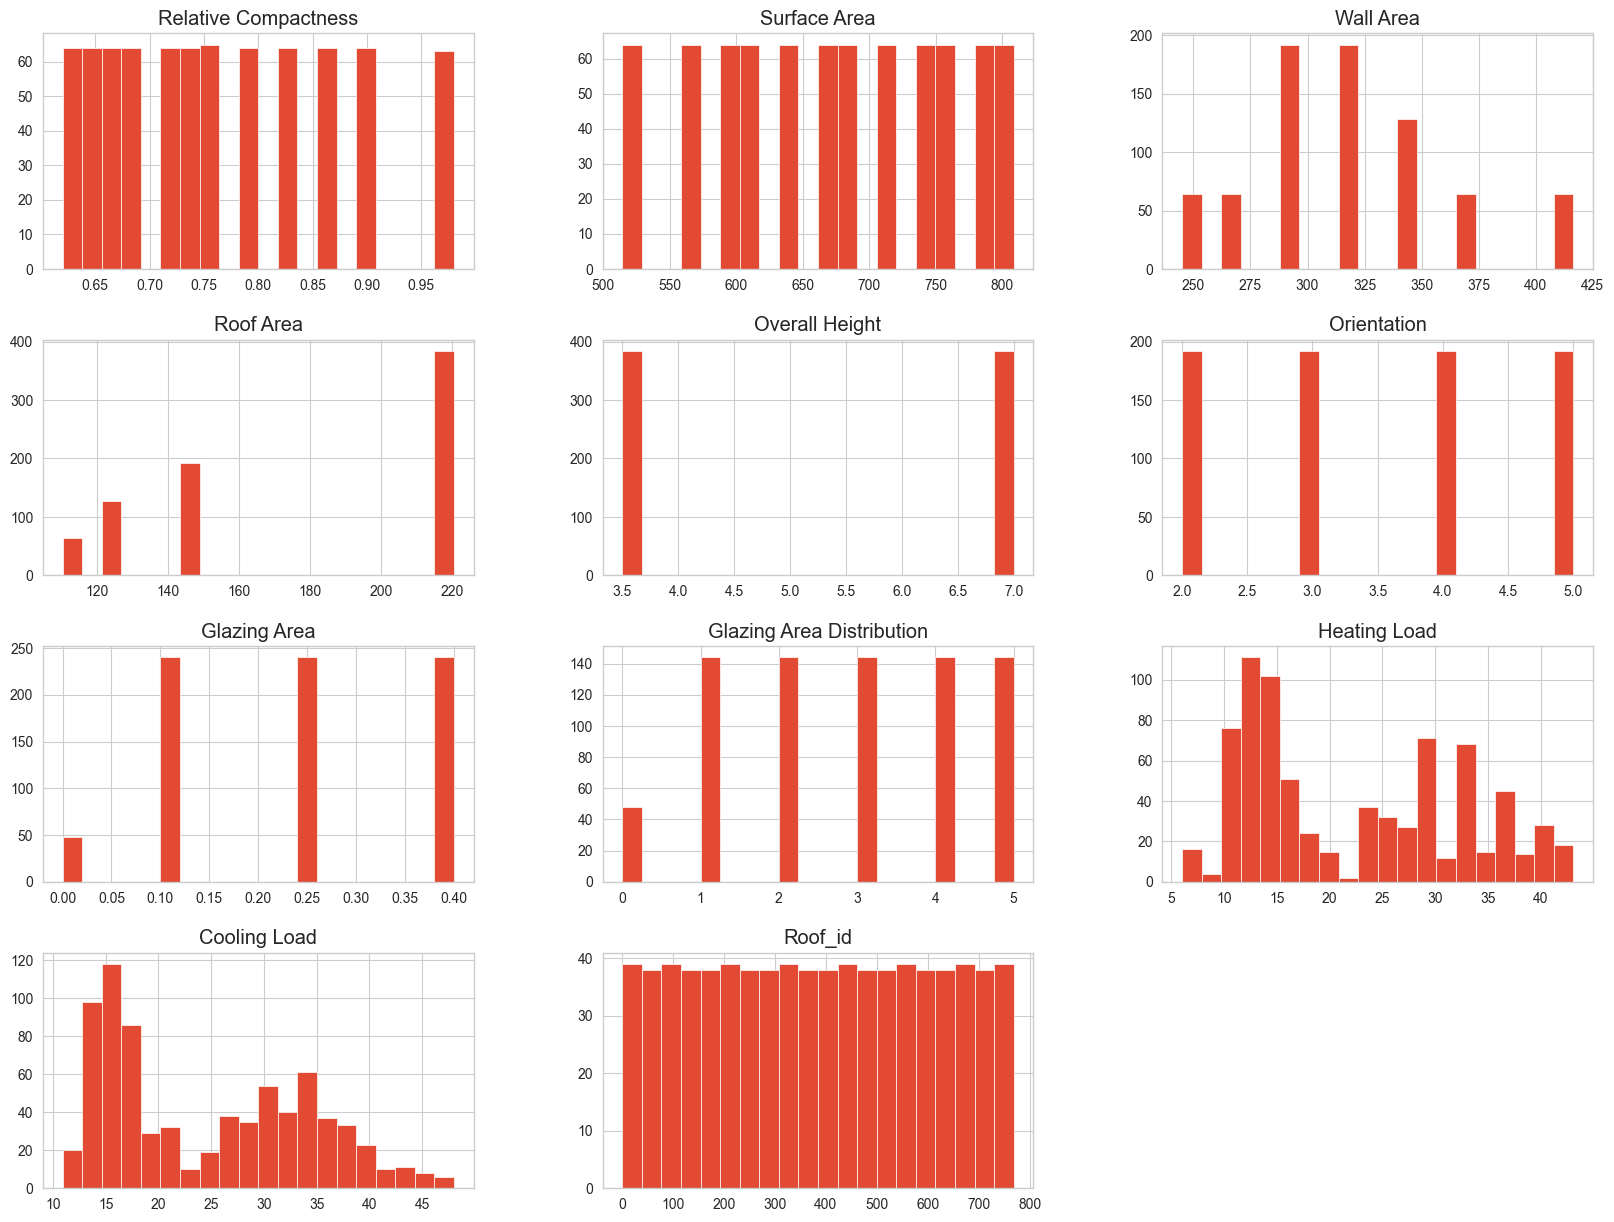

In [47]:
# Now, check the distribution of different variables.
data.hist(bins=20, figsize=(20,15))
plt.show()

In [48]:
import plotly.express as px
yprop = 'Surface Area'
xprop = 'Cooling Load'
h= None
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [10]:
import plotly.express as px
yprop = 'Overall Height'
xprop = 'Heating Load'
h= None
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

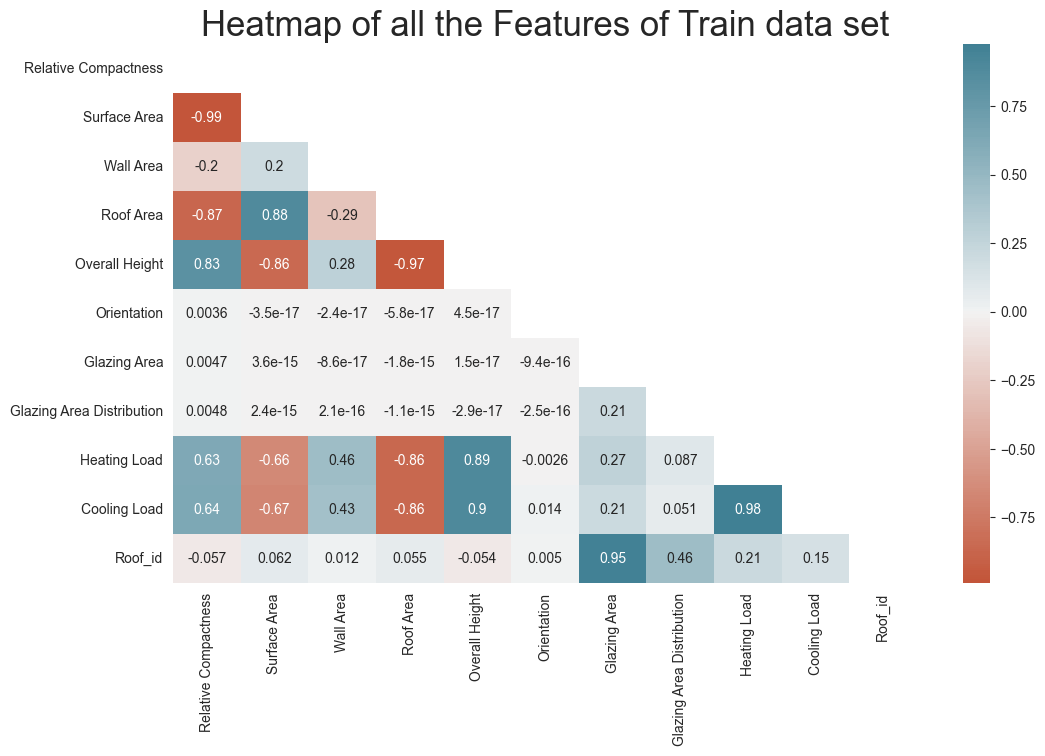

In [49]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [50]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame containing the fields
# 'Overall Height' and 'Roof Area'
# Replace 'data' with the name of your DataFrame if it's different

# Define a function to calculate roof slope
def calculate_slope(row):
    return np.arctan(row['Overall Height'] / row['Roof Area'])

# Apply the function to each row in the DataFrame
data['Roof Slope'] = data.apply(calculate_slope, axis=1)

# Convert slope from radians to degrees if necessary
data['Roof Slope (degrees)'] = np.degrees(data['Roof Slope'])

# Now 'Roof Slope' column in your DataFrame will contain the calculated slope values
# If you need the slope in degrees, it will be in the 'Roof Slope (degrees)' column

# If you want to categorize the houses based on the slope, you can add a new column
# For example, if you want to categorize as 'Low', 'Medium', and 'High' slope
# based on some thresholds, you can do it like this:

# Define thresholds for categorization
low_threshold = 1  # Example threshold for low slope
high_threshold = 3  # Example threshold for high slope

# Categorize the slope
data['Roof Slope Category'] = pd.cut(data['Roof Slope (degrees)'], bins=[0, low_threshold, high_threshold, np.inf],
                                     labels=['Low', 'Medium', 'High'])

# Now 'Roof Slope Category' column will contain the categories for each house based on the roof slope

# Optionally, you can save the modified DataFrame to a new CSV file
# data.to_csv('modified_data.csv', index=False)




# Spliting the data in X and Y

In [51]:
from scipy.stats import randint as sp_randint
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

In [52]:
X = data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
Y = data[['Heating Load', 'Cooling Load']]
Y1= data[['Heating Load']]
Y2= data[['Cooling Load']]

In [53]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.33, random_state = 20)

MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

# 3. Fitting - modeling

In [54]:
Acc = pd.DataFrame(index=None, columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [55]:
regressors = [['SVR',SVR()],
              
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()],
              ['CatBoostRegressor',CatBoostRegressor()]]

In [56]:
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc = Acc.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
    Acc.sort_values(by='test_Cooling')

Learning rate set to 0.036856
0:	learn: 9.7534966	total: 31.4ms	remaining: 31.4s
1:	learn: 9.4629286	total: 32.4ms	remaining: 16.2s
2:	learn: 9.1899340	total: 33.9ms	remaining: 11.3s
3:	learn: 8.8908867	total: 34.7ms	remaining: 8.65s
4:	learn: 8.6121214	total: 35.9ms	remaining: 7.14s
5:	learn: 8.3395049	total: 36.8ms	remaining: 6.1s
6:	learn: 8.0725825	total: 52.9ms	remaining: 7.5s
7:	learn: 7.8368246	total: 53.9ms	remaining: 6.68s
8:	learn: 7.5978712	total: 55.5ms	remaining: 6.11s
9:	learn: 7.3569999	total: 56.5ms	remaining: 5.59s
10:	learn: 7.1258774	total: 57.2ms	remaining: 5.14s
11:	learn: 6.9168464	total: 57.9ms	remaining: 4.77s
12:	learn: 6.7124725	total: 59ms	remaining: 4.48s
13:	learn: 6.5038688	total: 59.9ms	remaining: 4.22s
14:	learn: 6.3025179	total: 60.6ms	remaining: 3.98s
15:	learn: 6.1315515	total: 61.2ms	remaining: 3.77s
16:	learn: 5.9791482	total: 61.9ms	remaining: 3.58s
17:	learn: 5.8024499	total: 62.7ms	remaining: 3.42s
18:	learn: 5.6335253	total: 63.6ms	remaining: 3.

233:	learn: 0.4055010	total: 310ms	remaining: 1.01s
234:	learn: 0.4044458	total: 310ms	remaining: 1.01s
235:	learn: 0.4032642	total: 311ms	remaining: 1.01s
236:	learn: 0.4017680	total: 312ms	remaining: 1s
237:	learn: 0.4007393	total: 313ms	remaining: 1s
238:	learn: 0.3996204	total: 314ms	remaining: 1000ms
239:	learn: 0.3987337	total: 315ms	remaining: 996ms
240:	learn: 0.3981586	total: 315ms	remaining: 993ms
241:	learn: 0.3975677	total: 316ms	remaining: 989ms
242:	learn: 0.3963014	total: 316ms	remaining: 986ms
243:	learn: 0.3957588	total: 317ms	remaining: 983ms
244:	learn: 0.3945357	total: 318ms	remaining: 981ms
245:	learn: 0.3934699	total: 319ms	remaining: 978ms
246:	learn: 0.3923290	total: 320ms	remaining: 975ms
247:	learn: 0.3913809	total: 320ms	remaining: 972ms
248:	learn: 0.3901875	total: 321ms	remaining: 969ms
249:	learn: 0.3896372	total: 322ms	remaining: 965ms
250:	learn: 0.3882858	total: 323ms	remaining: 963ms
251:	learn: 0.3867018	total: 324ms	remaining: 961ms
252:	learn: 0.384

467:	learn: 0.2425875	total: 663ms	remaining: 754ms
468:	learn: 0.2421076	total: 665ms	remaining: 752ms
469:	learn: 0.2418112	total: 666ms	remaining: 751ms
470:	learn: 0.2415827	total: 667ms	remaining: 749ms
471:	learn: 0.2413738	total: 668ms	remaining: 747ms
472:	learn: 0.2408570	total: 669ms	remaining: 745ms
473:	learn: 0.2405858	total: 669ms	remaining: 743ms
474:	learn: 0.2403493	total: 670ms	remaining: 741ms
475:	learn: 0.2400393	total: 671ms	remaining: 738ms
476:	learn: 0.2396655	total: 671ms	remaining: 736ms
477:	learn: 0.2393912	total: 672ms	remaining: 734ms
478:	learn: 0.2389068	total: 673ms	remaining: 732ms
479:	learn: 0.2388163	total: 674ms	remaining: 730ms
480:	learn: 0.2385719	total: 675ms	remaining: 728ms
481:	learn: 0.2381217	total: 676ms	remaining: 726ms
482:	learn: 0.2378900	total: 676ms	remaining: 724ms
483:	learn: 0.2376528	total: 677ms	remaining: 722ms
484:	learn: 0.2373528	total: 678ms	remaining: 719ms
485:	learn: 0.2370487	total: 678ms	remaining: 718ms
486:	learn: 

744:	learn: 0.1707617	total: 994ms	remaining: 340ms
745:	learn: 0.1706377	total: 995ms	remaining: 339ms
746:	learn: 0.1705530	total: 997ms	remaining: 338ms
747:	learn: 0.1704340	total: 998ms	remaining: 336ms
748:	learn: 0.1703527	total: 999ms	remaining: 335ms
749:	learn: 0.1699781	total: 999ms	remaining: 333ms
750:	learn: 0.1697708	total: 1s	remaining: 332ms
751:	learn: 0.1695297	total: 1s	remaining: 330ms
752:	learn: 0.1693430	total: 1s	remaining: 329ms
753:	learn: 0.1691997	total: 1s	remaining: 327ms
754:	learn: 0.1690569	total: 1s	remaining: 326ms
755:	learn: 0.1688872	total: 1s	remaining: 324ms
756:	learn: 0.1687814	total: 1.01s	remaining: 323ms
757:	learn: 0.1685585	total: 1.01s	remaining: 321ms
758:	learn: 0.1684738	total: 1.01s	remaining: 320ms
759:	learn: 0.1682989	total: 1.01s	remaining: 319ms
760:	learn: 0.1681000	total: 1.01s	remaining: 317ms
761:	learn: 0.1679893	total: 1.01s	remaining: 316ms
762:	learn: 0.1678268	total: 1.01s	remaining: 314ms
763:	learn: 0.1676388	total: 1

946:	learn: 0.1415776	total: 1.33s	remaining: 74.7ms
947:	learn: 0.1414956	total: 1.33s	remaining: 73.3ms
948:	learn: 0.1412696	total: 1.34s	remaining: 71.8ms
949:	learn: 0.1411228	total: 1.34s	remaining: 70.4ms
950:	learn: 0.1410562	total: 1.34s	remaining: 68.9ms
951:	learn: 0.1409784	total: 1.34s	remaining: 67.5ms
952:	learn: 0.1408922	total: 1.34s	remaining: 66ms
953:	learn: 0.1407695	total: 1.34s	remaining: 64.6ms
954:	learn: 0.1406510	total: 1.34s	remaining: 63.2ms
955:	learn: 0.1405736	total: 1.34s	remaining: 61.8ms
956:	learn: 0.1405104	total: 1.34s	remaining: 60.3ms
957:	learn: 0.1402966	total: 1.34s	remaining: 58.9ms
958:	learn: 0.1402348	total: 1.34s	remaining: 57.5ms
959:	learn: 0.1401416	total: 1.34s	remaining: 56ms
960:	learn: 0.1400386	total: 1.35s	remaining: 54.6ms
961:	learn: 0.1398705	total: 1.35s	remaining: 53.2ms
962:	learn: 0.1397458	total: 1.35s	remaining: 51.8ms
963:	learn: 0.1396653	total: 1.35s	remaining: 50.4ms
964:	learn: 0.1396058	total: 1.35s	remaining: 49ms

117:	learn: 1.6403401	total: 148ms	remaining: 1.1s
118:	learn: 1.6364174	total: 148ms	remaining: 1.1s
119:	learn: 1.6310087	total: 149ms	remaining: 1.09s
120:	learn: 1.6293538	total: 150ms	remaining: 1.09s
121:	learn: 1.6231799	total: 150ms	remaining: 1.08s
122:	learn: 1.6171162	total: 151ms	remaining: 1.08s
123:	learn: 1.6088835	total: 152ms	remaining: 1.07s
124:	learn: 1.6022871	total: 153ms	remaining: 1.07s
125:	learn: 1.5977088	total: 154ms	remaining: 1.06s
126:	learn: 1.5927411	total: 154ms	remaining: 1.06s
127:	learn: 1.5793501	total: 155ms	remaining: 1.06s
128:	learn: 1.5672106	total: 156ms	remaining: 1.05s
129:	learn: 1.5539597	total: 157ms	remaining: 1.05s
130:	learn: 1.5491957	total: 158ms	remaining: 1.04s
131:	learn: 1.5466341	total: 158ms	remaining: 1.04s
132:	learn: 1.5367508	total: 159ms	remaining: 1.04s
133:	learn: 1.5337595	total: 160ms	remaining: 1.03s
134:	learn: 1.5293560	total: 160ms	remaining: 1.03s
135:	learn: 1.5159343	total: 161ms	remaining: 1.02s
136:	learn: 1.

322:	learn: 0.7778298	total: 333ms	remaining: 699ms
323:	learn: 0.7772603	total: 334ms	remaining: 698ms
324:	learn: 0.7767381	total: 336ms	remaining: 698ms
325:	learn: 0.7755892	total: 337ms	remaining: 697ms
326:	learn: 0.7751891	total: 338ms	remaining: 696ms
327:	learn: 0.7731109	total: 339ms	remaining: 695ms
328:	learn: 0.7695896	total: 340ms	remaining: 694ms
329:	learn: 0.7682375	total: 342ms	remaining: 693ms
330:	learn: 0.7676974	total: 343ms	remaining: 693ms
331:	learn: 0.7632018	total: 344ms	remaining: 692ms
332:	learn: 0.7577093	total: 345ms	remaining: 691ms
333:	learn: 0.7559468	total: 347ms	remaining: 692ms
334:	learn: 0.7555868	total: 348ms	remaining: 691ms
335:	learn: 0.7550385	total: 349ms	remaining: 690ms
336:	learn: 0.7533924	total: 350ms	remaining: 690ms
337:	learn: 0.7472663	total: 352ms	remaining: 690ms
338:	learn: 0.7457674	total: 354ms	remaining: 690ms
339:	learn: 0.7447580	total: 355ms	remaining: 689ms
340:	learn: 0.7435365	total: 356ms	remaining: 688ms
341:	learn: 

541:	learn: 0.4884412	total: 624ms	remaining: 527ms
542:	learn: 0.4881695	total: 625ms	remaining: 526ms
543:	learn: 0.4876015	total: 627ms	remaining: 525ms
544:	learn: 0.4870065	total: 628ms	remaining: 524ms
545:	learn: 0.4866112	total: 628ms	remaining: 522ms
546:	learn: 0.4860752	total: 629ms	remaining: 521ms
547:	learn: 0.4851397	total: 630ms	remaining: 519ms
548:	learn: 0.4839336	total: 631ms	remaining: 518ms
549:	learn: 0.4832774	total: 632ms	remaining: 517ms
550:	learn: 0.4821406	total: 633ms	remaining: 516ms
551:	learn: 0.4796511	total: 633ms	remaining: 514ms
552:	learn: 0.4795348	total: 634ms	remaining: 513ms
553:	learn: 0.4791759	total: 635ms	remaining: 511ms
554:	learn: 0.4780282	total: 637ms	remaining: 511ms
555:	learn: 0.4774206	total: 638ms	remaining: 510ms
556:	learn: 0.4768346	total: 640ms	remaining: 509ms
557:	learn: 0.4756575	total: 641ms	remaining: 508ms
558:	learn: 0.4750731	total: 643ms	remaining: 507ms
559:	learn: 0.4748847	total: 644ms	remaining: 506ms
560:	learn: 

857:	learn: 0.3356715	total: 928ms	remaining: 154ms
858:	learn: 0.3355297	total: 930ms	remaining: 153ms
859:	learn: 0.3354266	total: 931ms	remaining: 152ms
860:	learn: 0.3352615	total: 931ms	remaining: 150ms
861:	learn: 0.3349910	total: 932ms	remaining: 149ms
862:	learn: 0.3345354	total: 933ms	remaining: 148ms
863:	learn: 0.3341295	total: 934ms	remaining: 147ms
864:	learn: 0.3335394	total: 934ms	remaining: 146ms
865:	learn: 0.3333019	total: 935ms	remaining: 145ms
866:	learn: 0.3330686	total: 936ms	remaining: 144ms
867:	learn: 0.3328828	total: 937ms	remaining: 142ms
868:	learn: 0.3319657	total: 938ms	remaining: 141ms
869:	learn: 0.3317677	total: 938ms	remaining: 140ms
870:	learn: 0.3314954	total: 939ms	remaining: 139ms
871:	learn: 0.3306667	total: 940ms	remaining: 138ms
872:	learn: 0.3304506	total: 940ms	remaining: 137ms
873:	learn: 0.3303209	total: 941ms	remaining: 136ms
874:	learn: 0.3302257	total: 942ms	remaining: 135ms
875:	learn: 0.3299945	total: 943ms	remaining: 133ms
876:	learn: 

In [57]:
Acc = Acc.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
    # Acc.sort_values(by='test_Cooling')
print(Acc)

                       model  train_Heating  test_Heating  train_Cooling  \
0                        SVR       0.930662      0.910593       0.892578   
1      DecisionTreeRegressor       1.000000      0.997321       1.000000   
2      RandomForestRegressor       0.999457      0.997207       0.995290   
3  GradientBoostingRegressor       0.998173      0.997641       0.979423   
4          CatBoostRegressor       0.999817      0.998987       0.999041   
5          CatBoostRegressor       0.999817      0.998987       0.999041   

   test_Cooling  
0      0.887385  
1      0.948198  
2      0.965403  
3      0.976044  
4      0.995076  
5      0.995076  


# 4. Models parameters tuning

In [58]:
# Decision Tree Regressor
DTR = DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],"min_samples_split": [14, 15, 16, 17],
              "max_depth": [5, 6, 7],"min_samples_leaf": [4, 5, 6],"max_leaf_nodes": [29, 30, 31, 32],}

grid_cv_DTR = GridSearchCV(DTR, param_grid, cv=5)

grid_cv_DTR.fit(X_train,y2_train)
print("R-Squared::{}".format(grid_cv_DTR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DTR.best_params_))


R-Squared::0.9598494534836352
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 30, 'min_samples_leaf': 5, 'min_samples_split': 17}


In [59]:
DTR = DecisionTreeRegressor(criterion= 'mse', max_depth= 6, max_leaf_nodes= 30, min_samples_leaf= 5, min_samples_split= 17)

DTR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(DTR.score(X_test,y1_test)))

DTR.fit(X_train,y2_train)   
print("R-Squared on test dataset={}".format(DTR.score(X_test,y2_test)))

R-Squared on train dataset=0.9951682175001316
R-Squared on test dataset=0.959111514640551


In [60]:
# Random Forests 

from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [350, 400, 450], 'max_features': [1, 2], 'max_depth': [85, 90, 95]}]

RFR = RandomForestRegressor(n_jobs=-1)
grid_search_RFR = GridSearchCV(RFR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_RFR.fit(X_train, y2_train)

print("R-Squared::{}".format(grid_search_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_RFR.best_params_))

R-Squared::-2.701155521087924
Best Hyperparameters::
{'max_depth': 95, 'max_features': 1, 'n_estimators': 450}


In [61]:
RFR = RandomForestRegressor(n_estimators = 450, max_features = 1, max_depth= 90, bootstrap= True)

RFR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(RFR.score(X_test,y1_test)))

RFR.fit(X_train,y2_train)   
print("R-Squaredon test dataset={}".format(RFR.score(X_test,y2_test)))

R-Squared on train dataset=0.9920583906295077
R-Squaredon test dataset=0.9728497461655803


In [62]:
# Gradient Boosting Regressioin 

param_grid = [{"learning_rate": [0.01, 0.02, 0.1], "n_estimators":[150, 200, 250], "max_depth": [4, 5, 6], 
 "min_samples_split":[1, 2, 3], "min_samples_leaf":[2, 3], "subsample":[1.0, 2.0]}]

GBR = GradientBoostingRegressor()
grid_search_GBR = GridSearchCV(GBR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_GBR.fit(X_train, y2_train)

print("R-Squared::{}".format(grid_search_GBR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_GBR.best_params_))

R-Squared::-1.1170015831571667
Best Hyperparameters::
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200, 'subsample': 1.0}


In [63]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=3, min_samples_leaf=2, subsample=1.0)

GBR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(GBR.score(X_test,y1_test)))

GBR.fit(X_train,y2_train)   
print("R-Squaredon test dataset={}".format(GBR.score(X_test,y2_test)))

R-Squared on train dataset=0.9986701980473094
R-Squaredon test dataset=0.991490876529022


In [64]:
# CatBoostRegressor 

import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

model_CBR = CatBoostRegressor()
parameters = {'depth':[8, 10],'iterations':[10000],'learning_rate':[0.02,0.03],
              'border_count':[5],'random_state': [42, 45]}

grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y2_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 9.2916174	total: 272ms	remaining: 45m 17s
1:	learn: 9.0661900	total: 605ms	remaining: 50m 24s
2:	learn: 8.8536462	total: 606ms	remaining: 33m 38s
3:	learn: 8.6241816	total: 638ms	remaining: 26m 35s
4:	learn: 8.4056388	total: 639ms	remaining: 21m 17s
5:	learn: 8.2232780	total: 747ms	remaining: 20m 43s
6:	learn: 8.0221552	total: 748ms	remaining: 17m 47s
7:	learn: 7.8274666	total: 1.08s	remaining: 22m 25s
8:	learn: 7.6597754	total: 1.17s	remaining: 21m 37s
9:	learn: 7.4687723	total: 1.21s	remaining: 20m 6s
10:	learn: 7.2935778	total: 1.22s	remaining: 18m 27s
11:	learn: 7.1357258	total: 1.22s	remaining: 16m 56s
12:	learn: 6.9708549	total: 1.22s	remaining: 15m 38s
13:	learn: 6.8047918	total: 1.22s	remaining: 14m 32s
14:	learn: 6.6617232	total: 1.22s	remaining: 13m 34s
15:	learn: 6.5027478	total: 1.22s	remaining: 12m 43s
16:	learn: 6.3603157	total: 1.39s	remaining: 13m 36s
17:	learn: 6.2160268	total: 1.45s	remaining: 13m 23s
18:	learn: 6.0911053	total: 1.45s	remaining: 12m 41s
19:	

204:	learn: 1.0952137	total: 2.51s	remaining: 1m 59s
205:	learn: 1.0934399	total: 2.51s	remaining: 1m 59s
206:	learn: 1.0914482	total: 2.51s	remaining: 1m 58s
207:	learn: 1.0853712	total: 2.51s	remaining: 1m 58s
208:	learn: 1.0793025	total: 2.51s	remaining: 1m 57s
209:	learn: 1.0758192	total: 2.51s	remaining: 1m 57s
210:	learn: 1.0721379	total: 2.51s	remaining: 1m 56s
211:	learn: 1.0717021	total: 2.51s	remaining: 1m 56s
212:	learn: 1.0658403	total: 2.52s	remaining: 1m 55s
213:	learn: 1.0591789	total: 2.52s	remaining: 1m 55s
214:	learn: 1.0535203	total: 2.52s	remaining: 1m 54s
215:	learn: 1.0468847	total: 2.52s	remaining: 1m 54s
216:	learn: 1.0441247	total: 2.52s	remaining: 1m 53s
217:	learn: 1.0410504	total: 2.52s	remaining: 1m 53s
218:	learn: 1.0359800	total: 2.52s	remaining: 1m 52s
219:	learn: 1.0325549	total: 2.52s	remaining: 1m 52s
220:	learn: 1.0283780	total: 2.52s	remaining: 1m 51s
221:	learn: 1.0219098	total: 2.52s	remaining: 1m 51s
222:	learn: 1.0146159	total: 2.52s	remaining: 

374:	learn: 0.5873310	total: 3.19s	remaining: 1m 21s
375:	learn: 0.5865652	total: 3.19s	remaining: 1m 21s
376:	learn: 0.5846606	total: 3.19s	remaining: 1m 21s
377:	learn: 0.5842162	total: 3.19s	remaining: 1m 21s
378:	learn: 0.5835079	total: 3.19s	remaining: 1m 21s
379:	learn: 0.5830856	total: 3.19s	remaining: 1m 20s
380:	learn: 0.5807303	total: 3.19s	remaining: 1m 20s
381:	learn: 0.5781310	total: 3.19s	remaining: 1m 20s
382:	learn: 0.5763213	total: 3.19s	remaining: 1m 20s
383:	learn: 0.5753774	total: 3.2s	remaining: 1m 20s
384:	learn: 0.5735353	total: 3.2s	remaining: 1m 19s
385:	learn: 0.5701975	total: 3.2s	remaining: 1m 19s
386:	learn: 0.5691752	total: 3.2s	remaining: 1m 19s
387:	learn: 0.5679482	total: 3.2s	remaining: 1m 19s
388:	learn: 0.5668988	total: 3.2s	remaining: 1m 19s
389:	learn: 0.5655243	total: 3.2s	remaining: 1m 18s
390:	learn: 0.5636750	total: 3.2s	remaining: 1m 18s
391:	learn: 0.5619928	total: 3.2s	remaining: 1m 18s
392:	learn: 0.5602871	total: 3.2s	remaining: 1m 18s
393

578:	learn: 0.3693926	total: 4.05s	remaining: 1m 5s
579:	learn: 0.3684704	total: 4.05s	remaining: 1m 5s
580:	learn: 0.3678696	total: 4.05s	remaining: 1m 5s
581:	learn: 0.3670786	total: 4.05s	remaining: 1m 5s
582:	learn: 0.3662547	total: 4.06s	remaining: 1m 5s
583:	learn: 0.3657923	total: 4.06s	remaining: 1m 5s
584:	learn: 0.3649950	total: 4.06s	remaining: 1m 5s
585:	learn: 0.3640400	total: 4.06s	remaining: 1m 5s
586:	learn: 0.3634195	total: 4.06s	remaining: 1m 5s
587:	learn: 0.3628639	total: 4.06s	remaining: 1m 4s
588:	learn: 0.3623113	total: 4.06s	remaining: 1m 4s
589:	learn: 0.3612229	total: 4.06s	remaining: 1m 4s
590:	learn: 0.3599470	total: 4.06s	remaining: 1m 4s
591:	learn: 0.3587900	total: 4.07s	remaining: 1m 4s
592:	learn: 0.3585254	total: 4.07s	remaining: 1m 4s
593:	learn: 0.3580714	total: 4.07s	remaining: 1m 4s
594:	learn: 0.3567465	total: 4.07s	remaining: 1m 4s
595:	learn: 0.3562876	total: 4.07s	remaining: 1m 4s
596:	learn: 0.3559722	total: 4.07s	remaining: 1m 4s
597:	learn: 

770:	learn: 0.2652141	total: 4.88s	remaining: 58.4s
771:	learn: 0.2649158	total: 4.88s	remaining: 58.4s
772:	learn: 0.2643284	total: 4.88s	remaining: 58.3s
773:	learn: 0.2639724	total: 4.88s	remaining: 58.2s
774:	learn: 0.2635184	total: 4.89s	remaining: 58.2s
775:	learn: 0.2629829	total: 4.89s	remaining: 58.1s
776:	learn: 0.2623439	total: 4.89s	remaining: 58s
777:	learn: 0.2617022	total: 4.89s	remaining: 58s
778:	learn: 0.2612080	total: 4.89s	remaining: 57.9s
779:	learn: 0.2610572	total: 4.89s	remaining: 57.8s
780:	learn: 0.2606909	total: 4.89s	remaining: 57.7s
781:	learn: 0.2600880	total: 4.89s	remaining: 57.7s
782:	learn: 0.2596781	total: 4.89s	remaining: 57.6s
783:	learn: 0.2593606	total: 4.89s	remaining: 57.5s
784:	learn: 0.2590112	total: 4.89s	remaining: 57.5s
785:	learn: 0.2587592	total: 4.89s	remaining: 57.4s
786:	learn: 0.2585231	total: 4.9s	remaining: 57.3s
787:	learn: 0.2580242	total: 4.9s	remaining: 57.3s
788:	learn: 0.2576878	total: 4.9s	remaining: 57.2s
789:	learn: 0.25701

986:	learn: 0.1977536	total: 5.88s	remaining: 53.7s
987:	learn: 0.1976840	total: 5.88s	remaining: 53.6s
988:	learn: 0.1973073	total: 5.88s	remaining: 53.6s
989:	learn: 0.1970502	total: 5.88s	remaining: 53.5s
990:	learn: 0.1968362	total: 5.88s	remaining: 53.5s
991:	learn: 0.1966201	total: 5.88s	remaining: 53.4s
992:	learn: 0.1963760	total: 5.88s	remaining: 53.4s
993:	learn: 0.1960700	total: 5.88s	remaining: 53.3s
994:	learn: 0.1958345	total: 5.89s	remaining: 53.3s
995:	learn: 0.1956222	total: 5.89s	remaining: 53.2s
996:	learn: 0.1953568	total: 5.89s	remaining: 53.2s
997:	learn: 0.1951891	total: 5.89s	remaining: 53.1s
998:	learn: 0.1949679	total: 5.89s	remaining: 53.1s
999:	learn: 0.1948181	total: 5.89s	remaining: 53s
1000:	learn: 0.1944876	total: 5.89s	remaining: 53s
1001:	learn: 0.1943034	total: 5.89s	remaining: 52.9s
1002:	learn: 0.1938533	total: 5.89s	remaining: 52.9s
1003:	learn: 0.1936709	total: 5.89s	remaining: 52.8s
1004:	learn: 0.1933342	total: 5.9s	remaining: 52.8s
1005:	learn:

1179:	learn: 0.1592684	total: 6.5s	remaining: 48.6s
1180:	learn: 0.1591286	total: 6.5s	remaining: 48.6s
1181:	learn: 0.1587976	total: 6.5s	remaining: 48.5s
1182:	learn: 0.1587182	total: 6.5s	remaining: 48.5s
1183:	learn: 0.1586121	total: 6.5s	remaining: 48.4s
1184:	learn: 0.1583327	total: 6.51s	remaining: 48.4s
1185:	learn: 0.1580941	total: 6.51s	remaining: 48.4s
1186:	learn: 0.1578680	total: 6.51s	remaining: 48.3s
1187:	learn: 0.1576086	total: 6.51s	remaining: 48.3s
1188:	learn: 0.1575251	total: 6.51s	remaining: 48.2s
1189:	learn: 0.1573921	total: 6.51s	remaining: 48.2s
1190:	learn: 0.1572484	total: 6.51s	remaining: 48.2s
1191:	learn: 0.1570214	total: 6.51s	remaining: 48.1s
1192:	learn: 0.1569332	total: 6.51s	remaining: 48.1s
1193:	learn: 0.1567856	total: 6.51s	remaining: 48s
1194:	learn: 0.1566991	total: 6.51s	remaining: 48s
1195:	learn: 0.1564800	total: 6.52s	remaining: 48s
1196:	learn: 0.1563783	total: 6.52s	remaining: 47.9s
1197:	learn: 0.1562040	total: 6.52s	remaining: 47.9s
1198

1360:	learn: 0.1328463	total: 7.19s	remaining: 45.7s
1361:	learn: 0.1327824	total: 7.2s	remaining: 45.6s
1362:	learn: 0.1326583	total: 7.2s	remaining: 45.6s
1363:	learn: 0.1324639	total: 7.2s	remaining: 45.6s
1364:	learn: 0.1323296	total: 7.2s	remaining: 45.5s
1365:	learn: 0.1321981	total: 7.2s	remaining: 45.5s
1366:	learn: 0.1321087	total: 7.2s	remaining: 45.5s
1367:	learn: 0.1320227	total: 7.2s	remaining: 45.5s
1368:	learn: 0.1318097	total: 7.2s	remaining: 45.4s
1369:	learn: 0.1315757	total: 7.21s	remaining: 45.4s
1370:	learn: 0.1314627	total: 7.21s	remaining: 45.4s
1371:	learn: 0.1312936	total: 7.21s	remaining: 45.3s
1372:	learn: 0.1311588	total: 7.21s	remaining: 45.3s
1373:	learn: 0.1310805	total: 7.21s	remaining: 45.3s
1374:	learn: 0.1309682	total: 7.21s	remaining: 45.2s
1375:	learn: 0.1308516	total: 7.21s	remaining: 45.2s
1376:	learn: 0.1307033	total: 7.21s	remaining: 45.2s
1377:	learn: 0.1306529	total: 7.21s	remaining: 45.1s
1378:	learn: 0.1303410	total: 7.21s	remaining: 45.1s
1

1546:	learn: 0.1115430	total: 7.65s	remaining: 41.8s
1547:	learn: 0.1114151	total: 7.65s	remaining: 41.8s
1548:	learn: 0.1113430	total: 7.65s	remaining: 41.8s
1549:	learn: 0.1112345	total: 7.65s	remaining: 41.7s
1550:	learn: 0.1111547	total: 7.66s	remaining: 41.7s
1551:	learn: 0.1110818	total: 7.66s	remaining: 41.7s
1552:	learn: 0.1110257	total: 7.66s	remaining: 41.6s
1553:	learn: 0.1108907	total: 7.66s	remaining: 41.6s
1554:	learn: 0.1108072	total: 7.66s	remaining: 41.6s
1555:	learn: 0.1107219	total: 7.66s	remaining: 41.6s
1556:	learn: 0.1106299	total: 7.66s	remaining: 41.5s
1557:	learn: 0.1105363	total: 7.66s	remaining: 41.5s
1558:	learn: 0.1104987	total: 7.66s	remaining: 41.5s
1559:	learn: 0.1104109	total: 7.66s	remaining: 41.5s
1560:	learn: 0.1103041	total: 7.66s	remaining: 41.4s
1561:	learn: 0.1102971	total: 7.67s	remaining: 41.4s
1562:	learn: 0.1100736	total: 7.67s	remaining: 41.4s
1563:	learn: 0.1098873	total: 7.67s	remaining: 41.4s
1564:	learn: 0.1098120	total: 7.67s	remaining:

1766:	learn: 0.0923257	total: 7.99s	remaining: 37.2s
1767:	learn: 0.0922601	total: 7.99s	remaining: 37.2s
1768:	learn: 0.0921546	total: 7.99s	remaining: 37.2s
1769:	learn: 0.0920736	total: 7.99s	remaining: 37.2s
1770:	learn: 0.0920189	total: 7.99s	remaining: 37.1s
1771:	learn: 0.0919088	total: 7.99s	remaining: 37.1s
1772:	learn: 0.0918590	total: 7.99s	remaining: 37.1s
1773:	learn: 0.0918312	total: 7.99s	remaining: 37.1s
1774:	learn: 0.0917713	total: 8s	remaining: 37s
1775:	learn: 0.0917236	total: 8s	remaining: 37s
1776:	learn: 0.0915991	total: 8s	remaining: 37s
1777:	learn: 0.0915463	total: 8s	remaining: 37s
1778:	learn: 0.0914846	total: 8s	remaining: 37s
1779:	learn: 0.0913690	total: 8s	remaining: 36.9s
1780:	learn: 0.0913337	total: 8s	remaining: 36.9s
1781:	learn: 0.0912550	total: 8s	remaining: 36.9s
1782:	learn: 0.0912080	total: 8s	remaining: 36.9s
1783:	learn: 0.0911460	total: 8s	remaining: 36.9s
1784:	learn: 0.0910591	total: 8s	remaining: 36.8s
1785:	learn: 0.0908992	total: 8.01s	

2033:	learn: 0.0740458	total: 8.72s	remaining: 34.2s
2034:	learn: 0.0739470	total: 8.73s	remaining: 34.2s
2035:	learn: 0.0739084	total: 8.73s	remaining: 34.1s
2036:	learn: 0.0738789	total: 8.73s	remaining: 34.1s
2037:	learn: 0.0737941	total: 8.73s	remaining: 34.1s
2038:	learn: 0.0737433	total: 8.73s	remaining: 34.1s
2039:	learn: 0.0737063	total: 8.73s	remaining: 34.1s
2040:	learn: 0.0735685	total: 8.73s	remaining: 34.1s
2041:	learn: 0.0734870	total: 8.73s	remaining: 34s
2042:	learn: 0.0734329	total: 8.73s	remaining: 34s
2043:	learn: 0.0733916	total: 8.84s	remaining: 34.4s
2044:	learn: 0.0733301	total: 8.84s	remaining: 34.4s
2045:	learn: 0.0732660	total: 8.84s	remaining: 34.4s
2046:	learn: 0.0732279	total: 8.84s	remaining: 34.4s
2047:	learn: 0.0731354	total: 8.84s	remaining: 34.3s
2048:	learn: 0.0731074	total: 8.89s	remaining: 34.5s
2049:	learn: 0.0730338	total: 8.89s	remaining: 34.5s
2050:	learn: 0.0730088	total: 8.89s	remaining: 34.5s
2051:	learn: 0.0729103	total: 8.89s	remaining: 34.

2218:	learn: 0.0640562	total: 9.23s	remaining: 32.4s
2219:	learn: 0.0639942	total: 9.23s	remaining: 32.4s
2220:	learn: 0.0639541	total: 9.23s	remaining: 32.3s
2221:	learn: 0.0638588	total: 9.23s	remaining: 32.3s
2222:	learn: 0.0637885	total: 9.23s	remaining: 32.3s
2223:	learn: 0.0637215	total: 9.24s	remaining: 32.3s
2224:	learn: 0.0636781	total: 9.24s	remaining: 32.3s
2225:	learn: 0.0636394	total: 9.24s	remaining: 32.3s
2226:	learn: 0.0635722	total: 9.24s	remaining: 32.2s
2227:	learn: 0.0635232	total: 9.24s	remaining: 32.2s
2228:	learn: 0.0634876	total: 9.24s	remaining: 32.2s
2229:	learn: 0.0634557	total: 9.24s	remaining: 32.2s
2230:	learn: 0.0634109	total: 9.24s	remaining: 32.2s
2231:	learn: 0.0633692	total: 9.24s	remaining: 32.2s
2232:	learn: 0.0633200	total: 9.24s	remaining: 32.2s
2233:	learn: 0.0632720	total: 9.24s	remaining: 32.1s
2234:	learn: 0.0632418	total: 9.24s	remaining: 32.1s
2235:	learn: 0.0631869	total: 9.25s	remaining: 32.1s
2236:	learn: 0.0631436	total: 9.25s	remaining:

2400:	learn: 0.0562740	total: 9.57s	remaining: 30.3s
2401:	learn: 0.0562543	total: 9.57s	remaining: 30.3s
2402:	learn: 0.0562457	total: 9.57s	remaining: 30.3s
2403:	learn: 0.0561524	total: 9.57s	remaining: 30.2s
2404:	learn: 0.0561148	total: 9.57s	remaining: 30.2s
2405:	learn: 0.0560649	total: 9.57s	remaining: 30.2s
2406:	learn: 0.0559979	total: 9.57s	remaining: 30.2s
2407:	learn: 0.0559819	total: 9.57s	remaining: 30.2s
2408:	learn: 0.0559594	total: 9.58s	remaining: 30.2s
2409:	learn: 0.0559408	total: 9.58s	remaining: 30.2s
2410:	learn: 0.0558904	total: 9.59s	remaining: 30.2s
2411:	learn: 0.0558493	total: 9.59s	remaining: 30.2s
2412:	learn: 0.0558159	total: 9.59s	remaining: 30.2s
2413:	learn: 0.0557825	total: 9.6s	remaining: 30.2s
2414:	learn: 0.0557473	total: 9.6s	remaining: 30.1s
2415:	learn: 0.0557111	total: 9.6s	remaining: 30.1s
2416:	learn: 0.0556715	total: 9.6s	remaining: 30.1s
2417:	learn: 0.0556307	total: 9.6s	remaining: 30.1s
2418:	learn: 0.0555967	total: 9.6s	remaining: 30.1s

2619:	learn: 0.0484022	total: 9.94s	remaining: 28s
2620:	learn: 0.0483818	total: 9.94s	remaining: 28s
2621:	learn: 0.0483406	total: 9.94s	remaining: 28s
2622:	learn: 0.0483167	total: 9.94s	remaining: 28s
2623:	learn: 0.0482832	total: 9.94s	remaining: 28s
2624:	learn: 0.0482712	total: 9.95s	remaining: 27.9s
2625:	learn: 0.0482458	total: 9.95s	remaining: 27.9s
2626:	learn: 0.0482122	total: 9.95s	remaining: 27.9s
2627:	learn: 0.0481974	total: 9.95s	remaining: 27.9s
2628:	learn: 0.0481754	total: 9.95s	remaining: 27.9s
2629:	learn: 0.0481181	total: 9.95s	remaining: 27.9s
2630:	learn: 0.0480990	total: 9.95s	remaining: 27.9s
2631:	learn: 0.0479996	total: 9.95s	remaining: 27.9s
2632:	learn: 0.0479683	total: 9.95s	remaining: 27.9s
2633:	learn: 0.0479403	total: 9.95s	remaining: 27.8s
2634:	learn: 0.0478881	total: 9.96s	remaining: 27.8s
2635:	learn: 0.0478311	total: 9.96s	remaining: 27.8s
2636:	learn: 0.0478098	total: 9.96s	remaining: 27.8s
2637:	learn: 0.0477502	total: 9.96s	remaining: 27.8s
263

2853:	learn: 0.0411765	total: 10.3s	remaining: 25.7s
2854:	learn: 0.0411640	total: 10.3s	remaining: 25.7s
2855:	learn: 0.0411441	total: 10.3s	remaining: 25.7s
2856:	learn: 0.0410929	total: 10.3s	remaining: 25.6s
2857:	learn: 0.0410163	total: 10.3s	remaining: 25.6s
2858:	learn: 0.0409739	total: 10.3s	remaining: 25.6s
2859:	learn: 0.0409398	total: 10.3s	remaining: 25.6s
2860:	learn: 0.0409135	total: 10.3s	remaining: 25.6s
2861:	learn: 0.0408892	total: 10.3s	remaining: 25.6s
2862:	learn: 0.0408741	total: 10.3s	remaining: 25.6s
2863:	learn: 0.0408189	total: 10.3s	remaining: 25.6s
2864:	learn: 0.0407791	total: 10.3s	remaining: 25.6s
2865:	learn: 0.0407535	total: 10.3s	remaining: 25.6s
2866:	learn: 0.0407385	total: 10.3s	remaining: 25.5s
2867:	learn: 0.0407261	total: 10.3s	remaining: 25.5s
2868:	learn: 0.0406928	total: 10.3s	remaining: 25.5s
2869:	learn: 0.0406561	total: 10.3s	remaining: 25.5s
2870:	learn: 0.0406266	total: 10.3s	remaining: 25.5s
2871:	learn: 0.0405794	total: 10.3s	remaining:

3067:	learn: 0.0357370	total: 10.6s	remaining: 24s
3068:	learn: 0.0357242	total: 10.6s	remaining: 24s
3069:	learn: 0.0357086	total: 10.6s	remaining: 24s
3070:	learn: 0.0356817	total: 10.6s	remaining: 24s
3071:	learn: 0.0356387	total: 10.6s	remaining: 24s
3072:	learn: 0.0356288	total: 10.6s	remaining: 24s
3073:	learn: 0.0356080	total: 10.6s	remaining: 24s
3074:	learn: 0.0355983	total: 10.6s	remaining: 24s
3075:	learn: 0.0355761	total: 10.6s	remaining: 24s
3076:	learn: 0.0355660	total: 10.6s	remaining: 23.9s
3077:	learn: 0.0355525	total: 10.6s	remaining: 23.9s
3078:	learn: 0.0355392	total: 10.6s	remaining: 23.9s
3079:	learn: 0.0355083	total: 10.6s	remaining: 23.9s
3080:	learn: 0.0354895	total: 10.6s	remaining: 23.9s
3081:	learn: 0.0354714	total: 10.6s	remaining: 23.9s
3082:	learn: 0.0354486	total: 10.6s	remaining: 23.9s
3083:	learn: 0.0353878	total: 10.6s	remaining: 23.9s
3084:	learn: 0.0353778	total: 10.6s	remaining: 23.9s
3085:	learn: 0.0353602	total: 10.6s	remaining: 23.9s
3086:	learn

3311:	learn: 0.0308347	total: 11s	remaining: 22.3s
3312:	learn: 0.0308048	total: 11s	remaining: 22.3s
3313:	learn: 0.0307732	total: 11s	remaining: 22.3s
3314:	learn: 0.0307454	total: 11s	remaining: 22.3s
3315:	learn: 0.0307307	total: 11.1s	remaining: 22.3s
3316:	learn: 0.0307015	total: 11.1s	remaining: 22.3s
3317:	learn: 0.0306909	total: 11.1s	remaining: 22.3s
3318:	learn: 0.0306759	total: 11.1s	remaining: 22.2s
3319:	learn: 0.0306614	total: 11.1s	remaining: 22.2s
3320:	learn: 0.0306410	total: 11.1s	remaining: 22.2s
3321:	learn: 0.0306277	total: 11.1s	remaining: 22.2s
3322:	learn: 0.0306216	total: 11.1s	remaining: 22.2s
3323:	learn: 0.0306064	total: 11.1s	remaining: 22.2s
3324:	learn: 0.0305907	total: 11.1s	remaining: 22.2s
3325:	learn: 0.0305551	total: 11.1s	remaining: 22.2s
3326:	learn: 0.0305448	total: 11.1s	remaining: 22.2s
3327:	learn: 0.0305329	total: 11.1s	remaining: 22.2s
3328:	learn: 0.0305026	total: 11.1s	remaining: 22.2s
3329:	learn: 0.0304901	total: 11.1s	remaining: 22.2s
3

3547:	learn: 0.0268902	total: 11.5s	remaining: 20.8s
3548:	learn: 0.0268836	total: 11.5s	remaining: 20.8s
3549:	learn: 0.0268672	total: 11.5s	remaining: 20.8s
3550:	learn: 0.0268473	total: 11.5s	remaining: 20.9s
3551:	learn: 0.0268440	total: 11.5s	remaining: 20.9s
3552:	learn: 0.0268111	total: 11.5s	remaining: 20.9s
3553:	learn: 0.0268033	total: 11.5s	remaining: 20.8s
3554:	learn: 0.0267840	total: 11.5s	remaining: 20.8s
3555:	learn: 0.0267664	total: 11.5s	remaining: 20.8s
3556:	learn: 0.0267548	total: 11.5s	remaining: 20.8s
3557:	learn: 0.0267407	total: 11.5s	remaining: 20.8s
3558:	learn: 0.0267348	total: 11.5s	remaining: 20.8s
3559:	learn: 0.0267129	total: 11.5s	remaining: 20.8s
3560:	learn: 0.0266979	total: 11.5s	remaining: 20.8s
3561:	learn: 0.0266766	total: 11.5s	remaining: 20.8s
3562:	learn: 0.0266580	total: 11.5s	remaining: 20.8s
3563:	learn: 0.0266486	total: 11.5s	remaining: 20.8s
3564:	learn: 0.0266289	total: 11.5s	remaining: 20.8s
3565:	learn: 0.0266192	total: 11.5s	remaining:

3744:	learn: 0.0239926	total: 11.8s	remaining: 19.6s
3745:	learn: 0.0239856	total: 11.8s	remaining: 19.6s
3746:	learn: 0.0239735	total: 11.8s	remaining: 19.6s
3747:	learn: 0.0239685	total: 11.8s	remaining: 19.6s
3748:	learn: 0.0239466	total: 11.8s	remaining: 19.6s
3749:	learn: 0.0239339	total: 11.8s	remaining: 19.6s
3750:	learn: 0.0239070	total: 11.8s	remaining: 19.6s
3751:	learn: 0.0238953	total: 11.8s	remaining: 19.6s
3752:	learn: 0.0238899	total: 11.8s	remaining: 19.6s
3753:	learn: 0.0238777	total: 11.8s	remaining: 19.6s
3754:	learn: 0.0238381	total: 11.8s	remaining: 19.6s
3755:	learn: 0.0238321	total: 11.8s	remaining: 19.6s
3756:	learn: 0.0238120	total: 11.8s	remaining: 19.6s
3757:	learn: 0.0237928	total: 11.8s	remaining: 19.5s
3758:	learn: 0.0237744	total: 11.8s	remaining: 19.5s
3759:	learn: 0.0237694	total: 11.8s	remaining: 19.5s
3760:	learn: 0.0237526	total: 11.8s	remaining: 19.5s
3761:	learn: 0.0237283	total: 11.8s	remaining: 19.5s
3762:	learn: 0.0237178	total: 11.8s	remaining:

4008:	learn: 0.0206908	total: 12.1s	remaining: 18.1s
4009:	learn: 0.0206857	total: 12.1s	remaining: 18.1s
4010:	learn: 0.0206759	total: 12.1s	remaining: 18.1s
4011:	learn: 0.0206688	total: 12.1s	remaining: 18.1s
4012:	learn: 0.0206488	total: 12.1s	remaining: 18.1s
4013:	learn: 0.0206439	total: 12.1s	remaining: 18.1s
4014:	learn: 0.0206358	total: 12.1s	remaining: 18.1s
4015:	learn: 0.0206161	total: 12.1s	remaining: 18s
4016:	learn: 0.0206099	total: 12.1s	remaining: 18s
4017:	learn: 0.0206043	total: 12.1s	remaining: 18s
4018:	learn: 0.0205897	total: 12.1s	remaining: 18s
4019:	learn: 0.0205628	total: 12.1s	remaining: 18s
4020:	learn: 0.0205545	total: 12.1s	remaining: 18s
4021:	learn: 0.0205476	total: 12.1s	remaining: 18s
4022:	learn: 0.0205376	total: 12.1s	remaining: 18s
4023:	learn: 0.0205303	total: 12.1s	remaining: 18s
4024:	learn: 0.0205140	total: 12.1s	remaining: 18s
4025:	learn: 0.0205066	total: 12.1s	remaining: 18s
4026:	learn: 0.0204950	total: 12.1s	remaining: 18s
4027:	learn: 0.02

4270:	learn: 0.0180097	total: 12.5s	remaining: 16.7s
4271:	learn: 0.0180065	total: 12.5s	remaining: 16.7s
4272:	learn: 0.0180059	total: 12.5s	remaining: 16.7s
4273:	learn: 0.0179989	total: 12.5s	remaining: 16.7s
4274:	learn: 0.0179959	total: 12.5s	remaining: 16.7s
4275:	learn: 0.0179865	total: 12.5s	remaining: 16.7s
4276:	learn: 0.0179808	total: 12.5s	remaining: 16.7s
4277:	learn: 0.0179728	total: 12.5s	remaining: 16.7s
4278:	learn: 0.0179583	total: 12.5s	remaining: 16.7s
4279:	learn: 0.0179577	total: 12.5s	remaining: 16.7s
4280:	learn: 0.0179500	total: 12.5s	remaining: 16.7s
4281:	learn: 0.0179365	total: 12.5s	remaining: 16.7s
4282:	learn: 0.0179279	total: 12.5s	remaining: 16.7s
4283:	learn: 0.0179141	total: 12.5s	remaining: 16.7s
4284:	learn: 0.0179094	total: 12.5s	remaining: 16.7s
4285:	learn: 0.0179000	total: 12.5s	remaining: 16.7s
4286:	learn: 0.0178937	total: 12.5s	remaining: 16.7s
4287:	learn: 0.0178852	total: 12.5s	remaining: 16.7s
4288:	learn: 0.0178661	total: 12.5s	remaining:

4463:	learn: 0.0162909	total: 12.8s	remaining: 15.9s
4464:	learn: 0.0162696	total: 12.8s	remaining: 15.9s
4465:	learn: 0.0162542	total: 12.8s	remaining: 15.9s
4466:	learn: 0.0162479	total: 12.8s	remaining: 15.9s
4467:	learn: 0.0162407	total: 12.8s	remaining: 15.9s
4468:	learn: 0.0162368	total: 12.8s	remaining: 15.8s
4469:	learn: 0.0162232	total: 12.8s	remaining: 15.8s
4470:	learn: 0.0162192	total: 12.8s	remaining: 15.8s
4471:	learn: 0.0162081	total: 12.8s	remaining: 15.8s
4472:	learn: 0.0161995	total: 12.8s	remaining: 15.8s
4473:	learn: 0.0161957	total: 12.8s	remaining: 15.8s
4474:	learn: 0.0161870	total: 12.8s	remaining: 15.8s
4475:	learn: 0.0161848	total: 12.8s	remaining: 15.8s
4476:	learn: 0.0161807	total: 12.8s	remaining: 15.8s
4477:	learn: 0.0161707	total: 12.8s	remaining: 15.8s
4478:	learn: 0.0161548	total: 12.8s	remaining: 15.8s
4479:	learn: 0.0161467	total: 12.8s	remaining: 15.8s
4480:	learn: 0.0161409	total: 12.8s	remaining: 15.8s
4481:	learn: 0.0161362	total: 12.8s	remaining:

4775:	learn: 0.0138289	total: 13.3s	remaining: 14.5s
4776:	learn: 0.0138255	total: 13.3s	remaining: 14.5s
4777:	learn: 0.0138216	total: 13.3s	remaining: 14.5s
4778:	learn: 0.0138151	total: 13.3s	remaining: 14.6s
4779:	learn: 0.0138113	total: 13.3s	remaining: 14.6s
4780:	learn: 0.0138029	total: 13.3s	remaining: 14.6s
4781:	learn: 0.0137979	total: 13.3s	remaining: 14.6s
4782:	learn: 0.0137936	total: 13.3s	remaining: 14.5s
4783:	learn: 0.0137833	total: 13.3s	remaining: 14.5s
4784:	learn: 0.0137777	total: 13.3s	remaining: 14.5s
4785:	learn: 0.0137738	total: 13.3s	remaining: 14.5s
4786:	learn: 0.0137661	total: 13.3s	remaining: 14.5s
4787:	learn: 0.0137604	total: 13.3s	remaining: 14.5s
4788:	learn: 0.0137512	total: 13.3s	remaining: 14.5s
4789:	learn: 0.0137451	total: 13.3s	remaining: 14.5s
4790:	learn: 0.0137421	total: 13.3s	remaining: 14.5s
4791:	learn: 0.0137393	total: 13.4s	remaining: 14.6s
4792:	learn: 0.0137337	total: 13.4s	remaining: 14.6s
4793:	learn: 0.0137221	total: 13.4s	remaining:

4962:	learn: 0.0125520	total: 13.7s	remaining: 14s
4963:	learn: 0.0125467	total: 13.8s	remaining: 14s
4964:	learn: 0.0125419	total: 13.8s	remaining: 13.9s
4965:	learn: 0.0125323	total: 13.8s	remaining: 13.9s
4966:	learn: 0.0125257	total: 13.8s	remaining: 13.9s
4967:	learn: 0.0125202	total: 13.8s	remaining: 13.9s
4968:	learn: 0.0125155	total: 13.8s	remaining: 13.9s
4969:	learn: 0.0125103	total: 13.8s	remaining: 13.9s
4970:	learn: 0.0125043	total: 13.8s	remaining: 13.9s
4971:	learn: 0.0124907	total: 13.8s	remaining: 13.9s
4972:	learn: 0.0124858	total: 13.8s	remaining: 13.9s
4973:	learn: 0.0124797	total: 13.8s	remaining: 13.9s
4974:	learn: 0.0124753	total: 13.8s	remaining: 13.9s
4975:	learn: 0.0124686	total: 13.8s	remaining: 13.9s
4976:	learn: 0.0124603	total: 13.8s	remaining: 13.9s
4977:	learn: 0.0124553	total: 13.8s	remaining: 13.9s
4978:	learn: 0.0124451	total: 13.8s	remaining: 13.9s
4979:	learn: 0.0124358	total: 13.8s	remaining: 13.9s
4980:	learn: 0.0124288	total: 13.8s	remaining: 13.

5183:	learn: 0.0111459	total: 14.1s	remaining: 13.1s
5184:	learn: 0.0111433	total: 14.1s	remaining: 13.1s
5185:	learn: 0.0111366	total: 14.1s	remaining: 13.1s
5186:	learn: 0.0111320	total: 14.1s	remaining: 13.1s
5187:	learn: 0.0111265	total: 14.1s	remaining: 13.1s
5188:	learn: 0.0111186	total: 14.1s	remaining: 13.1s
5189:	learn: 0.0111127	total: 14.1s	remaining: 13.1s
5190:	learn: 0.0111068	total: 14.1s	remaining: 13.1s
5191:	learn: 0.0111025	total: 14.1s	remaining: 13.1s
5192:	learn: 0.0110980	total: 14.1s	remaining: 13.1s
5193:	learn: 0.0110943	total: 14.1s	remaining: 13.1s
5194:	learn: 0.0110879	total: 14.1s	remaining: 13.1s
5195:	learn: 0.0110824	total: 14.1s	remaining: 13.1s
5196:	learn: 0.0110771	total: 14.1s	remaining: 13.1s
5197:	learn: 0.0110727	total: 14.1s	remaining: 13.1s
5198:	learn: 0.0110677	total: 14.1s	remaining: 13.1s
5199:	learn: 0.0110628	total: 14.2s	remaining: 13.1s
5200:	learn: 0.0110576	total: 14.2s	remaining: 13.1s
5201:	learn: 0.0110521	total: 14.2s	remaining:

5385:	learn: 0.0100702	total: 14.5s	remaining: 12.4s
5386:	learn: 0.0100653	total: 14.5s	remaining: 12.4s
5387:	learn: 0.0100615	total: 14.5s	remaining: 12.4s
5388:	learn: 0.0100585	total: 14.5s	remaining: 12.4s
5389:	learn: 0.0100544	total: 14.5s	remaining: 12.4s
5390:	learn: 0.0100507	total: 14.5s	remaining: 12.4s
5391:	learn: 0.0100420	total: 14.5s	remaining: 12.4s
5392:	learn: 0.0100358	total: 14.5s	remaining: 12.4s
5393:	learn: 0.0100320	total: 14.5s	remaining: 12.4s
5394:	learn: 0.0100283	total: 14.5s	remaining: 12.4s
5395:	learn: 0.0100240	total: 14.5s	remaining: 12.4s
5396:	learn: 0.0100216	total: 14.5s	remaining: 12.4s
5397:	learn: 0.0100151	total: 14.5s	remaining: 12.4s
5398:	learn: 0.0100114	total: 14.5s	remaining: 12.4s
5399:	learn: 0.0100056	total: 14.5s	remaining: 12.4s
5400:	learn: 0.0100020	total: 14.5s	remaining: 12.4s
5401:	learn: 0.0099967	total: 14.5s	remaining: 12.4s
5402:	learn: 0.0099925	total: 14.5s	remaining: 12.4s
5403:	learn: 0.0099892	total: 14.5s	remaining:

5598:	learn: 0.0089992	total: 15.2s	remaining: 11.9s
5599:	learn: 0.0089852	total: 15.2s	remaining: 11.9s
5600:	learn: 0.0089815	total: 15.2s	remaining: 11.9s
5601:	learn: 0.0089776	total: 15.2s	remaining: 11.9s
5602:	learn: 0.0089716	total: 15.2s	remaining: 11.9s
5603:	learn: 0.0089692	total: 15.2s	remaining: 11.9s
5604:	learn: 0.0089645	total: 15.2s	remaining: 11.9s
5605:	learn: 0.0089589	total: 15.2s	remaining: 11.9s
5606:	learn: 0.0089453	total: 15.2s	remaining: 11.9s
5607:	learn: 0.0089409	total: 15.2s	remaining: 11.9s
5608:	learn: 0.0089390	total: 15.2s	remaining: 11.9s
5609:	learn: 0.0089341	total: 15.2s	remaining: 11.9s
5610:	learn: 0.0089319	total: 15.2s	remaining: 11.9s
5611:	learn: 0.0089297	total: 15.2s	remaining: 11.9s
5612:	learn: 0.0089265	total: 15.2s	remaining: 11.9s
5613:	learn: 0.0089230	total: 15.2s	remaining: 11.9s
5614:	learn: 0.0089161	total: 15.2s	remaining: 11.9s
5615:	learn: 0.0089112	total: 15.2s	remaining: 11.9s
5616:	learn: 0.0089078	total: 15.2s	remaining:

5804:	learn: 0.0081517	total: 15.4s	remaining: 11.2s
5805:	learn: 0.0081484	total: 15.4s	remaining: 11.2s
5806:	learn: 0.0081460	total: 15.4s	remaining: 11.1s
5807:	learn: 0.0081417	total: 15.4s	remaining: 11.1s
5808:	learn: 0.0081391	total: 15.4s	remaining: 11.1s
5809:	learn: 0.0081323	total: 15.4s	remaining: 11.1s
5810:	learn: 0.0081297	total: 15.4s	remaining: 11.1s
5811:	learn: 0.0081266	total: 15.4s	remaining: 11.1s
5812:	learn: 0.0081201	total: 15.4s	remaining: 11.1s
5813:	learn: 0.0081167	total: 15.4s	remaining: 11.1s
5814:	learn: 0.0081100	total: 15.4s	remaining: 11.1s
5815:	learn: 0.0081036	total: 15.4s	remaining: 11.1s
5816:	learn: 0.0080910	total: 15.4s	remaining: 11.1s
5817:	learn: 0.0080863	total: 15.4s	remaining: 11.1s
5818:	learn: 0.0080837	total: 15.4s	remaining: 11.1s
5819:	learn: 0.0080776	total: 15.4s	remaining: 11.1s
5820:	learn: 0.0080738	total: 15.4s	remaining: 11.1s
5821:	learn: 0.0080699	total: 15.4s	remaining: 11.1s
5822:	learn: 0.0080686	total: 15.4s	remaining:

6008:	learn: 0.0073998	total: 16s	remaining: 10.6s
6009:	learn: 0.0073949	total: 16s	remaining: 10.6s
6010:	learn: 0.0073928	total: 16s	remaining: 10.6s
6011:	learn: 0.0073832	total: 16s	remaining: 10.6s
6012:	learn: 0.0073784	total: 16s	remaining: 10.6s
6013:	learn: 0.0073745	total: 16s	remaining: 10.6s
6014:	learn: 0.0073720	total: 16s	remaining: 10.6s
6015:	learn: 0.0073683	total: 16s	remaining: 10.6s
6016:	learn: 0.0073664	total: 16s	remaining: 10.6s
6017:	learn: 0.0073622	total: 16s	remaining: 10.6s
6018:	learn: 0.0073559	total: 16s	remaining: 10.6s
6019:	learn: 0.0073530	total: 16.1s	remaining: 10.6s
6020:	learn: 0.0073508	total: 16.1s	remaining: 10.6s
6021:	learn: 0.0073461	total: 16.1s	remaining: 10.6s
6022:	learn: 0.0073421	total: 16.1s	remaining: 10.6s
6023:	learn: 0.0073390	total: 16.1s	remaining: 10.6s
6024:	learn: 0.0073320	total: 16.1s	remaining: 10.6s
6025:	learn: 0.0073283	total: 16.1s	remaining: 10.6s
6026:	learn: 0.0073245	total: 16.1s	remaining: 10.6s
6027:	learn: 0.

6178:	learn: 0.0067671	total: 16.4s	remaining: 10.2s
6179:	learn: 0.0067624	total: 16.5s	remaining: 10.2s
6180:	learn: 0.0067616	total: 16.5s	remaining: 10.2s
6181:	learn: 0.0067586	total: 16.5s	remaining: 10.2s
6182:	learn: 0.0067546	total: 16.5s	remaining: 10.2s
6183:	learn: 0.0067512	total: 16.5s	remaining: 10.2s
6184:	learn: 0.0067479	total: 16.5s	remaining: 10.2s
6185:	learn: 0.0067424	total: 16.5s	remaining: 10.2s
6186:	learn: 0.0067408	total: 16.5s	remaining: 10.1s
6187:	learn: 0.0067381	total: 16.5s	remaining: 10.1s
6188:	learn: 0.0067353	total: 16.5s	remaining: 10.1s
6189:	learn: 0.0067310	total: 16.5s	remaining: 10.1s
6190:	learn: 0.0067286	total: 16.5s	remaining: 10.1s
6191:	learn: 0.0067260	total: 16.5s	remaining: 10.1s
6192:	learn: 0.0067247	total: 16.5s	remaining: 10.1s
6193:	learn: 0.0067223	total: 16.5s	remaining: 10.1s
6194:	learn: 0.0067196	total: 16.5s	remaining: 10.1s
6195:	learn: 0.0067125	total: 16.5s	remaining: 10.1s
6196:	learn: 0.0067090	total: 16.5s	remaining:

6349:	learn: 0.0062330	total: 16.8s	remaining: 9.66s
6350:	learn: 0.0062293	total: 16.8s	remaining: 9.66s
6351:	learn: 0.0062259	total: 16.8s	remaining: 9.65s
6352:	learn: 0.0062231	total: 16.8s	remaining: 9.65s
6353:	learn: 0.0062202	total: 16.8s	remaining: 9.65s
6354:	learn: 0.0062169	total: 16.8s	remaining: 9.64s
6355:	learn: 0.0062128	total: 16.8s	remaining: 9.64s
6356:	learn: 0.0062106	total: 16.8s	remaining: 9.64s
6357:	learn: 0.0062105	total: 16.8s	remaining: 9.63s
6358:	learn: 0.0062077	total: 16.8s	remaining: 9.63s
6359:	learn: 0.0062043	total: 16.8s	remaining: 9.63s
6360:	learn: 0.0062015	total: 16.8s	remaining: 9.62s
6361:	learn: 0.0061992	total: 16.8s	remaining: 9.62s
6362:	learn: 0.0061934	total: 16.8s	remaining: 9.62s
6363:	learn: 0.0061911	total: 16.8s	remaining: 9.61s
6364:	learn: 0.0061902	total: 16.8s	remaining: 9.61s
6365:	learn: 0.0061848	total: 16.8s	remaining: 9.6s
6366:	learn: 0.0061822	total: 16.8s	remaining: 9.6s
6367:	learn: 0.0061796	total: 16.8s	remaining: 9

6607:	learn: 0.0054794	total: 17.1s	remaining: 8.8s
6608:	learn: 0.0054784	total: 17.1s	remaining: 8.8s
6609:	learn: 0.0054774	total: 17.1s	remaining: 8.79s
6610:	learn: 0.0054753	total: 17.1s	remaining: 8.79s
6611:	learn: 0.0054720	total: 17.1s	remaining: 8.79s
6612:	learn: 0.0054699	total: 17.1s	remaining: 8.78s
6613:	learn: 0.0054680	total: 17.1s	remaining: 8.78s
6614:	learn: 0.0054649	total: 17.1s	remaining: 8.78s
6615:	learn: 0.0054607	total: 17.1s	remaining: 8.77s
6616:	learn: 0.0054592	total: 17.1s	remaining: 8.77s
6617:	learn: 0.0054569	total: 17.1s	remaining: 8.77s
6618:	learn: 0.0054529	total: 17.1s	remaining: 8.76s
6619:	learn: 0.0054509	total: 17.1s	remaining: 8.76s
6620:	learn: 0.0054492	total: 17.1s	remaining: 8.76s
6621:	learn: 0.0054443	total: 17.1s	remaining: 8.75s
6622:	learn: 0.0054408	total: 17.2s	remaining: 8.75s
6623:	learn: 0.0054388	total: 17.2s	remaining: 8.74s
6624:	learn: 0.0054357	total: 17.2s	remaining: 8.74s
6625:	learn: 0.0054305	total: 17.2s	remaining: 8

6863:	learn: 0.0048195	total: 17.5s	remaining: 8.01s
6864:	learn: 0.0048179	total: 17.5s	remaining: 8.01s
6865:	learn: 0.0048153	total: 17.5s	remaining: 8s
6866:	learn: 0.0048127	total: 17.5s	remaining: 8s
6867:	learn: 0.0048106	total: 17.5s	remaining: 8s
6868:	learn: 0.0048084	total: 17.5s	remaining: 7.99s
6869:	learn: 0.0048070	total: 17.5s	remaining: 7.99s
6870:	learn: 0.0048042	total: 17.5s	remaining: 7.99s
6871:	learn: 0.0048005	total: 17.5s	remaining: 7.99s
6872:	learn: 0.0047990	total: 17.5s	remaining: 7.98s
6873:	learn: 0.0047970	total: 17.5s	remaining: 7.98s
6874:	learn: 0.0047952	total: 17.5s	remaining: 7.97s
6875:	learn: 0.0047923	total: 17.5s	remaining: 7.97s
6876:	learn: 0.0047908	total: 17.5s	remaining: 7.97s
6877:	learn: 0.0047899	total: 17.5s	remaining: 7.96s
6878:	learn: 0.0047879	total: 17.5s	remaining: 7.96s
6879:	learn: 0.0047859	total: 17.5s	remaining: 7.96s
6880:	learn: 0.0047848	total: 17.5s	remaining: 7.96s
6881:	learn: 0.0047830	total: 17.5s	remaining: 7.95s
68

7054:	learn: 0.0044042	total: 18.1s	remaining: 7.57s
7055:	learn: 0.0044030	total: 18.1s	remaining: 7.57s
7056:	learn: 0.0044008	total: 18.1s	remaining: 7.56s
7057:	learn: 0.0043997	total: 18.1s	remaining: 7.56s
7058:	learn: 0.0043974	total: 18.1s	remaining: 7.56s
7059:	learn: 0.0043951	total: 18.1s	remaining: 7.55s
7060:	learn: 0.0043928	total: 18.1s	remaining: 7.55s
7061:	learn: 0.0043909	total: 18.1s	remaining: 7.55s
7062:	learn: 0.0043896	total: 18.1s	remaining: 7.54s
7063:	learn: 0.0043876	total: 18.1s	remaining: 7.54s
7064:	learn: 0.0043858	total: 18.1s	remaining: 7.54s
7065:	learn: 0.0043839	total: 18.1s	remaining: 7.53s
7066:	learn: 0.0043821	total: 18.1s	remaining: 7.53s
7067:	learn: 0.0043799	total: 18.1s	remaining: 7.53s
7068:	learn: 0.0043784	total: 18.1s	remaining: 7.52s
7069:	learn: 0.0043763	total: 18.1s	remaining: 7.52s
7070:	learn: 0.0043745	total: 18.1s	remaining: 7.52s
7071:	learn: 0.0043728	total: 18.1s	remaining: 7.51s
7072:	learn: 0.0043710	total: 18.1s	remaining:

7211:	learn: 0.0040802	total: 18.3s	remaining: 7.09s
7212:	learn: 0.0040792	total: 18.3s	remaining: 7.08s
7213:	learn: 0.0040770	total: 18.3s	remaining: 7.08s
7214:	learn: 0.0040751	total: 18.3s	remaining: 7.08s
7215:	learn: 0.0040709	total: 18.3s	remaining: 7.08s
7216:	learn: 0.0040693	total: 18.3s	remaining: 7.07s
7217:	learn: 0.0040679	total: 18.3s	remaining: 7.07s
7218:	learn: 0.0040658	total: 18.3s	remaining: 7.07s
7219:	learn: 0.0040642	total: 18.3s	remaining: 7.06s
7220:	learn: 0.0040608	total: 18.3s	remaining: 7.06s
7221:	learn: 0.0040589	total: 18.3s	remaining: 7.06s
7222:	learn: 0.0040575	total: 18.3s	remaining: 7.05s
7223:	learn: 0.0040535	total: 18.3s	remaining: 7.05s
7224:	learn: 0.0040513	total: 18.3s	remaining: 7.05s
7225:	learn: 0.0040503	total: 18.3s	remaining: 7.04s
7226:	learn: 0.0040489	total: 18.3s	remaining: 7.04s
7227:	learn: 0.0040457	total: 18.3s	remaining: 7.04s
7228:	learn: 0.0040441	total: 18.3s	remaining: 7.04s
7229:	learn: 0.0040415	total: 18.3s	remaining:

7533:	learn: 0.0034867	total: 18.9s	remaining: 6.19s
7534:	learn: 0.0034851	total: 18.9s	remaining: 6.19s
7535:	learn: 0.0034834	total: 18.9s	remaining: 6.18s
7536:	learn: 0.0034819	total: 18.9s	remaining: 6.18s
7537:	learn: 0.0034791	total: 18.9s	remaining: 6.18s
7538:	learn: 0.0034782	total: 18.9s	remaining: 6.17s
7539:	learn: 0.0034771	total: 18.9s	remaining: 6.17s
7540:	learn: 0.0034761	total: 18.9s	remaining: 6.17s
7541:	learn: 0.0034757	total: 18.9s	remaining: 6.17s
7542:	learn: 0.0034742	total: 18.9s	remaining: 6.16s
7543:	learn: 0.0034704	total: 18.9s	remaining: 6.16s
7544:	learn: 0.0034695	total: 18.9s	remaining: 6.16s
7545:	learn: 0.0034682	total: 18.9s	remaining: 6.15s
7546:	learn: 0.0034663	total: 18.9s	remaining: 6.15s
7547:	learn: 0.0034652	total: 18.9s	remaining: 6.15s
7548:	learn: 0.0034635	total: 18.9s	remaining: 6.14s
7549:	learn: 0.0034597	total: 18.9s	remaining: 6.14s
7550:	learn: 0.0034571	total: 18.9s	remaining: 6.14s
7551:	learn: 0.0034535	total: 18.9s	remaining:

7737:	learn: 0.0031560	total: 19.1s	remaining: 5.6s
7738:	learn: 0.0031540	total: 19.2s	remaining: 5.6s
7739:	learn: 0.0031514	total: 19.2s	remaining: 5.6s
7740:	learn: 0.0031496	total: 19.2s	remaining: 5.59s
7741:	learn: 0.0031488	total: 19.2s	remaining: 5.59s
7742:	learn: 0.0031467	total: 19.2s	remaining: 5.59s
7743:	learn: 0.0031459	total: 19.2s	remaining: 5.59s
7744:	learn: 0.0031449	total: 19.2s	remaining: 5.58s
7745:	learn: 0.0031436	total: 19.2s	remaining: 5.58s
7746:	learn: 0.0031429	total: 19.2s	remaining: 5.58s
7747:	learn: 0.0031413	total: 19.2s	remaining: 5.58s
7748:	learn: 0.0031393	total: 19.2s	remaining: 5.58s
7749:	learn: 0.0031353	total: 19.2s	remaining: 5.58s
7750:	learn: 0.0031346	total: 19.2s	remaining: 5.57s
7751:	learn: 0.0031337	total: 19.2s	remaining: 5.57s
7752:	learn: 0.0031329	total: 19.2s	remaining: 5.57s
7753:	learn: 0.0031319	total: 19.2s	remaining: 5.56s
7754:	learn: 0.0031312	total: 19.2s	remaining: 5.56s
7755:	learn: 0.0031299	total: 19.2s	remaining: 5.

7982:	learn: 0.0027915	total: 19.5s	remaining: 4.94s
7983:	learn: 0.0027905	total: 19.5s	remaining: 4.94s
7984:	learn: 0.0027900	total: 19.5s	remaining: 4.94s
7985:	learn: 0.0027890	total: 19.6s	remaining: 4.93s
7986:	learn: 0.0027870	total: 19.6s	remaining: 4.93s
7987:	learn: 0.0027859	total: 19.6s	remaining: 4.93s
7988:	learn: 0.0027852	total: 19.6s	remaining: 4.93s
7989:	learn: 0.0027845	total: 19.6s	remaining: 4.92s
7990:	learn: 0.0027838	total: 19.6s	remaining: 4.92s
7991:	learn: 0.0027826	total: 19.6s	remaining: 4.92s
7992:	learn: 0.0027808	total: 19.6s	remaining: 4.92s
7993:	learn: 0.0027789	total: 19.6s	remaining: 4.91s
7994:	learn: 0.0027774	total: 19.6s	remaining: 4.91s
7995:	learn: 0.0027757	total: 19.6s	remaining: 4.91s
7996:	learn: 0.0027729	total: 19.6s	remaining: 4.9s
7997:	learn: 0.0027719	total: 19.6s	remaining: 4.9s
7998:	learn: 0.0027711	total: 19.6s	remaining: 4.9s
7999:	learn: 0.0027700	total: 19.6s	remaining: 4.9s
8000:	learn: 0.0027687	total: 19.6s	remaining: 4.9

8262:	learn: 0.0024289	total: 20.1s	remaining: 4.23s
8263:	learn: 0.0024284	total: 20.1s	remaining: 4.22s
8264:	learn: 0.0024278	total: 20.1s	remaining: 4.22s
8265:	learn: 0.0024269	total: 20.1s	remaining: 4.21s
8266:	learn: 0.0024264	total: 20.1s	remaining: 4.21s
8267:	learn: 0.0024254	total: 20.1s	remaining: 4.21s
8268:	learn: 0.0024243	total: 20.1s	remaining: 4.21s
8269:	learn: 0.0024230	total: 20.1s	remaining: 4.2s
8270:	learn: 0.0024214	total: 20.1s	remaining: 4.2s
8271:	learn: 0.0024196	total: 20.1s	remaining: 4.2s
8272:	learn: 0.0024181	total: 20.1s	remaining: 4.2s
8273:	learn: 0.0024166	total: 20.1s	remaining: 4.19s
8274:	learn: 0.0024153	total: 20.1s	remaining: 4.19s
8275:	learn: 0.0024142	total: 20.1s	remaining: 4.19s
8276:	learn: 0.0024136	total: 20.1s	remaining: 4.18s
8277:	learn: 0.0024125	total: 20.1s	remaining: 4.18s
8278:	learn: 0.0024118	total: 20.1s	remaining: 4.18s
8279:	learn: 0.0024106	total: 20.1s	remaining: 4.18s
8280:	learn: 0.0024090	total: 20.1s	remaining: 4.1

8427:	learn: 0.0022483	total: 20.2s	remaining: 3.78s
8428:	learn: 0.0022455	total: 20.2s	remaining: 3.77s
8429:	learn: 0.0022450	total: 20.2s	remaining: 3.77s
8430:	learn: 0.0022443	total: 20.2s	remaining: 3.77s
8431:	learn: 0.0022430	total: 20.2s	remaining: 3.77s
8432:	learn: 0.0022422	total: 20.2s	remaining: 3.76s
8433:	learn: 0.0022412	total: 20.2s	remaining: 3.76s
8434:	learn: 0.0022406	total: 20.2s	remaining: 3.76s
8435:	learn: 0.0022398	total: 20.2s	remaining: 3.75s
8436:	learn: 0.0022393	total: 20.2s	remaining: 3.75s
8437:	learn: 0.0022382	total: 20.2s	remaining: 3.75s
8438:	learn: 0.0022347	total: 20.2s	remaining: 3.75s
8439:	learn: 0.0022323	total: 20.2s	remaining: 3.74s
8440:	learn: 0.0022314	total: 20.2s	remaining: 3.74s
8441:	learn: 0.0022308	total: 20.2s	remaining: 3.74s
8442:	learn: 0.0022300	total: 20.2s	remaining: 3.74s
8443:	learn: 0.0022289	total: 20.2s	remaining: 3.73s
8444:	learn: 0.0022279	total: 20.2s	remaining: 3.73s
8445:	learn: 0.0022272	total: 20.2s	remaining:

8601:	learn: 0.0020661	total: 20.5s	remaining: 3.33s
8602:	learn: 0.0020657	total: 20.5s	remaining: 3.33s
8603:	learn: 0.0020649	total: 20.5s	remaining: 3.33s
8604:	learn: 0.0020632	total: 20.5s	remaining: 3.32s
8605:	learn: 0.0020622	total: 20.5s	remaining: 3.32s
8606:	learn: 0.0020616	total: 20.5s	remaining: 3.32s
8607:	learn: 0.0020604	total: 20.5s	remaining: 3.31s
8608:	learn: 0.0020599	total: 20.5s	remaining: 3.31s
8609:	learn: 0.0020587	total: 20.5s	remaining: 3.31s
8610:	learn: 0.0020575	total: 20.5s	remaining: 3.31s
8611:	learn: 0.0020567	total: 20.5s	remaining: 3.3s
8612:	learn: 0.0020551	total: 20.5s	remaining: 3.3s
8613:	learn: 0.0020546	total: 20.5s	remaining: 3.3s
8614:	learn: 0.0020533	total: 20.5s	remaining: 3.3s
8615:	learn: 0.0020523	total: 20.5s	remaining: 3.29s
8616:	learn: 0.0020518	total: 20.5s	remaining: 3.29s
8617:	learn: 0.0020512	total: 20.5s	remaining: 3.29s
8618:	learn: 0.0020500	total: 20.5s	remaining: 3.29s
8619:	learn: 0.0020489	total: 20.5s	remaining: 3.2

8799:	learn: 0.0018787	total: 20.9s	remaining: 2.86s
8800:	learn: 0.0018771	total: 20.9s	remaining: 2.85s
8801:	learn: 0.0018764	total: 20.9s	remaining: 2.85s
8802:	learn: 0.0018758	total: 20.9s	remaining: 2.85s
8803:	learn: 0.0018749	total: 20.9s	remaining: 2.85s
8804:	learn: 0.0018725	total: 20.9s	remaining: 2.84s
8805:	learn: 0.0018711	total: 20.9s	remaining: 2.84s
8806:	learn: 0.0018700	total: 20.9s	remaining: 2.84s
8807:	learn: 0.0018695	total: 20.9s	remaining: 2.84s
8808:	learn: 0.0018687	total: 20.9s	remaining: 2.83s
8809:	learn: 0.0018680	total: 20.9s	remaining: 2.83s
8810:	learn: 0.0018672	total: 20.9s	remaining: 2.83s
8811:	learn: 0.0018656	total: 20.9s	remaining: 2.83s
8812:	learn: 0.0018645	total: 20.9s	remaining: 2.82s
8813:	learn: 0.0018628	total: 20.9s	remaining: 2.82s
8814:	learn: 0.0018620	total: 20.9s	remaining: 2.82s
8815:	learn: 0.0018616	total: 20.9s	remaining: 2.81s
8816:	learn: 0.0018613	total: 20.9s	remaining: 2.81s
8817:	learn: 0.0018600	total: 20.9s	remaining:

8990:	learn: 0.0017105	total: 21.2s	remaining: 2.38s
8991:	learn: 0.0017091	total: 21.2s	remaining: 2.38s
8992:	learn: 0.0017083	total: 21.2s	remaining: 2.38s
8993:	learn: 0.0017078	total: 21.2s	remaining: 2.38s
8994:	learn: 0.0017068	total: 21.2s	remaining: 2.37s
8995:	learn: 0.0017060	total: 21.2s	remaining: 2.37s
8996:	learn: 0.0017054	total: 21.2s	remaining: 2.37s
8997:	learn: 0.0017047	total: 21.2s	remaining: 2.37s
8998:	learn: 0.0017033	total: 21.2s	remaining: 2.36s
8999:	learn: 0.0017019	total: 21.2s	remaining: 2.36s
9000:	learn: 0.0017012	total: 21.2s	remaining: 2.36s
9001:	learn: 0.0017003	total: 21.2s	remaining: 2.36s
9002:	learn: 0.0016982	total: 21.2s	remaining: 2.35s
9003:	learn: 0.0016977	total: 21.2s	remaining: 2.35s
9004:	learn: 0.0016971	total: 21.2s	remaining: 2.35s
9005:	learn: 0.0016964	total: 21.2s	remaining: 2.35s
9006:	learn: 0.0016959	total: 21.2s	remaining: 2.34s
9007:	learn: 0.0016954	total: 21.2s	remaining: 2.34s
9008:	learn: 0.0016945	total: 21.2s	remaining:

9214:	learn: 0.0015350	total: 21.5s	remaining: 1.83s
9215:	learn: 0.0015342	total: 21.5s	remaining: 1.83s
9216:	learn: 0.0015337	total: 21.5s	remaining: 1.83s
9217:	learn: 0.0015330	total: 21.5s	remaining: 1.82s
9218:	learn: 0.0015322	total: 21.5s	remaining: 1.82s
9219:	learn: 0.0015318	total: 21.5s	remaining: 1.82s
9220:	learn: 0.0015310	total: 21.5s	remaining: 1.82s
9221:	learn: 0.0015305	total: 21.5s	remaining: 1.82s
9222:	learn: 0.0015302	total: 21.5s	remaining: 1.81s
9223:	learn: 0.0015297	total: 21.5s	remaining: 1.81s
9224:	learn: 0.0015293	total: 21.5s	remaining: 1.81s
9225:	learn: 0.0015286	total: 21.5s	remaining: 1.81s
9226:	learn: 0.0015275	total: 21.5s	remaining: 1.8s
9227:	learn: 0.0015259	total: 21.5s	remaining: 1.8s
9228:	learn: 0.0015254	total: 21.7s	remaining: 1.81s
9229:	learn: 0.0015250	total: 21.7s	remaining: 1.81s
9230:	learn: 0.0015245	total: 21.7s	remaining: 1.81s
9231:	learn: 0.0015237	total: 21.7s	remaining: 1.8s
9232:	learn: 0.0015229	total: 21.7s	remaining: 1.

9388:	learn: 0.0014107	total: 22s	remaining: 1.44s
9389:	learn: 0.0014101	total: 22s	remaining: 1.43s
9390:	learn: 0.0014095	total: 22s	remaining: 1.43s
9391:	learn: 0.0014084	total: 22s	remaining: 1.43s
9392:	learn: 0.0014074	total: 22s	remaining: 1.43s
9393:	learn: 0.0014068	total: 22s	remaining: 1.42s
9394:	learn: 0.0014064	total: 22s	remaining: 1.42s
9395:	learn: 0.0014058	total: 22s	remaining: 1.42s
9396:	learn: 0.0014055	total: 22s	remaining: 1.42s
9397:	learn: 0.0014046	total: 22s	remaining: 1.41s
9398:	learn: 0.0014039	total: 22s	remaining: 1.41s
9399:	learn: 0.0014033	total: 22s	remaining: 1.41s
9400:	learn: 0.0014028	total: 22s	remaining: 1.41s
9401:	learn: 0.0014024	total: 22s	remaining: 1.4s
9402:	learn: 0.0014017	total: 22.1s	remaining: 1.4s
9403:	learn: 0.0014014	total: 22.1s	remaining: 1.4s
9404:	learn: 0.0014007	total: 22.1s	remaining: 1.4s
9405:	learn: 0.0014001	total: 22.1s	remaining: 1.39s
9406:	learn: 0.0013997	total: 22.1s	remaining: 1.39s
9407:	learn: 0.0013980	to

9616:	learn: 0.0012721	total: 22.4s	remaining: 895ms
9617:	learn: 0.0012717	total: 22.4s	remaining: 892ms
9618:	learn: 0.0012713	total: 22.4s	remaining: 890ms
9619:	learn: 0.0012703	total: 22.4s	remaining: 887ms
9620:	learn: 0.0012699	total: 22.4s	remaining: 885ms
9621:	learn: 0.0012696	total: 22.4s	remaining: 883ms
9622:	learn: 0.0012691	total: 22.4s	remaining: 880ms
9623:	learn: 0.0012681	total: 22.4s	remaining: 878ms
9624:	learn: 0.0012677	total: 22.4s	remaining: 875ms
9625:	learn: 0.0012670	total: 22.4s	remaining: 873ms
9626:	learn: 0.0012667	total: 22.4s	remaining: 871ms
9627:	learn: 0.0012663	total: 22.5s	remaining: 868ms
9628:	learn: 0.0012659	total: 22.5s	remaining: 866ms
9629:	learn: 0.0012651	total: 22.5s	remaining: 864ms
9630:	learn: 0.0012645	total: 22.5s	remaining: 861ms
9631:	learn: 0.0012640	total: 22.5s	remaining: 859ms
9632:	learn: 0.0012634	total: 22.5s	remaining: 856ms
9633:	learn: 0.0012623	total: 22.5s	remaining: 854ms
9634:	learn: 0.0012619	total: 22.5s	remaining:

9810:	learn: 0.0011640	total: 22.7s	remaining: 438ms
9811:	learn: 0.0011633	total: 22.7s	remaining: 435ms
9812:	learn: 0.0011629	total: 22.7s	remaining: 433ms
9813:	learn: 0.0011624	total: 22.7s	remaining: 431ms
9814:	learn: 0.0011620	total: 22.7s	remaining: 428ms
9815:	learn: 0.0011616	total: 22.7s	remaining: 426ms
9816:	learn: 0.0011613	total: 22.7s	remaining: 424ms
9817:	learn: 0.0011608	total: 22.7s	remaining: 421ms
9818:	learn: 0.0011605	total: 22.7s	remaining: 419ms
9819:	learn: 0.0011600	total: 22.7s	remaining: 417ms
9820:	learn: 0.0011597	total: 22.7s	remaining: 414ms
9821:	learn: 0.0011592	total: 22.7s	remaining: 412ms
9822:	learn: 0.0011589	total: 22.7s	remaining: 410ms
9823:	learn: 0.0011585	total: 22.7s	remaining: 407ms
9824:	learn: 0.0011577	total: 22.7s	remaining: 405ms
9825:	learn: 0.0011573	total: 22.7s	remaining: 403ms
9826:	learn: 0.0011569	total: 22.7s	remaining: 400ms
9827:	learn: 0.0011566	total: 22.7s	remaining: 398ms
9828:	learn: 0.0011560	total: 22.7s	remaining:

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9755933609153356

 The best parameters across ALL searched params:
 {'border_count': 5, 'depth': 8, 'iterations': 10000, 'learning_rate': 0.03, 'random_state': 42}


In [65]:
regressors1 = [['DecisionTreeRegressor',DecisionTreeRegressor(criterion= 'mse', max_depth= 6, max_leaf_nodes= 30, min_samples_leaf= 5, min_samples_split= 17)],
              ['RandomForestRegressor', RandomForestRegressor(n_estimators = 450, max_features = 1, max_depth= 90, bootstrap= True)],
              ['GradientBoostingRegressor',GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=2, min_samples_leaf=3, subsample=1.0)],
              ['CatBoostRegressor', CatBoostRegressor(depth=8, iterations=10000, learning_rate=0.02, border_count=5, random_state=42)]]


In [32]:
for mod in regressors1:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc1 = Acc1.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
    Acc1.sort_values(by='test_Cooling')

0:	learn: 9.8695974	total: 45.3ms	remaining: 7m 32s
1:	learn: 9.7093886	total: 46.7ms	remaining: 3m 53s
2:	learn: 9.5559290	total: 47.5ms	remaining: 2m 38s
3:	learn: 9.3925926	total: 48.4ms	remaining: 2m
4:	learn: 9.2369666	total: 49.2ms	remaining: 1m 38s
5:	learn: 9.0948424	total: 50.2ms	remaining: 1m 23s
6:	learn: 8.9547135	total: 51.7ms	remaining: 1m 13s
7:	learn: 8.7985134	total: 53ms	remaining: 1m 6s
8:	learn: 8.6844584	total: 54ms	remaining: 59.9s
9:	learn: 8.5461314	total: 54.6ms	remaining: 54.5s
10:	learn: 8.4030712	total: 55.3ms	remaining: 50.3s
11:	learn: 8.2613754	total: 55.9ms	remaining: 46.5s
12:	learn: 8.1228195	total: 56.5ms	remaining: 43.4s
13:	learn: 7.9955433	total: 57.4ms	remaining: 40.9s
14:	learn: 7.8707143	total: 58ms	remaining: 38.6s
15:	learn: 7.7441878	total: 58.6ms	remaining: 36.5s
16:	learn: 7.6221920	total: 59.1ms	remaining: 34.7s
17:	learn: 7.4897963	total: 59.7ms	remaining: 33.1s
18:	learn: 7.3691971	total: 60.3ms	remaining: 31.7s
19:	learn: 7.2642696	tota

301:	learn: 0.4807189	total: 410ms	remaining: 13.2s
302:	learn: 0.4801188	total: 431ms	remaining: 13.8s
303:	learn: 0.4784295	total: 432ms	remaining: 13.8s
304:	learn: 0.4771746	total: 433ms	remaining: 13.7s
305:	learn: 0.4755809	total: 433ms	remaining: 13.7s
306:	learn: 0.4746931	total: 434ms	remaining: 13.7s
307:	learn: 0.4735268	total: 435ms	remaining: 13.7s
308:	learn: 0.4721455	total: 436ms	remaining: 13.7s
309:	learn: 0.4705442	total: 438ms	remaining: 13.7s
310:	learn: 0.4690044	total: 439ms	remaining: 13.7s
311:	learn: 0.4673591	total: 439ms	remaining: 13.6s
312:	learn: 0.4658363	total: 440ms	remaining: 13.6s
313:	learn: 0.4646772	total: 441ms	remaining: 13.6s
314:	learn: 0.4632370	total: 443ms	remaining: 13.6s
315:	learn: 0.4619617	total: 444ms	remaining: 13.6s
316:	learn: 0.4607650	total: 445ms	remaining: 13.6s
317:	learn: 0.4593230	total: 445ms	remaining: 13.6s
318:	learn: 0.4580024	total: 446ms	remaining: 13.5s
319:	learn: 0.4571050	total: 447ms	remaining: 13.5s
320:	learn: 

550:	learn: 0.2880680	total: 692ms	remaining: 11.9s
551:	learn: 0.2870998	total: 693ms	remaining: 11.9s
552:	learn: 0.2867843	total: 694ms	remaining: 11.9s
553:	learn: 0.2864713	total: 695ms	remaining: 11.9s
554:	learn: 0.2859868	total: 696ms	remaining: 11.8s
555:	learn: 0.2853804	total: 697ms	remaining: 11.8s
556:	learn: 0.2849594	total: 699ms	remaining: 11.8s
557:	learn: 0.2847266	total: 700ms	remaining: 11.8s
558:	learn: 0.2839970	total: 701ms	remaining: 11.8s
559:	learn: 0.2834813	total: 701ms	remaining: 11.8s
560:	learn: 0.2826761	total: 702ms	remaining: 11.8s
561:	learn: 0.2821740	total: 704ms	remaining: 11.8s
562:	learn: 0.2816106	total: 705ms	remaining: 11.8s
563:	learn: 0.2812835	total: 707ms	remaining: 11.8s
564:	learn: 0.2810277	total: 710ms	remaining: 11.9s
565:	learn: 0.2806519	total: 712ms	remaining: 11.9s
566:	learn: 0.2802130	total: 717ms	remaining: 11.9s
567:	learn: 0.2793109	total: 718ms	remaining: 11.9s
568:	learn: 0.2788401	total: 721ms	remaining: 12s
569:	learn: 0.

828:	learn: 0.1941919	total: 1s	remaining: 11.1s
829:	learn: 0.1939468	total: 1s	remaining: 11.1s
830:	learn: 0.1938078	total: 1s	remaining: 11.1s
831:	learn: 0.1935757	total: 1.01s	remaining: 11.1s
832:	learn: 0.1932281	total: 1.01s	remaining: 11.1s
833:	learn: 0.1930353	total: 1.01s	remaining: 11.1s
834:	learn: 0.1928992	total: 1.01s	remaining: 11.1s
835:	learn: 0.1926629	total: 1.01s	remaining: 11.1s
836:	learn: 0.1924552	total: 1.01s	remaining: 11.1s
837:	learn: 0.1922246	total: 1.01s	remaining: 11.1s
838:	learn: 0.1920923	total: 1.01s	remaining: 11.1s
839:	learn: 0.1919292	total: 1.01s	remaining: 11.1s
840:	learn: 0.1916823	total: 1.02s	remaining: 11.1s
841:	learn: 0.1914441	total: 1.02s	remaining: 11.1s
842:	learn: 0.1912101	total: 1.02s	remaining: 11.1s
843:	learn: 0.1909037	total: 1.02s	remaining: 11.1s
844:	learn: 0.1907735	total: 1.02s	remaining: 11.1s
845:	learn: 0.1906191	total: 1.02s	remaining: 11.1s
846:	learn: 0.1902681	total: 1.02s	remaining: 11.1s
847:	learn: 0.1901080

1124:	learn: 0.1411130	total: 1.33s	remaining: 10.5s
1125:	learn: 0.1409519	total: 1.33s	remaining: 10.5s
1126:	learn: 0.1408234	total: 1.33s	remaining: 10.5s
1127:	learn: 0.1406965	total: 1.34s	remaining: 10.5s
1128:	learn: 0.1405869	total: 1.34s	remaining: 10.5s
1129:	learn: 0.1404000	total: 1.34s	remaining: 10.5s
1130:	learn: 0.1402843	total: 1.34s	remaining: 10.5s
1131:	learn: 0.1400910	total: 1.34s	remaining: 10.5s
1132:	learn: 0.1399839	total: 1.34s	remaining: 10.5s
1133:	learn: 0.1398848	total: 1.34s	remaining: 10.5s
1134:	learn: 0.1397771	total: 1.34s	remaining: 10.5s
1135:	learn: 0.1396751	total: 1.35s	remaining: 10.5s
1136:	learn: 0.1395499	total: 1.35s	remaining: 10.5s
1137:	learn: 0.1394327	total: 1.35s	remaining: 10.5s
1138:	learn: 0.1393483	total: 1.35s	remaining: 10.5s
1139:	learn: 0.1391828	total: 1.35s	remaining: 10.5s
1140:	learn: 0.1390690	total: 1.35s	remaining: 10.5s
1141:	learn: 0.1389680	total: 1.35s	remaining: 10.5s
1142:	learn: 0.1387838	total: 1.35s	remaining:

1310:	learn: 0.1190428	total: 1.66s	remaining: 11s
1311:	learn: 0.1188826	total: 1.66s	remaining: 11s
1312:	learn: 0.1187866	total: 1.66s	remaining: 11s
1313:	learn: 0.1186676	total: 1.66s	remaining: 11s
1314:	learn: 0.1185750	total: 1.67s	remaining: 11s
1315:	learn: 0.1184475	total: 1.67s	remaining: 11s
1316:	learn: 0.1183735	total: 1.67s	remaining: 11s
1317:	learn: 0.1182616	total: 1.67s	remaining: 11s
1318:	learn: 0.1181755	total: 1.67s	remaining: 11s
1319:	learn: 0.1180817	total: 1.67s	remaining: 11s
1320:	learn: 0.1179649	total: 1.68s	remaining: 11s
1321:	learn: 0.1178655	total: 1.68s	remaining: 11s
1322:	learn: 0.1177092	total: 1.68s	remaining: 11s
1323:	learn: 0.1176309	total: 1.68s	remaining: 11s
1324:	learn: 0.1175453	total: 1.68s	remaining: 11s
1325:	learn: 0.1174596	total: 1.69s	remaining: 11s
1326:	learn: 0.1173931	total: 1.69s	remaining: 11s
1327:	learn: 0.1173108	total: 1.69s	remaining: 11s
1328:	learn: 0.1171835	total: 1.69s	remaining: 11s
1329:	learn: 0.1170566	total: 1

1485:	learn: 0.1017222	total: 1.97s	remaining: 11.3s
1486:	learn: 0.1016451	total: 1.97s	remaining: 11.3s
1487:	learn: 0.1015332	total: 1.97s	remaining: 11.3s
1488:	learn: 0.1014720	total: 1.97s	remaining: 11.3s
1489:	learn: 0.1013993	total: 1.97s	remaining: 11.3s
1490:	learn: 0.1013365	total: 1.97s	remaining: 11.3s
1491:	learn: 0.1012381	total: 1.98s	remaining: 11.3s
1492:	learn: 0.1011744	total: 1.98s	remaining: 11.3s
1493:	learn: 0.1010102	total: 1.98s	remaining: 11.3s
1494:	learn: 0.1009565	total: 1.98s	remaining: 11.3s
1495:	learn: 0.1008920	total: 1.98s	remaining: 11.3s
1496:	learn: 0.1008128	total: 1.98s	remaining: 11.3s
1497:	learn: 0.1006997	total: 1.98s	remaining: 11.3s
1498:	learn: 0.1006303	total: 1.98s	remaining: 11.3s
1499:	learn: 0.1005621	total: 1.99s	remaining: 11.3s
1500:	learn: 0.1004725	total: 1.99s	remaining: 11.2s
1501:	learn: 0.1004136	total: 1.99s	remaining: 11.2s
1502:	learn: 0.1003235	total: 1.99s	remaining: 11.2s
1503:	learn: 0.1002635	total: 1.99s	remaining:

1768:	learn: 0.0817682	total: 2.32s	remaining: 10.8s
1769:	learn: 0.0817205	total: 2.32s	remaining: 10.8s
1770:	learn: 0.0816602	total: 2.32s	remaining: 10.8s
1771:	learn: 0.0816062	total: 2.32s	remaining: 10.8s
1772:	learn: 0.0815591	total: 2.32s	remaining: 10.8s
1773:	learn: 0.0815027	total: 2.32s	remaining: 10.8s
1774:	learn: 0.0813850	total: 2.32s	remaining: 10.8s
1775:	learn: 0.0813357	total: 2.32s	remaining: 10.8s
1776:	learn: 0.0812805	total: 2.33s	remaining: 10.8s
1777:	learn: 0.0812274	total: 2.33s	remaining: 10.8s
1778:	learn: 0.0811815	total: 2.33s	remaining: 10.8s
1779:	learn: 0.0811383	total: 2.33s	remaining: 10.8s
1780:	learn: 0.0811083	total: 2.33s	remaining: 10.8s
1781:	learn: 0.0810616	total: 2.33s	remaining: 10.7s
1782:	learn: 0.0810167	total: 2.33s	remaining: 10.7s
1783:	learn: 0.0809671	total: 2.33s	remaining: 10.7s
1784:	learn: 0.0809303	total: 2.33s	remaining: 10.7s
1785:	learn: 0.0808473	total: 2.33s	remaining: 10.7s
1786:	learn: 0.0808166	total: 2.34s	remaining:

2075:	learn: 0.0660191	total: 2.63s	remaining: 10.1s
2076:	learn: 0.0660026	total: 2.64s	remaining: 10.1s
2077:	learn: 0.0659344	total: 2.64s	remaining: 10.1s
2078:	learn: 0.0658627	total: 2.64s	remaining: 10.1s
2079:	learn: 0.0658438	total: 2.64s	remaining: 10s
2080:	learn: 0.0658073	total: 2.64s	remaining: 10s
2081:	learn: 0.0657592	total: 2.64s	remaining: 10s
2082:	learn: 0.0657397	total: 2.64s	remaining: 10s
2083:	learn: 0.0656703	total: 2.64s	remaining: 10s
2084:	learn: 0.0656324	total: 2.64s	remaining: 10s
2085:	learn: 0.0656060	total: 2.64s	remaining: 10s
2086:	learn: 0.0655752	total: 2.65s	remaining: 10s
2087:	learn: 0.0655452	total: 2.65s	remaining: 10s
2088:	learn: 0.0655209	total: 2.65s	remaining: 10s
2089:	learn: 0.0654840	total: 2.65s	remaining: 10s
2090:	learn: 0.0654634	total: 2.65s	remaining: 10s
2091:	learn: 0.0654475	total: 2.65s	remaining: 10s
2092:	learn: 0.0654257	total: 2.65s	remaining: 10s
2093:	learn: 0.0653951	total: 2.65s	remaining: 10s
2094:	learn: 0.0653746	

2247:	learn: 0.0592270	total: 2.79s	remaining: 9.63s
2248:	learn: 0.0591922	total: 2.79s	remaining: 9.63s
2249:	learn: 0.0591674	total: 2.8s	remaining: 9.63s
2250:	learn: 0.0591153	total: 2.8s	remaining: 9.63s
2251:	learn: 0.0590966	total: 2.8s	remaining: 9.63s
2252:	learn: 0.0590713	total: 2.8s	remaining: 9.62s
2253:	learn: 0.0590246	total: 2.8s	remaining: 9.62s
2254:	learn: 0.0589974	total: 2.8s	remaining: 9.62s
2255:	learn: 0.0589579	total: 2.8s	remaining: 9.62s
2256:	learn: 0.0589203	total: 2.8s	remaining: 9.62s
2257:	learn: 0.0588884	total: 2.8s	remaining: 9.61s
2258:	learn: 0.0588458	total: 2.8s	remaining: 9.61s
2259:	learn: 0.0588154	total: 2.81s	remaining: 9.61s
2260:	learn: 0.0587919	total: 2.81s	remaining: 9.61s
2261:	learn: 0.0587538	total: 2.81s	remaining: 9.61s
2262:	learn: 0.0587221	total: 2.81s	remaining: 9.61s
2263:	learn: 0.0586723	total: 2.81s	remaining: 9.6s
2264:	learn: 0.0586308	total: 2.81s	remaining: 9.6s
2265:	learn: 0.0586083	total: 2.81s	remaining: 9.6s
2266:	

2415:	learn: 0.0537041	total: 2.95s	remaining: 9.27s
2416:	learn: 0.0536792	total: 2.95s	remaining: 9.27s
2417:	learn: 0.0536669	total: 2.96s	remaining: 9.27s
2418:	learn: 0.0535892	total: 2.96s	remaining: 9.26s
2419:	learn: 0.0535624	total: 2.96s	remaining: 9.26s
2420:	learn: 0.0535380	total: 2.96s	remaining: 9.26s
2421:	learn: 0.0534840	total: 2.96s	remaining: 9.26s
2422:	learn: 0.0534531	total: 2.96s	remaining: 9.26s
2423:	learn: 0.0534418	total: 2.96s	remaining: 9.26s
2424:	learn: 0.0534149	total: 2.96s	remaining: 9.25s
2425:	learn: 0.0533900	total: 2.96s	remaining: 9.25s
2426:	learn: 0.0533541	total: 2.96s	remaining: 9.25s
2427:	learn: 0.0533188	total: 2.96s	remaining: 9.25s
2428:	learn: 0.0532857	total: 2.97s	remaining: 9.25s
2429:	learn: 0.0532643	total: 2.97s	remaining: 9.25s
2430:	learn: 0.0532389	total: 2.97s	remaining: 9.24s
2431:	learn: 0.0531897	total: 2.97s	remaining: 9.24s
2432:	learn: 0.0531723	total: 2.97s	remaining: 9.24s
2433:	learn: 0.0531449	total: 2.97s	remaining:

2667:	learn: 0.0466155	total: 3.27s	remaining: 8.98s
2668:	learn: 0.0465621	total: 3.27s	remaining: 8.98s
2669:	learn: 0.0465491	total: 3.27s	remaining: 8.98s
2670:	learn: 0.0465134	total: 3.27s	remaining: 8.98s
2671:	learn: 0.0464859	total: 3.27s	remaining: 8.98s
2672:	learn: 0.0464544	total: 3.27s	remaining: 8.98s
2673:	learn: 0.0464288	total: 3.27s	remaining: 8.97s
2674:	learn: 0.0463891	total: 3.28s	remaining: 8.97s
2675:	learn: 0.0463638	total: 3.28s	remaining: 8.97s
2676:	learn: 0.0463322	total: 3.28s	remaining: 8.97s
2677:	learn: 0.0463092	total: 3.28s	remaining: 8.97s
2678:	learn: 0.0462878	total: 3.28s	remaining: 8.97s
2679:	learn: 0.0462785	total: 3.28s	remaining: 8.97s
2680:	learn: 0.0462557	total: 3.28s	remaining: 8.97s
2681:	learn: 0.0462406	total: 3.29s	remaining: 8.96s
2682:	learn: 0.0462218	total: 3.29s	remaining: 8.96s
2683:	learn: 0.0462026	total: 3.29s	remaining: 8.96s
2684:	learn: 0.0461800	total: 3.29s	remaining: 8.96s
2685:	learn: 0.0461448	total: 3.29s	remaining:

2875:	learn: 0.0413314	total: 3.57s	remaining: 8.84s
2876:	learn: 0.0413019	total: 3.57s	remaining: 8.84s
2877:	learn: 0.0412646	total: 3.57s	remaining: 8.83s
2878:	learn: 0.0412530	total: 3.57s	remaining: 8.83s
2879:	learn: 0.0412295	total: 3.57s	remaining: 8.83s
2880:	learn: 0.0412126	total: 3.57s	remaining: 8.83s
2881:	learn: 0.0412026	total: 3.57s	remaining: 8.83s
2882:	learn: 0.0411829	total: 3.57s	remaining: 8.82s
2883:	learn: 0.0411569	total: 3.57s	remaining: 8.82s
2884:	learn: 0.0411376	total: 3.58s	remaining: 8.82s
2885:	learn: 0.0410969	total: 3.58s	remaining: 8.82s
2886:	learn: 0.0410802	total: 3.58s	remaining: 8.82s
2887:	learn: 0.0410380	total: 3.58s	remaining: 8.82s
2888:	learn: 0.0410170	total: 3.58s	remaining: 8.81s
2889:	learn: 0.0410024	total: 3.58s	remaining: 8.81s
2890:	learn: 0.0409762	total: 3.58s	remaining: 8.81s
2891:	learn: 0.0409519	total: 3.58s	remaining: 8.81s
2892:	learn: 0.0409320	total: 3.58s	remaining: 8.81s
2893:	learn: 0.0409025	total: 3.59s	remaining:

3037:	learn: 0.0378188	total: 3.72s	remaining: 8.54s
3038:	learn: 0.0378064	total: 3.73s	remaining: 8.54s
3039:	learn: 0.0377905	total: 3.73s	remaining: 8.53s
3040:	learn: 0.0377673	total: 3.73s	remaining: 8.53s
3041:	learn: 0.0377481	total: 3.73s	remaining: 8.53s
3042:	learn: 0.0377315	total: 3.73s	remaining: 8.53s
3043:	learn: 0.0376987	total: 3.73s	remaining: 8.53s
3044:	learn: 0.0376763	total: 3.73s	remaining: 8.53s
3045:	learn: 0.0376297	total: 3.73s	remaining: 8.53s
3046:	learn: 0.0376018	total: 3.73s	remaining: 8.53s
3047:	learn: 0.0375754	total: 3.74s	remaining: 8.52s
3048:	learn: 0.0375474	total: 3.74s	remaining: 8.52s
3049:	learn: 0.0375369	total: 3.74s	remaining: 8.52s
3050:	learn: 0.0375054	total: 3.74s	remaining: 8.52s
3051:	learn: 0.0374901	total: 3.74s	remaining: 8.52s
3052:	learn: 0.0374655	total: 3.74s	remaining: 8.52s
3053:	learn: 0.0374515	total: 3.74s	remaining: 8.52s
3054:	learn: 0.0374395	total: 3.74s	remaining: 8.52s
3055:	learn: 0.0374255	total: 3.75s	remaining:

3193:	learn: 0.0346955	total: 3.88s	remaining: 8.27s
3194:	learn: 0.0346687	total: 3.88s	remaining: 8.27s
3195:	learn: 0.0346545	total: 3.88s	remaining: 8.27s
3196:	learn: 0.0346468	total: 3.88s	remaining: 8.27s
3197:	learn: 0.0346341	total: 3.88s	remaining: 8.27s
3198:	learn: 0.0346072	total: 3.89s	remaining: 8.27s
3199:	learn: 0.0345863	total: 3.89s	remaining: 8.26s
3200:	learn: 0.0345697	total: 3.89s	remaining: 8.26s
3201:	learn: 0.0345466	total: 3.89s	remaining: 8.26s
3202:	learn: 0.0345193	total: 3.89s	remaining: 8.26s
3203:	learn: 0.0345050	total: 3.89s	remaining: 8.26s
3204:	learn: 0.0344861	total: 3.89s	remaining: 8.26s
3205:	learn: 0.0344718	total: 3.89s	remaining: 8.26s
3206:	learn: 0.0344517	total: 3.9s	remaining: 8.25s
3207:	learn: 0.0344402	total: 3.9s	remaining: 8.25s
3208:	learn: 0.0344233	total: 3.9s	remaining: 8.25s
3209:	learn: 0.0344018	total: 3.9s	remaining: 8.25s
3210:	learn: 0.0343900	total: 3.9s	remaining: 8.25s
3211:	learn: 0.0343762	total: 3.9s	remaining: 8.25s

3511:	learn: 0.0294517	total: 4.22s	remaining: 7.81s
3512:	learn: 0.0294248	total: 4.23s	remaining: 7.81s
3513:	learn: 0.0294147	total: 4.23s	remaining: 7.8s
3514:	learn: 0.0294062	total: 4.23s	remaining: 7.8s
3515:	learn: 0.0293986	total: 4.23s	remaining: 7.8s
3516:	learn: 0.0293780	total: 4.23s	remaining: 7.8s
3517:	learn: 0.0293656	total: 4.23s	remaining: 7.8s
3518:	learn: 0.0293553	total: 4.23s	remaining: 7.8s
3519:	learn: 0.0293465	total: 4.23s	remaining: 7.79s
3520:	learn: 0.0293274	total: 4.23s	remaining: 7.79s
3521:	learn: 0.0293217	total: 4.23s	remaining: 7.79s
3522:	learn: 0.0293066	total: 4.24s	remaining: 7.79s
3523:	learn: 0.0292962	total: 4.24s	remaining: 7.79s
3524:	learn: 0.0292822	total: 4.24s	remaining: 7.79s
3525:	learn: 0.0292675	total: 4.24s	remaining: 7.79s
3526:	learn: 0.0292498	total: 4.24s	remaining: 7.78s
3527:	learn: 0.0292363	total: 4.24s	remaining: 7.78s
3528:	learn: 0.0292277	total: 4.24s	remaining: 7.78s
3529:	learn: 0.0292169	total: 4.24s	remaining: 7.78s

3820:	learn: 0.0253229	total: 4.53s	remaining: 7.33s
3821:	learn: 0.0253061	total: 4.53s	remaining: 7.32s
3822:	learn: 0.0252894	total: 4.53s	remaining: 7.32s
3823:	learn: 0.0252851	total: 4.53s	remaining: 7.32s
3824:	learn: 0.0252720	total: 4.53s	remaining: 7.32s
3825:	learn: 0.0252631	total: 4.53s	remaining: 7.32s
3826:	learn: 0.0252521	total: 4.54s	remaining: 7.32s
3827:	learn: 0.0252453	total: 4.54s	remaining: 7.32s
3828:	learn: 0.0252377	total: 4.54s	remaining: 7.32s
3829:	learn: 0.0252322	total: 4.54s	remaining: 7.32s
3830:	learn: 0.0252175	total: 4.54s	remaining: 7.32s
3831:	learn: 0.0252093	total: 4.54s	remaining: 7.31s
3832:	learn: 0.0251929	total: 4.54s	remaining: 7.31s
3833:	learn: 0.0251779	total: 4.54s	remaining: 7.31s
3834:	learn: 0.0251686	total: 4.54s	remaining: 7.31s
3835:	learn: 0.0251618	total: 4.55s	remaining: 7.31s
3836:	learn: 0.0251429	total: 4.55s	remaining: 7.31s
3837:	learn: 0.0251300	total: 4.55s	remaining: 7.31s
3838:	learn: 0.0251090	total: 4.55s	remaining:

4079:	learn: 0.0224537	total: 4.83s	remaining: 7.01s
4080:	learn: 0.0224418	total: 4.83s	remaining: 7.01s
4081:	learn: 0.0224338	total: 4.83s	remaining: 7s
4082:	learn: 0.0224160	total: 4.83s	remaining: 7s
4083:	learn: 0.0224057	total: 4.83s	remaining: 7s
4084:	learn: 0.0223906	total: 4.83s	remaining: 7s
4085:	learn: 0.0223835	total: 4.83s	remaining: 7s
4086:	learn: 0.0223678	total: 4.83s	remaining: 7s
4087:	learn: 0.0223551	total: 4.83s	remaining: 7s
4088:	learn: 0.0223395	total: 4.84s	remaining: 7s
4089:	learn: 0.0223353	total: 4.84s	remaining: 6.99s
4090:	learn: 0.0223295	total: 4.84s	remaining: 6.99s
4091:	learn: 0.0223239	total: 4.84s	remaining: 6.99s
4092:	learn: 0.0223071	total: 4.84s	remaining: 6.99s
4093:	learn: 0.0222924	total: 4.84s	remaining: 6.99s
4094:	learn: 0.0222708	total: 4.84s	remaining: 6.99s
4095:	learn: 0.0222580	total: 4.85s	remaining: 6.99s
4096:	learn: 0.0222516	total: 4.85s	remaining: 6.99s
4097:	learn: 0.0222320	total: 4.85s	remaining: 6.99s
4098:	learn: 0.02

4388:	learn: 0.0193481	total: 5.18s	remaining: 6.62s
4389:	learn: 0.0193360	total: 5.18s	remaining: 6.62s
4390:	learn: 0.0193320	total: 5.18s	remaining: 6.62s
4391:	learn: 0.0193284	total: 5.18s	remaining: 6.62s
4392:	learn: 0.0193233	total: 5.18s	remaining: 6.62s
4393:	learn: 0.0193178	total: 5.18s	remaining: 6.61s
4394:	learn: 0.0193098	total: 5.18s	remaining: 6.61s
4395:	learn: 0.0193031	total: 5.18s	remaining: 6.61s
4396:	learn: 0.0192970	total: 5.18s	remaining: 6.61s
4397:	learn: 0.0192899	total: 5.19s	remaining: 6.61s
4398:	learn: 0.0192794	total: 5.19s	remaining: 6.61s
4399:	learn: 0.0192668	total: 5.19s	remaining: 6.61s
4400:	learn: 0.0192543	total: 5.19s	remaining: 6.6s
4401:	learn: 0.0192493	total: 5.19s	remaining: 6.6s
4402:	learn: 0.0192443	total: 5.19s	remaining: 6.6s
4403:	learn: 0.0192375	total: 5.19s	remaining: 6.6s
4404:	learn: 0.0192286	total: 5.19s	remaining: 6.6s
4405:	learn: 0.0192139	total: 5.19s	remaining: 6.6s
4406:	learn: 0.0192070	total: 5.2s	remaining: 6.6s
4

4545:	learn: 0.0180738	total: 5.32s	remaining: 6.39s
4546:	learn: 0.0180588	total: 5.32s	remaining: 6.38s
4547:	learn: 0.0180534	total: 5.32s	remaining: 6.38s
4548:	learn: 0.0180465	total: 5.32s	remaining: 6.38s
4549:	learn: 0.0180404	total: 5.32s	remaining: 6.38s
4550:	learn: 0.0180310	total: 5.32s	remaining: 6.38s
4551:	learn: 0.0180182	total: 5.32s	remaining: 6.38s
4552:	learn: 0.0180133	total: 5.33s	remaining: 6.38s
4553:	learn: 0.0180047	total: 5.33s	remaining: 6.37s
4554:	learn: 0.0179918	total: 5.33s	remaining: 6.37s
4555:	learn: 0.0179823	total: 5.33s	remaining: 6.37s
4556:	learn: 0.0179739	total: 5.33s	remaining: 6.37s
4557:	learn: 0.0179697	total: 5.33s	remaining: 6.37s
4558:	learn: 0.0179592	total: 5.33s	remaining: 6.37s
4559:	learn: 0.0179451	total: 5.33s	remaining: 6.37s
4560:	learn: 0.0179392	total: 5.33s	remaining: 6.36s
4561:	learn: 0.0179298	total: 5.33s	remaining: 6.36s
4562:	learn: 0.0179246	total: 5.33s	remaining: 6.36s
4563:	learn: 0.0179140	total: 5.33s	remaining:

4865:	learn: 0.0156417	total: 5.63s	remaining: 5.94s
4866:	learn: 0.0156356	total: 5.63s	remaining: 5.94s
4867:	learn: 0.0156266	total: 5.63s	remaining: 5.94s
4868:	learn: 0.0156189	total: 5.63s	remaining: 5.93s
4869:	learn: 0.0156129	total: 5.63s	remaining: 5.93s
4870:	learn: 0.0156087	total: 5.63s	remaining: 5.93s
4871:	learn: 0.0156048	total: 5.63s	remaining: 5.93s
4872:	learn: 0.0155943	total: 5.63s	remaining: 5.93s
4873:	learn: 0.0155902	total: 5.63s	remaining: 5.93s
4874:	learn: 0.0155797	total: 5.63s	remaining: 5.93s
4875:	learn: 0.0155733	total: 5.63s	remaining: 5.92s
4876:	learn: 0.0155680	total: 5.64s	remaining: 5.92s
4877:	learn: 0.0155613	total: 5.64s	remaining: 5.92s
4878:	learn: 0.0155518	total: 5.64s	remaining: 5.92s
4879:	learn: 0.0155421	total: 5.64s	remaining: 5.92s
4880:	learn: 0.0155366	total: 5.64s	remaining: 5.92s
4881:	learn: 0.0155338	total: 5.64s	remaining: 5.92s
4882:	learn: 0.0155263	total: 5.64s	remaining: 5.92s
4883:	learn: 0.0155218	total: 5.64s	remaining:

5035:	learn: 0.0145874	total: 5.86s	remaining: 5.78s
5036:	learn: 0.0145807	total: 5.86s	remaining: 5.77s
5037:	learn: 0.0145750	total: 5.86s	remaining: 5.77s
5038:	learn: 0.0145706	total: 5.86s	remaining: 5.77s
5039:	learn: 0.0145632	total: 5.86s	remaining: 5.77s
5040:	learn: 0.0145596	total: 5.86s	remaining: 5.77s
5041:	learn: 0.0145546	total: 5.86s	remaining: 5.77s
5042:	learn: 0.0145509	total: 5.86s	remaining: 5.77s
5043:	learn: 0.0145467	total: 5.86s	remaining: 5.76s
5044:	learn: 0.0145424	total: 5.87s	remaining: 5.76s
5045:	learn: 0.0145393	total: 5.87s	remaining: 5.76s
5046:	learn: 0.0145371	total: 5.87s	remaining: 5.76s
5047:	learn: 0.0145352	total: 5.87s	remaining: 5.76s
5048:	learn: 0.0145319	total: 5.87s	remaining: 5.76s
5049:	learn: 0.0145217	total: 5.87s	remaining: 5.76s
5050:	learn: 0.0145175	total: 5.87s	remaining: 5.76s
5051:	learn: 0.0145153	total: 5.87s	remaining: 5.75s
5052:	learn: 0.0145120	total: 5.87s	remaining: 5.75s
5053:	learn: 0.0145052	total: 5.87s	remaining:

5194:	learn: 0.0136181	total: 6.02s	remaining: 5.57s
5195:	learn: 0.0136135	total: 6.02s	remaining: 5.57s
5196:	learn: 0.0136066	total: 6.02s	remaining: 5.57s
5197:	learn: 0.0136005	total: 6.02s	remaining: 5.57s
5198:	learn: 0.0135952	total: 6.02s	remaining: 5.57s
5199:	learn: 0.0135912	total: 6.02s	remaining: 5.56s
5200:	learn: 0.0135839	total: 6.03s	remaining: 5.56s
5201:	learn: 0.0135801	total: 6.03s	remaining: 5.56s
5202:	learn: 0.0135777	total: 6.03s	remaining: 5.56s
5203:	learn: 0.0135754	total: 6.03s	remaining: 5.56s
5204:	learn: 0.0135675	total: 6.03s	remaining: 5.56s
5205:	learn: 0.0135585	total: 6.03s	remaining: 5.56s
5206:	learn: 0.0135532	total: 6.03s	remaining: 5.55s
5207:	learn: 0.0135456	total: 6.03s	remaining: 5.55s
5208:	learn: 0.0135404	total: 6.03s	remaining: 5.55s
5209:	learn: 0.0135325	total: 6.04s	remaining: 5.55s
5210:	learn: 0.0135242	total: 6.04s	remaining: 5.55s
5211:	learn: 0.0135210	total: 6.04s	remaining: 5.55s
5212:	learn: 0.0135084	total: 6.04s	remaining:

5456:	learn: 0.0122099	total: 6.3s	remaining: 5.25s
5457:	learn: 0.0122037	total: 6.3s	remaining: 5.25s
5458:	learn: 0.0121965	total: 6.31s	remaining: 5.25s
5459:	learn: 0.0121917	total: 6.31s	remaining: 5.25s
5460:	learn: 0.0121863	total: 6.31s	remaining: 5.25s
5461:	learn: 0.0121781	total: 6.31s	remaining: 5.25s
5462:	learn: 0.0121711	total: 6.31s	remaining: 5.24s
5463:	learn: 0.0121659	total: 6.31s	remaining: 5.24s
5464:	learn: 0.0121611	total: 6.31s	remaining: 5.24s
5465:	learn: 0.0121550	total: 6.32s	remaining: 5.24s
5466:	learn: 0.0121498	total: 6.32s	remaining: 5.24s
5467:	learn: 0.0121471	total: 6.32s	remaining: 5.24s
5468:	learn: 0.0121399	total: 6.32s	remaining: 5.24s
5469:	learn: 0.0121352	total: 6.32s	remaining: 5.24s
5470:	learn: 0.0121285	total: 6.32s	remaining: 5.24s
5471:	learn: 0.0121267	total: 6.32s	remaining: 5.23s
5472:	learn: 0.0121231	total: 6.32s	remaining: 5.23s
5473:	learn: 0.0121153	total: 6.32s	remaining: 5.23s
5474:	learn: 0.0121103	total: 6.33s	remaining: 5

5638:	learn: 0.0112985	total: 6.59s	remaining: 5.1s
5639:	learn: 0.0112957	total: 6.59s	remaining: 5.1s
5640:	learn: 0.0112938	total: 6.6s	remaining: 5.1s
5641:	learn: 0.0112915	total: 6.6s	remaining: 5.1s
5642:	learn: 0.0112840	total: 6.6s	remaining: 5.1s
5643:	learn: 0.0112806	total: 6.6s	remaining: 5.1s
5644:	learn: 0.0112763	total: 6.6s	remaining: 5.09s
5645:	learn: 0.0112735	total: 6.6s	remaining: 5.09s
5646:	learn: 0.0112711	total: 6.6s	remaining: 5.09s
5647:	learn: 0.0112680	total: 6.6s	remaining: 5.09s
5648:	learn: 0.0112609	total: 6.61s	remaining: 5.09s
5649:	learn: 0.0112520	total: 6.61s	remaining: 5.09s
5650:	learn: 0.0112448	total: 6.61s	remaining: 5.09s
5651:	learn: 0.0112418	total: 6.61s	remaining: 5.09s
5652:	learn: 0.0112367	total: 6.61s	remaining: 5.08s
5653:	learn: 0.0112291	total: 6.61s	remaining: 5.08s
5654:	learn: 0.0112248	total: 6.61s	remaining: 5.08s
5655:	learn: 0.0112195	total: 6.61s	remaining: 5.08s
5656:	learn: 0.0112180	total: 6.62s	remaining: 5.08s
5657:	l

5902:	learn: 0.0101706	total: 6.91s	remaining: 4.8s
5903:	learn: 0.0101687	total: 6.91s	remaining: 4.79s
5904:	learn: 0.0101674	total: 6.91s	remaining: 4.79s
5905:	learn: 0.0101653	total: 6.91s	remaining: 4.79s
5906:	learn: 0.0101621	total: 6.91s	remaining: 4.79s
5907:	learn: 0.0101565	total: 6.91s	remaining: 4.79s
5908:	learn: 0.0101516	total: 6.91s	remaining: 4.79s
5909:	learn: 0.0101459	total: 6.92s	remaining: 4.79s
5910:	learn: 0.0101423	total: 6.92s	remaining: 4.79s
5911:	learn: 0.0101382	total: 6.92s	remaining: 4.79s
5912:	learn: 0.0101356	total: 6.92s	remaining: 4.79s
5913:	learn: 0.0101294	total: 6.92s	remaining: 4.78s
5914:	learn: 0.0101245	total: 6.92s	remaining: 4.78s
5915:	learn: 0.0101227	total: 6.92s	remaining: 4.78s
5916:	learn: 0.0101192	total: 6.92s	remaining: 4.78s
5917:	learn: 0.0101153	total: 6.92s	remaining: 4.78s
5918:	learn: 0.0101118	total: 6.93s	remaining: 4.78s
5919:	learn: 0.0101080	total: 6.93s	remaining: 4.78s
5920:	learn: 0.0101044	total: 6.93s	remaining: 

6191:	learn: 0.0090508	total: 7.28s	remaining: 4.48s
6192:	learn: 0.0090471	total: 7.29s	remaining: 4.48s
6193:	learn: 0.0090408	total: 7.29s	remaining: 4.48s
6194:	learn: 0.0090366	total: 7.29s	remaining: 4.48s
6195:	learn: 0.0090351	total: 7.29s	remaining: 4.48s
6196:	learn: 0.0090296	total: 7.29s	remaining: 4.47s
6197:	learn: 0.0090278	total: 7.29s	remaining: 4.47s
6198:	learn: 0.0090257	total: 7.29s	remaining: 4.47s
6199:	learn: 0.0090225	total: 7.29s	remaining: 4.47s
6200:	learn: 0.0090190	total: 7.29s	remaining: 4.47s
6201:	learn: 0.0090176	total: 7.29s	remaining: 4.47s
6202:	learn: 0.0090147	total: 7.29s	remaining: 4.47s
6203:	learn: 0.0090078	total: 7.3s	remaining: 4.47s
6204:	learn: 0.0090052	total: 7.3s	remaining: 4.46s
6205:	learn: 0.0090011	total: 7.3s	remaining: 4.46s
6206:	learn: 0.0089987	total: 7.3s	remaining: 4.46s
6207:	learn: 0.0089933	total: 7.3s	remaining: 4.46s
6208:	learn: 0.0089896	total: 7.3s	remaining: 4.46s
6209:	learn: 0.0089856	total: 7.3s	remaining: 4.46s


6496:	learn: 0.0080394	total: 7.63s	remaining: 4.11s
6497:	learn: 0.0080371	total: 7.63s	remaining: 4.11s
6498:	learn: 0.0080330	total: 7.63s	remaining: 4.11s
6499:	learn: 0.0080316	total: 7.63s	remaining: 4.11s
6500:	learn: 0.0080292	total: 7.63s	remaining: 4.11s
6501:	learn: 0.0080260	total: 7.63s	remaining: 4.11s
6502:	learn: 0.0080240	total: 7.63s	remaining: 4.11s
6503:	learn: 0.0080209	total: 7.64s	remaining: 4.11s
6504:	learn: 0.0080183	total: 7.64s	remaining: 4.11s
6505:	learn: 0.0080163	total: 7.64s	remaining: 4.1s
6506:	learn: 0.0080131	total: 7.64s	remaining: 4.1s
6507:	learn: 0.0080080	total: 7.64s	remaining: 4.1s
6508:	learn: 0.0080043	total: 7.64s	remaining: 4.1s
6509:	learn: 0.0079996	total: 7.64s	remaining: 4.1s
6510:	learn: 0.0079957	total: 7.64s	remaining: 4.1s
6511:	learn: 0.0079901	total: 7.65s	remaining: 4.1s
6512:	learn: 0.0079883	total: 7.65s	remaining: 4.1s
6513:	learn: 0.0079857	total: 7.65s	remaining: 4.09s
6514:	learn: 0.0079824	total: 7.65s	remaining: 4.09s
6

6767:	learn: 0.0072621	total: 7.95s	remaining: 3.8s
6768:	learn: 0.0072587	total: 7.96s	remaining: 3.8s
6769:	learn: 0.0072539	total: 7.96s	remaining: 3.8s
6770:	learn: 0.0072525	total: 7.96s	remaining: 3.8s
6771:	learn: 0.0072508	total: 7.96s	remaining: 3.8s
6772:	learn: 0.0072491	total: 7.96s	remaining: 3.79s
6773:	learn: 0.0072443	total: 7.96s	remaining: 3.79s
6774:	learn: 0.0072430	total: 7.96s	remaining: 3.79s
6775:	learn: 0.0072409	total: 7.96s	remaining: 3.79s
6776:	learn: 0.0072395	total: 7.96s	remaining: 3.79s
6777:	learn: 0.0072374	total: 7.97s	remaining: 3.79s
6778:	learn: 0.0072326	total: 7.97s	remaining: 3.79s
6779:	learn: 0.0072295	total: 7.97s	remaining: 3.79s
6780:	learn: 0.0072272	total: 7.97s	remaining: 3.79s
6781:	learn: 0.0072258	total: 7.97s	remaining: 3.78s
6782:	learn: 0.0072233	total: 7.97s	remaining: 3.78s
6783:	learn: 0.0072209	total: 7.97s	remaining: 3.78s
6784:	learn: 0.0072179	total: 7.97s	remaining: 3.78s
6785:	learn: 0.0072143	total: 7.97s	remaining: 3.78

7039:	learn: 0.0065431	total: 8.28s	remaining: 3.48s
7040:	learn: 0.0065407	total: 8.28s	remaining: 3.48s
7041:	learn: 0.0065371	total: 8.28s	remaining: 3.48s
7042:	learn: 0.0065353	total: 8.28s	remaining: 3.48s
7043:	learn: 0.0065334	total: 8.29s	remaining: 3.48s
7044:	learn: 0.0065322	total: 8.29s	remaining: 3.48s
7045:	learn: 0.0065305	total: 8.29s	remaining: 3.48s
7046:	learn: 0.0065272	total: 8.29s	remaining: 3.48s
7047:	learn: 0.0065246	total: 8.29s	remaining: 3.47s
7048:	learn: 0.0065234	total: 8.29s	remaining: 3.47s
7049:	learn: 0.0065218	total: 8.29s	remaining: 3.47s
7050:	learn: 0.0065204	total: 8.29s	remaining: 3.47s
7051:	learn: 0.0065170	total: 8.29s	remaining: 3.47s
7052:	learn: 0.0065158	total: 8.29s	remaining: 3.47s
7053:	learn: 0.0065143	total: 8.3s	remaining: 3.47s
7054:	learn: 0.0065125	total: 8.3s	remaining: 3.46s
7055:	learn: 0.0065095	total: 8.3s	remaining: 3.46s
7056:	learn: 0.0065072	total: 8.3s	remaining: 3.46s
7057:	learn: 0.0065041	total: 8.3s	remaining: 3.46

7200:	learn: 0.0061621	total: 8.43s	remaining: 3.28s
7201:	learn: 0.0061607	total: 8.43s	remaining: 3.28s
7202:	learn: 0.0061593	total: 8.44s	remaining: 3.28s
7203:	learn: 0.0061568	total: 8.44s	remaining: 3.28s
7204:	learn: 0.0061544	total: 8.44s	remaining: 3.27s
7205:	learn: 0.0061528	total: 8.44s	remaining: 3.27s
7206:	learn: 0.0061503	total: 8.44s	remaining: 3.27s
7207:	learn: 0.0061479	total: 8.44s	remaining: 3.27s
7208:	learn: 0.0061462	total: 8.44s	remaining: 3.27s
7209:	learn: 0.0061430	total: 8.44s	remaining: 3.27s
7210:	learn: 0.0061412	total: 8.44s	remaining: 3.27s
7211:	learn: 0.0061395	total: 8.44s	remaining: 3.27s
7212:	learn: 0.0061363	total: 8.45s	remaining: 3.26s
7213:	learn: 0.0061338	total: 8.45s	remaining: 3.26s
7214:	learn: 0.0061314	total: 8.45s	remaining: 3.26s
7215:	learn: 0.0061297	total: 8.45s	remaining: 3.26s
7216:	learn: 0.0061258	total: 8.45s	remaining: 3.26s
7217:	learn: 0.0061234	total: 8.45s	remaining: 3.26s
7218:	learn: 0.0061212	total: 8.45s	remaining:

7369:	learn: 0.0057837	total: 8.6s	remaining: 3.07s
7370:	learn: 0.0057818	total: 8.6s	remaining: 3.07s
7371:	learn: 0.0057793	total: 8.61s	remaining: 3.07s
7372:	learn: 0.0057762	total: 8.61s	remaining: 3.07s
7373:	learn: 0.0057746	total: 8.61s	remaining: 3.07s
7374:	learn: 0.0057731	total: 8.61s	remaining: 3.06s
7375:	learn: 0.0057718	total: 8.61s	remaining: 3.06s
7376:	learn: 0.0057695	total: 8.61s	remaining: 3.06s
7377:	learn: 0.0057685	total: 8.61s	remaining: 3.06s
7378:	learn: 0.0057666	total: 8.61s	remaining: 3.06s
7379:	learn: 0.0057650	total: 8.61s	remaining: 3.06s
7380:	learn: 0.0057613	total: 8.61s	remaining: 3.06s
7381:	learn: 0.0057579	total: 8.62s	remaining: 3.06s
7382:	learn: 0.0057550	total: 8.62s	remaining: 3.06s
7383:	learn: 0.0057538	total: 8.62s	remaining: 3.06s
7384:	learn: 0.0057508	total: 8.62s	remaining: 3.05s
7385:	learn: 0.0057499	total: 8.62s	remaining: 3.05s
7386:	learn: 0.0057474	total: 8.62s	remaining: 3.05s
7387:	learn: 0.0057461	total: 8.62s	remaining: 3

7627:	learn: 0.0052663	total: 8.92s	remaining: 2.77s
7628:	learn: 0.0052645	total: 8.92s	remaining: 2.77s
7629:	learn: 0.0052623	total: 8.92s	remaining: 2.77s
7630:	learn: 0.0052611	total: 8.92s	remaining: 2.77s
7631:	learn: 0.0052580	total: 8.93s	remaining: 2.77s
7632:	learn: 0.0052569	total: 8.93s	remaining: 2.77s
7633:	learn: 0.0052533	total: 8.93s	remaining: 2.77s
7634:	learn: 0.0052520	total: 8.93s	remaining: 2.77s
7635:	learn: 0.0052489	total: 8.93s	remaining: 2.77s
7636:	learn: 0.0052479	total: 8.93s	remaining: 2.77s
7637:	learn: 0.0052465	total: 8.93s	remaining: 2.76s
7638:	learn: 0.0052454	total: 8.93s	remaining: 2.76s
7639:	learn: 0.0052435	total: 8.94s	remaining: 2.76s
7640:	learn: 0.0052399	total: 8.94s	remaining: 2.76s
7641:	learn: 0.0052389	total: 8.94s	remaining: 2.76s
7642:	learn: 0.0052369	total: 8.94s	remaining: 2.76s
7643:	learn: 0.0052335	total: 8.94s	remaining: 2.76s
7644:	learn: 0.0052319	total: 8.94s	remaining: 2.75s
7645:	learn: 0.0052288	total: 8.94s	remaining:

7847:	learn: 0.0048559	total: 9.18s	remaining: 2.52s
7848:	learn: 0.0048526	total: 9.18s	remaining: 2.52s
7849:	learn: 0.0048516	total: 9.18s	remaining: 2.52s
7850:	learn: 0.0048488	total: 9.18s	remaining: 2.51s
7851:	learn: 0.0048460	total: 9.18s	remaining: 2.51s
7852:	learn: 0.0048447	total: 9.18s	remaining: 2.51s
7853:	learn: 0.0048433	total: 9.18s	remaining: 2.51s
7854:	learn: 0.0048405	total: 9.18s	remaining: 2.51s
7855:	learn: 0.0048391	total: 9.18s	remaining: 2.51s
7856:	learn: 0.0048376	total: 9.19s	remaining: 2.51s
7857:	learn: 0.0048358	total: 9.19s	remaining: 2.5s
7858:	learn: 0.0048351	total: 9.19s	remaining: 2.5s
7859:	learn: 0.0048332	total: 9.19s	remaining: 2.5s
7860:	learn: 0.0048303	total: 9.19s	remaining: 2.5s
7861:	learn: 0.0048284	total: 9.19s	remaining: 2.5s
7862:	learn: 0.0048271	total: 9.19s	remaining: 2.5s
7863:	learn: 0.0048254	total: 9.19s	remaining: 2.5s
7864:	learn: 0.0048237	total: 9.19s	remaining: 2.5s
7865:	learn: 0.0048228	total: 9.2s	remaining: 2.5s
786

8010:	learn: 0.0045754	total: 9.35s	remaining: 2.32s
8011:	learn: 0.0045741	total: 9.35s	remaining: 2.32s
8012:	learn: 0.0045725	total: 9.35s	remaining: 2.32s
8013:	learn: 0.0045714	total: 9.35s	remaining: 2.32s
8014:	learn: 0.0045697	total: 9.35s	remaining: 2.32s
8015:	learn: 0.0045672	total: 9.35s	remaining: 2.31s
8016:	learn: 0.0045658	total: 9.35s	remaining: 2.31s
8017:	learn: 0.0045630	total: 9.35s	remaining: 2.31s
8018:	learn: 0.0045618	total: 9.35s	remaining: 2.31s
8019:	learn: 0.0045610	total: 9.36s	remaining: 2.31s
8020:	learn: 0.0045592	total: 9.36s	remaining: 2.31s
8021:	learn: 0.0045581	total: 9.36s	remaining: 2.31s
8022:	learn: 0.0045572	total: 9.36s	remaining: 2.31s
8023:	learn: 0.0045560	total: 9.36s	remaining: 2.31s
8024:	learn: 0.0045554	total: 9.36s	remaining: 2.3s
8025:	learn: 0.0045541	total: 9.36s	remaining: 2.3s
8026:	learn: 0.0045518	total: 9.36s	remaining: 2.3s
8027:	learn: 0.0045509	total: 9.36s	remaining: 2.3s
8028:	learn: 0.0045494	total: 9.37s	remaining: 2.3

8306:	learn: 0.0041368	total: 9.68s	remaining: 1.97s
8307:	learn: 0.0041352	total: 9.68s	remaining: 1.97s
8308:	learn: 0.0041336	total: 9.68s	remaining: 1.97s
8309:	learn: 0.0041317	total: 9.68s	remaining: 1.97s
8310:	learn: 0.0041301	total: 9.68s	remaining: 1.97s
8311:	learn: 0.0041288	total: 9.68s	remaining: 1.97s
8312:	learn: 0.0041265	total: 9.68s	remaining: 1.97s
8313:	learn: 0.0041255	total: 9.68s	remaining: 1.96s
8314:	learn: 0.0041238	total: 9.69s	remaining: 1.96s
8315:	learn: 0.0041228	total: 9.69s	remaining: 1.96s
8316:	learn: 0.0041215	total: 9.69s	remaining: 1.96s
8317:	learn: 0.0041205	total: 9.69s	remaining: 1.96s
8318:	learn: 0.0041197	total: 9.69s	remaining: 1.96s
8319:	learn: 0.0041182	total: 9.69s	remaining: 1.96s
8320:	learn: 0.0041169	total: 9.69s	remaining: 1.96s
8321:	learn: 0.0041160	total: 9.69s	remaining: 1.96s
8322:	learn: 0.0041155	total: 9.69s	remaining: 1.95s
8323:	learn: 0.0041131	total: 9.69s	remaining: 1.95s
8324:	learn: 0.0041107	total: 9.7s	remaining: 

8629:	learn: 0.0037079	total: 9.98s	remaining: 1.58s
8630:	learn: 0.0037076	total: 9.99s	remaining: 1.58s
8631:	learn: 0.0037068	total: 9.99s	remaining: 1.58s
8632:	learn: 0.0037056	total: 9.99s	remaining: 1.58s
8633:	learn: 0.0037036	total: 9.99s	remaining: 1.58s
8634:	learn: 0.0037031	total: 9.99s	remaining: 1.58s
8635:	learn: 0.0037009	total: 9.99s	remaining: 1.58s
8636:	learn: 0.0037005	total: 9.99s	remaining: 1.58s
8637:	learn: 0.0037000	total: 9.99s	remaining: 1.58s
8638:	learn: 0.0036980	total: 9.99s	remaining: 1.57s
8639:	learn: 0.0036975	total: 9.99s	remaining: 1.57s
8640:	learn: 0.0036955	total: 10s	remaining: 1.57s
8641:	learn: 0.0036937	total: 10s	remaining: 1.57s
8642:	learn: 0.0036929	total: 10s	remaining: 1.57s
8643:	learn: 0.0036922	total: 10s	remaining: 1.57s
8644:	learn: 0.0036902	total: 10s	remaining: 1.57s
8645:	learn: 0.0036897	total: 10s	remaining: 1.57s
8646:	learn: 0.0036883	total: 10s	remaining: 1.57s
8647:	learn: 0.0036878	total: 10s	remaining: 1.56s
8648:	lea

8890:	learn: 0.0034062	total: 10.3s	remaining: 1.29s
8891:	learn: 0.0034053	total: 10.3s	remaining: 1.28s
8892:	learn: 0.0034039	total: 10.3s	remaining: 1.28s
8893:	learn: 0.0034035	total: 10.3s	remaining: 1.28s
8894:	learn: 0.0034022	total: 10.3s	remaining: 1.28s
8895:	learn: 0.0034015	total: 10.3s	remaining: 1.28s
8896:	learn: 0.0034002	total: 10.3s	remaining: 1.28s
8897:	learn: 0.0033994	total: 10.3s	remaining: 1.28s
8898:	learn: 0.0033979	total: 10.3s	remaining: 1.28s
8899:	learn: 0.0033966	total: 10.3s	remaining: 1.27s
8900:	learn: 0.0033955	total: 10.3s	remaining: 1.27s
8901:	learn: 0.0033929	total: 10.3s	remaining: 1.27s
8902:	learn: 0.0033920	total: 10.3s	remaining: 1.27s
8903:	learn: 0.0033916	total: 10.3s	remaining: 1.27s
8904:	learn: 0.0033903	total: 10.3s	remaining: 1.27s
8905:	learn: 0.0033886	total: 10.3s	remaining: 1.27s
8906:	learn: 0.0033880	total: 10.3s	remaining: 1.27s
8907:	learn: 0.0033871	total: 10.3s	remaining: 1.27s
8908:	learn: 0.0033866	total: 10.3s	remaining:

9160:	learn: 0.0031103	total: 10.6s	remaining: 970ms
9161:	learn: 0.0031088	total: 10.6s	remaining: 969ms
9162:	learn: 0.0031078	total: 10.6s	remaining: 968ms
9163:	learn: 0.0031067	total: 10.6s	remaining: 967ms
9164:	learn: 0.0031056	total: 10.6s	remaining: 966ms
9165:	learn: 0.0031043	total: 10.6s	remaining: 964ms
9166:	learn: 0.0031023	total: 10.6s	remaining: 963ms
9167:	learn: 0.0031019	total: 10.6s	remaining: 962ms
9168:	learn: 0.0031015	total: 10.6s	remaining: 961ms
9169:	learn: 0.0031008	total: 10.6s	remaining: 960ms
9170:	learn: 0.0031006	total: 10.6s	remaining: 959ms
9171:	learn: 0.0031000	total: 10.6s	remaining: 957ms
9172:	learn: 0.0030992	total: 10.6s	remaining: 956ms
9173:	learn: 0.0030983	total: 10.6s	remaining: 955ms
9174:	learn: 0.0030976	total: 10.6s	remaining: 954ms
9175:	learn: 0.0030968	total: 10.6s	remaining: 953ms
9176:	learn: 0.0030956	total: 10.6s	remaining: 952ms
9177:	learn: 0.0030947	total: 10.6s	remaining: 950ms
9178:	learn: 0.0030939	total: 10.6s	remaining:

9327:	learn: 0.0029371	total: 10.8s	remaining: 776ms
9328:	learn: 0.0029351	total: 10.8s	remaining: 775ms
9329:	learn: 0.0029335	total: 10.8s	remaining: 773ms
9330:	learn: 0.0029325	total: 10.8s	remaining: 772ms
9331:	learn: 0.0029320	total: 10.8s	remaining: 771ms
9332:	learn: 0.0029295	total: 10.8s	remaining: 770ms
9333:	learn: 0.0029293	total: 10.8s	remaining: 769ms
9334:	learn: 0.0029290	total: 10.8s	remaining: 768ms
9335:	learn: 0.0029280	total: 10.8s	remaining: 766ms
9336:	learn: 0.0029270	total: 10.8s	remaining: 765ms
9337:	learn: 0.0029261	total: 10.8s	remaining: 764ms
9338:	learn: 0.0029256	total: 10.8s	remaining: 763ms
9339:	learn: 0.0029247	total: 10.8s	remaining: 762ms
9340:	learn: 0.0029237	total: 10.8s	remaining: 761ms
9341:	learn: 0.0029230	total: 10.8s	remaining: 760ms
9342:	learn: 0.0029227	total: 10.8s	remaining: 758ms
9343:	learn: 0.0029218	total: 10.8s	remaining: 757ms
9344:	learn: 0.0029206	total: 10.8s	remaining: 756ms
9345:	learn: 0.0029198	total: 10.8s	remaining:

9636:	learn: 0.0026454	total: 11.1s	remaining: 420ms
9637:	learn: 0.0026447	total: 11.1s	remaining: 418ms
9638:	learn: 0.0026438	total: 11.1s	remaining: 417ms
9639:	learn: 0.0026427	total: 11.1s	remaining: 416ms
9640:	learn: 0.0026422	total: 11.1s	remaining: 415ms
9641:	learn: 0.0026414	total: 11.1s	remaining: 414ms
9642:	learn: 0.0026405	total: 11.1s	remaining: 413ms
9643:	learn: 0.0026390	total: 11.1s	remaining: 412ms
9644:	learn: 0.0026375	total: 11.1s	remaining: 410ms
9645:	learn: 0.0026367	total: 11.1s	remaining: 409ms
9646:	learn: 0.0026357	total: 11.1s	remaining: 408ms
9647:	learn: 0.0026339	total: 11.1s	remaining: 407ms
9648:	learn: 0.0026333	total: 11.1s	remaining: 406ms
9649:	learn: 0.0026330	total: 11.1s	remaining: 405ms
9650:	learn: 0.0026322	total: 11.2s	remaining: 403ms
9651:	learn: 0.0026314	total: 11.2s	remaining: 402ms
9652:	learn: 0.0026307	total: 11.2s	remaining: 401ms
9653:	learn: 0.0026286	total: 11.2s	remaining: 400ms
9654:	learn: 0.0026269	total: 11.2s	remaining:

9808:	learn: 0.0024850	total: 11.3s	remaining: 220ms
9809:	learn: 0.0024841	total: 11.3s	remaining: 219ms
9810:	learn: 0.0024831	total: 11.3s	remaining: 218ms
9811:	learn: 0.0024819	total: 11.3s	remaining: 217ms
9812:	learn: 0.0024812	total: 11.3s	remaining: 215ms
9813:	learn: 0.0024801	total: 11.3s	remaining: 214ms
9814:	learn: 0.0024794	total: 11.3s	remaining: 213ms
9815:	learn: 0.0024784	total: 11.3s	remaining: 212ms
9816:	learn: 0.0024781	total: 11.3s	remaining: 211ms
9817:	learn: 0.0024775	total: 11.3s	remaining: 210ms
9818:	learn: 0.0024769	total: 11.3s	remaining: 208ms
9819:	learn: 0.0024764	total: 11.3s	remaining: 207ms
9820:	learn: 0.0024759	total: 11.3s	remaining: 206ms
9821:	learn: 0.0024746	total: 11.3s	remaining: 205ms
9822:	learn: 0.0024739	total: 11.3s	remaining: 204ms
9823:	learn: 0.0024733	total: 11.3s	remaining: 203ms
9824:	learn: 0.0024729	total: 11.3s	remaining: 202ms
9825:	learn: 0.0024724	total: 11.3s	remaining: 200ms
9826:	learn: 0.0024720	total: 11.3s	remaining:

9965:	learn: 0.0023648	total: 11.5s	remaining: 39.2ms
9966:	learn: 0.0023646	total: 11.5s	remaining: 38.1ms
9967:	learn: 0.0023631	total: 11.5s	remaining: 36.9ms
9968:	learn: 0.0023626	total: 11.5s	remaining: 35.8ms
9969:	learn: 0.0023620	total: 11.5s	remaining: 34.6ms
9970:	learn: 0.0023608	total: 11.5s	remaining: 33.5ms
9971:	learn: 0.0023597	total: 11.5s	remaining: 32.3ms
9972:	learn: 0.0023595	total: 11.5s	remaining: 31.2ms
9973:	learn: 0.0023588	total: 11.5s	remaining: 30ms
9974:	learn: 0.0023582	total: 11.5s	remaining: 28.9ms
9975:	learn: 0.0023578	total: 11.5s	remaining: 27.7ms
9976:	learn: 0.0023571	total: 11.5s	remaining: 26.6ms
9977:	learn: 0.0023556	total: 11.5s	remaining: 25.4ms
9978:	learn: 0.0023552	total: 11.5s	remaining: 24.2ms
9979:	learn: 0.0023536	total: 11.5s	remaining: 23.1ms
9980:	learn: 0.0023528	total: 11.5s	remaining: 21.9ms
9981:	learn: 0.0023525	total: 11.5s	remaining: 20.8ms
9982:	learn: 0.0023520	total: 11.5s	remaining: 19.6ms
9983:	learn: 0.0023516	total: 

165:	learn: 1.8075518	total: 173ms	remaining: 10.2s
166:	learn: 1.7984687	total: 176ms	remaining: 10.4s
167:	learn: 1.7901618	total: 178ms	remaining: 10.4s
168:	learn: 1.7810930	total: 178ms	remaining: 10.4s
169:	learn: 1.7766223	total: 179ms	remaining: 10.4s
170:	learn: 1.7631756	total: 180ms	remaining: 10.3s
171:	learn: 1.7572864	total: 181ms	remaining: 10.3s
172:	learn: 1.7507277	total: 182ms	remaining: 10.3s
173:	learn: 1.7451781	total: 183ms	remaining: 10.3s
174:	learn: 1.7351325	total: 184ms	remaining: 10.3s
175:	learn: 1.7261311	total: 185ms	remaining: 10.3s
176:	learn: 1.7228752	total: 185ms	remaining: 10.3s
177:	learn: 1.7129381	total: 187ms	remaining: 10.3s
178:	learn: 1.7068632	total: 188ms	remaining: 10.3s
179:	learn: 1.6989170	total: 189ms	remaining: 10.3s
180:	learn: 1.6914320	total: 190ms	remaining: 10.3s
181:	learn: 1.6891172	total: 191ms	remaining: 10.3s
182:	learn: 1.6867766	total: 192ms	remaining: 10.3s
183:	learn: 1.6824750	total: 192ms	remaining: 10.3s
184:	learn: 

341:	learn: 1.0097911	total: 380ms	remaining: 10.7s
342:	learn: 1.0046956	total: 381ms	remaining: 10.7s
343:	learn: 1.0033230	total: 382ms	remaining: 10.7s
344:	learn: 1.0009030	total: 383ms	remaining: 10.7s
345:	learn: 0.9969282	total: 384ms	remaining: 10.7s
346:	learn: 0.9946787	total: 385ms	remaining: 10.7s
347:	learn: 0.9912628	total: 386ms	remaining: 10.7s
348:	learn: 0.9887925	total: 387ms	remaining: 10.7s
349:	learn: 0.9844662	total: 388ms	remaining: 10.7s
350:	learn: 0.9793658	total: 389ms	remaining: 10.7s
351:	learn: 0.9747464	total: 390ms	remaining: 10.7s
352:	learn: 0.9720443	total: 391ms	remaining: 10.7s
353:	learn: 0.9674644	total: 392ms	remaining: 10.7s
354:	learn: 0.9628264	total: 393ms	remaining: 10.7s
355:	learn: 0.9611304	total: 394ms	remaining: 10.7s
356:	learn: 0.9567334	total: 395ms	remaining: 10.7s
357:	learn: 0.9533336	total: 396ms	remaining: 10.7s
358:	learn: 0.9515629	total: 397ms	remaining: 10.7s
359:	learn: 0.9478268	total: 398ms	remaining: 10.7s
360:	learn: 

507:	learn: 0.6473295	total: 533ms	remaining: 9.95s
508:	learn: 0.6462180	total: 534ms	remaining: 9.95s
509:	learn: 0.6445575	total: 535ms	remaining: 9.95s
510:	learn: 0.6431391	total: 536ms	remaining: 9.95s
511:	learn: 0.6423528	total: 537ms	remaining: 9.95s
512:	learn: 0.6409193	total: 538ms	remaining: 9.95s
513:	learn: 0.6400096	total: 539ms	remaining: 9.95s
514:	learn: 0.6390808	total: 540ms	remaining: 9.94s
515:	learn: 0.6365751	total: 541ms	remaining: 9.94s
516:	learn: 0.6360092	total: 542ms	remaining: 9.94s
517:	learn: 0.6345541	total: 543ms	remaining: 9.95s
518:	learn: 0.6335353	total: 544ms	remaining: 9.94s
519:	learn: 0.6317109	total: 545ms	remaining: 9.94s
520:	learn: 0.6296930	total: 546ms	remaining: 9.94s
521:	learn: 0.6283512	total: 547ms	remaining: 9.94s
522:	learn: 0.6273493	total: 549ms	remaining: 9.94s
523:	learn: 0.6259549	total: 550ms	remaining: 9.94s
524:	learn: 0.6253490	total: 551ms	remaining: 9.94s
525:	learn: 0.6240730	total: 551ms	remaining: 9.93s
526:	learn: 

675:	learn: 0.4807740	total: 690ms	remaining: 9.51s
676:	learn: 0.4796846	total: 691ms	remaining: 9.51s
677:	learn: 0.4790124	total: 692ms	remaining: 9.51s
678:	learn: 0.4781540	total: 693ms	remaining: 9.52s
679:	learn: 0.4772016	total: 694ms	remaining: 9.52s
680:	learn: 0.4765469	total: 695ms	remaining: 9.51s
681:	learn: 0.4755048	total: 696ms	remaining: 9.51s
682:	learn: 0.4750197	total: 697ms	remaining: 9.51s
683:	learn: 0.4741124	total: 698ms	remaining: 9.51s
684:	learn: 0.4736291	total: 699ms	remaining: 9.51s
685:	learn: 0.4730566	total: 700ms	remaining: 9.51s
686:	learn: 0.4726289	total: 701ms	remaining: 9.5s
687:	learn: 0.4719615	total: 702ms	remaining: 9.5s
688:	learn: 0.4711996	total: 703ms	remaining: 9.5s
689:	learn: 0.4699677	total: 705ms	remaining: 9.51s
690:	learn: 0.4696981	total: 706ms	remaining: 9.51s
691:	learn: 0.4690685	total: 707ms	remaining: 9.51s
692:	learn: 0.4686150	total: 708ms	remaining: 9.51s
693:	learn: 0.4683085	total: 709ms	remaining: 9.5s
694:	learn: 0.46

837:	learn: 0.3818871	total: 848ms	remaining: 9.27s
838:	learn: 0.3817168	total: 849ms	remaining: 9.27s
839:	learn: 0.3814979	total: 851ms	remaining: 9.27s
840:	learn: 0.3809225	total: 852ms	remaining: 9.28s
841:	learn: 0.3805925	total: 853ms	remaining: 9.28s
842:	learn: 0.3802097	total: 854ms	remaining: 9.27s
843:	learn: 0.3797268	total: 855ms	remaining: 9.27s
844:	learn: 0.3793300	total: 855ms	remaining: 9.27s
845:	learn: 0.3786372	total: 857ms	remaining: 9.27s
846:	learn: 0.3781244	total: 858ms	remaining: 9.27s
847:	learn: 0.3774059	total: 859ms	remaining: 9.27s
848:	learn: 0.3764751	total: 860ms	remaining: 9.27s
849:	learn: 0.3761718	total: 861ms	remaining: 9.27s
850:	learn: 0.3758768	total: 862ms	remaining: 9.26s
851:	learn: 0.3755531	total: 863ms	remaining: 9.27s
852:	learn: 0.3749820	total: 864ms	remaining: 9.27s
853:	learn: 0.3747716	total: 865ms	remaining: 9.27s
854:	learn: 0.3746032	total: 866ms	remaining: 9.26s
855:	learn: 0.3743333	total: 867ms	remaining: 9.26s
856:	learn: 

1009:	learn: 0.3112616	total: 1s	remaining: 8.95s
1010:	learn: 0.3107196	total: 1.01s	remaining: 8.95s
1011:	learn: 0.3102102	total: 1.01s	remaining: 8.95s
1012:	learn: 0.3099953	total: 1.01s	remaining: 8.95s
1013:	learn: 0.3094730	total: 1.01s	remaining: 8.95s
1014:	learn: 0.3090276	total: 1.01s	remaining: 8.95s
1015:	learn: 0.3088785	total: 1.01s	remaining: 8.95s
1016:	learn: 0.3086284	total: 1.01s	remaining: 8.95s
1017:	learn: 0.3083484	total: 1.01s	remaining: 8.94s
1018:	learn: 0.3080797	total: 1.01s	remaining: 8.94s
1019:	learn: 0.3078158	total: 1.02s	remaining: 8.95s
1020:	learn: 0.3072282	total: 1.02s	remaining: 8.95s
1021:	learn: 0.3069788	total: 1.02s	remaining: 8.95s
1022:	learn: 0.3064596	total: 1.02s	remaining: 8.95s
1023:	learn: 0.3059467	total: 1.02s	remaining: 8.95s
1024:	learn: 0.3055719	total: 1.02s	remaining: 8.95s
1025:	learn: 0.3051807	total: 1.02s	remaining: 8.95s
1026:	learn: 0.3046764	total: 1.02s	remaining: 8.95s
1027:	learn: 0.3041755	total: 1.02s	remaining: 8.

1240:	learn: 0.2428310	total: 1.32s	remaining: 9.3s
1241:	learn: 0.2425661	total: 1.32s	remaining: 9.31s
1242:	learn: 0.2423884	total: 1.32s	remaining: 9.31s
1243:	learn: 0.2420983	total: 1.32s	remaining: 9.31s
1244:	learn: 0.2420036	total: 1.32s	remaining: 9.31s
1245:	learn: 0.2416920	total: 1.32s	remaining: 9.31s
1246:	learn: 0.2414843	total: 1.33s	remaining: 9.31s
1247:	learn: 0.2410701	total: 1.33s	remaining: 9.31s
1248:	learn: 0.2408879	total: 1.33s	remaining: 9.31s
1249:	learn: 0.2404401	total: 1.33s	remaining: 9.3s
1250:	learn: 0.2403782	total: 1.33s	remaining: 9.31s
1251:	learn: 0.2401422	total: 1.33s	remaining: 9.31s
1252:	learn: 0.2400125	total: 1.33s	remaining: 9.31s
1253:	learn: 0.2397684	total: 1.33s	remaining: 9.31s
1254:	learn: 0.2395647	total: 1.34s	remaining: 9.31s
1255:	learn: 0.2393076	total: 1.34s	remaining: 9.31s
1256:	learn: 0.2391509	total: 1.34s	remaining: 9.31s
1257:	learn: 0.2388042	total: 1.34s	remaining: 9.31s
1258:	learn: 0.2382617	total: 1.34s	remaining: 9

1533:	learn: 0.1855076	total: 1.63s	remaining: 9s
1534:	learn: 0.1853352	total: 1.63s	remaining: 9s
1535:	learn: 0.1851560	total: 1.63s	remaining: 9s
1536:	learn: 0.1849882	total: 1.63s	remaining: 9s
1537:	learn: 0.1848400	total: 1.64s	remaining: 9s
1538:	learn: 0.1846562	total: 1.64s	remaining: 9s
1539:	learn: 0.1845604	total: 1.64s	remaining: 9s
1540:	learn: 0.1844209	total: 1.64s	remaining: 9s
1541:	learn: 0.1842492	total: 1.64s	remaining: 9s
1542:	learn: 0.1841717	total: 1.64s	remaining: 9s
1543:	learn: 0.1841021	total: 1.64s	remaining: 9s
1544:	learn: 0.1840206	total: 1.64s	remaining: 9s
1545:	learn: 0.1839536	total: 1.65s	remaining: 9s
1546:	learn: 0.1838069	total: 1.65s	remaining: 9s
1547:	learn: 0.1835566	total: 1.65s	remaining: 9s
1548:	learn: 0.1834262	total: 1.65s	remaining: 9s
1549:	learn: 0.1832966	total: 1.65s	remaining: 9s
1550:	learn: 0.1832111	total: 1.65s	remaining: 9s
1551:	learn: 0.1829911	total: 1.65s	remaining: 9s
1552:	learn: 0.1828798	total: 1.66s	remaining: 9s


1726:	learn: 0.1612220	total: 1.97s	remaining: 9.44s
1727:	learn: 0.1611878	total: 1.97s	remaining: 9.44s
1728:	learn: 0.1610484	total: 1.97s	remaining: 9.44s
1729:	learn: 0.1609817	total: 1.97s	remaining: 9.44s
1730:	learn: 0.1608512	total: 1.98s	remaining: 9.44s
1731:	learn: 0.1607226	total: 1.98s	remaining: 9.44s
1732:	learn: 0.1606055	total: 1.98s	remaining: 9.44s
1733:	learn: 0.1605449	total: 1.98s	remaining: 9.44s
1734:	learn: 0.1604927	total: 1.98s	remaining: 9.44s
1735:	learn: 0.1603617	total: 1.98s	remaining: 9.44s
1736:	learn: 0.1602740	total: 1.98s	remaining: 9.44s
1737:	learn: 0.1601466	total: 1.99s	remaining: 9.44s
1738:	learn: 0.1600467	total: 1.99s	remaining: 9.44s
1739:	learn: 0.1599572	total: 1.99s	remaining: 9.44s
1740:	learn: 0.1597870	total: 1.99s	remaining: 9.44s
1741:	learn: 0.1596915	total: 1.99s	remaining: 9.44s
1742:	learn: 0.1596004	total: 1.99s	remaining: 9.44s
1743:	learn: 0.1594629	total: 1.99s	remaining: 9.44s
1744:	learn: 0.1592904	total: 2s	remaining: 9.

1923:	learn: 0.1416449	total: 2.27s	remaining: 9.54s
1924:	learn: 0.1415808	total: 2.27s	remaining: 9.54s
1925:	learn: 0.1415405	total: 2.27s	remaining: 9.54s
1926:	learn: 0.1414985	total: 2.28s	remaining: 9.54s
1927:	learn: 0.1413132	total: 2.28s	remaining: 9.54s
1928:	learn: 0.1412089	total: 2.28s	remaining: 9.54s
1929:	learn: 0.1410453	total: 2.28s	remaining: 9.54s
1930:	learn: 0.1409828	total: 2.28s	remaining: 9.54s
1931:	learn: 0.1409201	total: 2.28s	remaining: 9.54s
1932:	learn: 0.1407922	total: 2.29s	remaining: 9.54s
1933:	learn: 0.1407270	total: 2.29s	remaining: 9.54s
1934:	learn: 0.1406162	total: 2.29s	remaining: 9.53s
1935:	learn: 0.1405592	total: 2.29s	remaining: 9.53s
1936:	learn: 0.1404931	total: 2.29s	remaining: 9.53s
1937:	learn: 0.1404488	total: 2.29s	remaining: 9.53s
1938:	learn: 0.1403073	total: 2.29s	remaining: 9.53s
1939:	learn: 0.1401870	total: 2.29s	remaining: 9.53s
1940:	learn: 0.1400836	total: 2.29s	remaining: 9.53s
1941:	learn: 0.1399759	total: 2.3s	remaining: 

2092:	learn: 0.1269680	total: 2.58s	remaining: 9.73s
2093:	learn: 0.1268502	total: 2.58s	remaining: 9.73s
2094:	learn: 0.1268165	total: 2.58s	remaining: 9.73s
2095:	learn: 0.1267516	total: 2.58s	remaining: 9.73s
2096:	learn: 0.1266655	total: 2.58s	remaining: 9.73s
2097:	learn: 0.1265864	total: 2.58s	remaining: 9.74s
2098:	learn: 0.1265397	total: 2.59s	remaining: 9.74s
2099:	learn: 0.1264470	total: 2.59s	remaining: 9.74s
2100:	learn: 0.1263394	total: 2.59s	remaining: 9.75s
2101:	learn: 0.1262559	total: 2.59s	remaining: 9.75s
2102:	learn: 0.1261830	total: 2.6s	remaining: 9.74s
2103:	learn: 0.1261216	total: 2.6s	remaining: 9.74s
2104:	learn: 0.1260906	total: 2.6s	remaining: 9.74s
2105:	learn: 0.1260303	total: 2.6s	remaining: 9.74s
2106:	learn: 0.1259919	total: 2.6s	remaining: 9.74s
2107:	learn: 0.1259009	total: 2.6s	remaining: 9.74s
2108:	learn: 0.1258231	total: 2.6s	remaining: 9.75s
2109:	learn: 0.1257374	total: 2.61s	remaining: 9.76s
2110:	learn: 0.1256702	total: 2.61s	remaining: 9.76s


2283:	learn: 0.1124355	total: 2.88s	remaining: 9.73s
2284:	learn: 0.1123599	total: 2.88s	remaining: 9.73s
2285:	learn: 0.1122769	total: 2.88s	remaining: 9.73s
2286:	learn: 0.1121973	total: 2.88s	remaining: 9.73s
2287:	learn: 0.1121505	total: 2.89s	remaining: 9.73s
2288:	learn: 0.1120732	total: 2.89s	remaining: 9.73s
2289:	learn: 0.1119778	total: 2.89s	remaining: 9.73s
2290:	learn: 0.1119377	total: 2.89s	remaining: 9.73s
2291:	learn: 0.1118263	total: 2.89s	remaining: 9.73s
2292:	learn: 0.1117298	total: 2.89s	remaining: 9.72s
2293:	learn: 0.1116891	total: 2.89s	remaining: 9.72s
2294:	learn: 0.1116358	total: 2.9s	remaining: 9.72s
2295:	learn: 0.1115986	total: 2.9s	remaining: 9.72s
2296:	learn: 0.1114800	total: 2.9s	remaining: 9.72s
2297:	learn: 0.1113424	total: 2.9s	remaining: 9.72s
2298:	learn: 0.1112702	total: 2.9s	remaining: 9.72s
2299:	learn: 0.1111257	total: 2.9s	remaining: 9.72s
2300:	learn: 0.1110573	total: 2.9s	remaining: 9.72s
2301:	learn: 0.1109778	total: 2.91s	remaining: 9.72s


2481:	learn: 0.0997096	total: 3.18s	remaining: 9.63s
2482:	learn: 0.0996457	total: 3.18s	remaining: 9.63s
2483:	learn: 0.0995520	total: 3.18s	remaining: 9.63s
2484:	learn: 0.0994989	total: 3.18s	remaining: 9.63s
2485:	learn: 0.0994472	total: 3.19s	remaining: 9.63s
2486:	learn: 0.0994037	total: 3.19s	remaining: 9.63s
2487:	learn: 0.0993482	total: 3.19s	remaining: 9.62s
2488:	learn: 0.0992570	total: 3.19s	remaining: 9.62s
2489:	learn: 0.0992257	total: 3.19s	remaining: 9.62s
2490:	learn: 0.0991775	total: 3.19s	remaining: 9.62s
2491:	learn: 0.0991166	total: 3.19s	remaining: 9.61s
2492:	learn: 0.0990703	total: 3.19s	remaining: 9.61s
2493:	learn: 0.0990045	total: 3.19s	remaining: 9.61s
2494:	learn: 0.0989561	total: 3.19s	remaining: 9.61s
2495:	learn: 0.0989024	total: 3.19s	remaining: 9.61s
2496:	learn: 0.0988177	total: 3.2s	remaining: 9.6s
2497:	learn: 0.0987263	total: 3.2s	remaining: 9.6s
2498:	learn: 0.0986592	total: 3.2s	remaining: 9.6s
2499:	learn: 0.0985889	total: 3.2s	remaining: 9.6s
2

2786:	learn: 0.0836704	total: 3.49s	remaining: 9.04s
2787:	learn: 0.0836322	total: 3.49s	remaining: 9.04s
2788:	learn: 0.0835820	total: 3.5s	remaining: 9.04s
2789:	learn: 0.0835599	total: 3.5s	remaining: 9.04s
2790:	learn: 0.0835211	total: 3.5s	remaining: 9.04s
2791:	learn: 0.0834776	total: 3.5s	remaining: 9.03s
2792:	learn: 0.0834300	total: 3.5s	remaining: 9.03s
2793:	learn: 0.0833498	total: 3.5s	remaining: 9.03s
2794:	learn: 0.0833055	total: 3.5s	remaining: 9.03s
2795:	learn: 0.0832571	total: 3.5s	remaining: 9.03s
2796:	learn: 0.0832171	total: 3.5s	remaining: 9.03s
2797:	learn: 0.0831697	total: 3.5s	remaining: 9.02s
2798:	learn: 0.0831191	total: 3.51s	remaining: 9.02s
2799:	learn: 0.0830979	total: 3.51s	remaining: 9.02s
2800:	learn: 0.0830466	total: 3.51s	remaining: 9.02s
2801:	learn: 0.0829868	total: 3.51s	remaining: 9.02s
2802:	learn: 0.0829372	total: 3.51s	remaining: 9.02s
2803:	learn: 0.0828466	total: 3.51s	remaining: 9.02s
2804:	learn: 0.0828090	total: 3.51s	remaining: 9.01s
280

3103:	learn: 0.0705389	total: 3.81s	remaining: 8.46s
3104:	learn: 0.0705153	total: 3.81s	remaining: 8.46s
3105:	learn: 0.0704930	total: 3.81s	remaining: 8.46s
3106:	learn: 0.0704403	total: 3.81s	remaining: 8.46s
3107:	learn: 0.0704192	total: 3.81s	remaining: 8.45s
3108:	learn: 0.0703773	total: 3.81s	remaining: 8.45s
3109:	learn: 0.0703503	total: 3.81s	remaining: 8.45s
3110:	learn: 0.0703223	total: 3.81s	remaining: 8.45s
3111:	learn: 0.0702902	total: 3.81s	remaining: 8.45s
3112:	learn: 0.0702120	total: 3.82s	remaining: 8.44s
3113:	learn: 0.0701875	total: 3.82s	remaining: 8.44s
3114:	learn: 0.0701334	total: 3.82s	remaining: 8.44s
3115:	learn: 0.0701002	total: 3.82s	remaining: 8.44s
3116:	learn: 0.0700701	total: 3.82s	remaining: 8.44s
3117:	learn: 0.0700471	total: 3.82s	remaining: 8.43s
3118:	learn: 0.0699911	total: 3.82s	remaining: 8.43s
3119:	learn: 0.0699746	total: 3.82s	remaining: 8.43s
3120:	learn: 0.0699588	total: 3.82s	remaining: 8.43s
3121:	learn: 0.0699186	total: 3.82s	remaining:

3276:	learn: 0.0644351	total: 3.97s	remaining: 8.14s
3277:	learn: 0.0644118	total: 3.97s	remaining: 8.13s
3278:	learn: 0.0643965	total: 3.97s	remaining: 8.13s
3279:	learn: 0.0643825	total: 3.97s	remaining: 8.13s
3280:	learn: 0.0643410	total: 3.97s	remaining: 8.13s
3281:	learn: 0.0642726	total: 3.97s	remaining: 8.13s
3282:	learn: 0.0642556	total: 3.97s	remaining: 8.13s
3283:	learn: 0.0642214	total: 3.97s	remaining: 8.13s
3284:	learn: 0.0641911	total: 3.97s	remaining: 8.12s
3285:	learn: 0.0641589	total: 3.97s	remaining: 8.12s
3286:	learn: 0.0641220	total: 3.98s	remaining: 8.12s
3287:	learn: 0.0640968	total: 3.98s	remaining: 8.12s
3288:	learn: 0.0640287	total: 3.98s	remaining: 8.12s
3289:	learn: 0.0640056	total: 3.98s	remaining: 8.12s
3290:	learn: 0.0639389	total: 3.98s	remaining: 8.11s
3291:	learn: 0.0639092	total: 3.98s	remaining: 8.11s
3292:	learn: 0.0638803	total: 3.98s	remaining: 8.11s
3293:	learn: 0.0638501	total: 3.98s	remaining: 8.11s
3294:	learn: 0.0638262	total: 3.98s	remaining:

3442:	learn: 0.0594151	total: 4.12s	remaining: 7.85s
3443:	learn: 0.0593885	total: 4.12s	remaining: 7.85s
3444:	learn: 0.0593718	total: 4.13s	remaining: 7.85s
3445:	learn: 0.0593487	total: 4.13s	remaining: 7.85s
3446:	learn: 0.0593058	total: 4.13s	remaining: 7.85s
3447:	learn: 0.0592790	total: 4.13s	remaining: 7.84s
3448:	learn: 0.0592656	total: 4.13s	remaining: 7.84s
3449:	learn: 0.0592248	total: 4.13s	remaining: 7.84s
3450:	learn: 0.0591892	total: 4.13s	remaining: 7.84s
3451:	learn: 0.0591386	total: 4.13s	remaining: 7.84s
3452:	learn: 0.0591181	total: 4.13s	remaining: 7.84s
3453:	learn: 0.0590711	total: 4.13s	remaining: 7.83s
3454:	learn: 0.0590533	total: 4.13s	remaining: 7.83s
3455:	learn: 0.0590297	total: 4.14s	remaining: 7.83s
3456:	learn: 0.0590092	total: 4.14s	remaining: 7.83s
3457:	learn: 0.0589671	total: 4.14s	remaining: 7.83s
3458:	learn: 0.0589287	total: 4.14s	remaining: 7.83s
3459:	learn: 0.0588884	total: 4.14s	remaining: 7.83s
3460:	learn: 0.0588621	total: 4.14s	remaining:

3597:	learn: 0.0549161	total: 4.28s	remaining: 7.62s
3598:	learn: 0.0548923	total: 4.28s	remaining: 7.62s
3599:	learn: 0.0548606	total: 4.29s	remaining: 7.62s
3600:	learn: 0.0548470	total: 4.29s	remaining: 7.62s
3601:	learn: 0.0548231	total: 4.29s	remaining: 7.62s
3602:	learn: 0.0548135	total: 4.29s	remaining: 7.62s
3603:	learn: 0.0547855	total: 4.29s	remaining: 7.62s
3604:	learn: 0.0547707	total: 4.29s	remaining: 7.62s
3605:	learn: 0.0547315	total: 4.29s	remaining: 7.62s
3606:	learn: 0.0546630	total: 4.3s	remaining: 7.62s
3607:	learn: 0.0546159	total: 4.3s	remaining: 7.62s
3608:	learn: 0.0545897	total: 4.3s	remaining: 7.61s
3609:	learn: 0.0545365	total: 4.3s	remaining: 7.61s
3610:	learn: 0.0544954	total: 4.3s	remaining: 7.61s
3611:	learn: 0.0544629	total: 4.3s	remaining: 7.61s
3612:	learn: 0.0544125	total: 4.3s	remaining: 7.61s
3613:	learn: 0.0543816	total: 4.31s	remaining: 7.61s
3614:	learn: 0.0543617	total: 4.31s	remaining: 7.61s
3615:	learn: 0.0543469	total: 4.31s	remaining: 7.61s


3901:	learn: 0.0473130	total: 4.59s	remaining: 7.18s
3902:	learn: 0.0472965	total: 4.59s	remaining: 7.18s
3903:	learn: 0.0472798	total: 4.6s	remaining: 7.18s
3904:	learn: 0.0472657	total: 4.6s	remaining: 7.17s
3905:	learn: 0.0472360	total: 4.6s	remaining: 7.17s
3906:	learn: 0.0472166	total: 4.6s	remaining: 7.17s
3907:	learn: 0.0472035	total: 4.6s	remaining: 7.17s
3908:	learn: 0.0471912	total: 4.6s	remaining: 7.17s
3909:	learn: 0.0471621	total: 4.6s	remaining: 7.17s
3910:	learn: 0.0471305	total: 4.6s	remaining: 7.17s
3911:	learn: 0.0471188	total: 4.6s	remaining: 7.17s
3912:	learn: 0.0470771	total: 4.61s	remaining: 7.16s
3913:	learn: 0.0470580	total: 4.61s	remaining: 7.16s
3914:	learn: 0.0470375	total: 4.61s	remaining: 7.16s
3915:	learn: 0.0470089	total: 4.61s	remaining: 7.16s
3916:	learn: 0.0469903	total: 4.61s	remaining: 7.16s
3917:	learn: 0.0469768	total: 4.61s	remaining: 7.16s
3918:	learn: 0.0469507	total: 4.61s	remaining: 7.16s
3919:	learn: 0.0469371	total: 4.61s	remaining: 7.15s
39

4074:	learn: 0.0437059	total: 4.75s	remaining: 6.91s
4075:	learn: 0.0436820	total: 4.75s	remaining: 6.91s
4076:	learn: 0.0436515	total: 4.75s	remaining: 6.91s
4077:	learn: 0.0436303	total: 4.75s	remaining: 6.91s
4078:	learn: 0.0435905	total: 4.76s	remaining: 6.9s
4079:	learn: 0.0435686	total: 4.76s	remaining: 6.9s
4080:	learn: 0.0435462	total: 4.76s	remaining: 6.9s
4081:	learn: 0.0435310	total: 4.76s	remaining: 6.9s
4082:	learn: 0.0435208	total: 4.76s	remaining: 6.9s
4083:	learn: 0.0434885	total: 4.76s	remaining: 6.9s
4084:	learn: 0.0434752	total: 4.76s	remaining: 6.89s
4085:	learn: 0.0434546	total: 4.76s	remaining: 6.89s
4086:	learn: 0.0434455	total: 4.76s	remaining: 6.89s
4087:	learn: 0.0434332	total: 4.76s	remaining: 6.89s
4088:	learn: 0.0434164	total: 4.77s	remaining: 6.89s
4089:	learn: 0.0434002	total: 4.77s	remaining: 6.89s
4090:	learn: 0.0433785	total: 4.77s	remaining: 6.89s
4091:	learn: 0.0433640	total: 4.77s	remaining: 6.89s
4092:	learn: 0.0433490	total: 4.77s	remaining: 6.88s

4246:	learn: 0.0405470	total: 4.91s	remaining: 6.65s
4247:	learn: 0.0405263	total: 4.91s	remaining: 6.65s
4248:	learn: 0.0405053	total: 4.91s	remaining: 6.65s
4249:	learn: 0.0404815	total: 4.92s	remaining: 6.65s
4250:	learn: 0.0404525	total: 4.92s	remaining: 6.65s
4251:	learn: 0.0404341	total: 4.92s	remaining: 6.65s
4252:	learn: 0.0404229	total: 4.92s	remaining: 6.65s
4253:	learn: 0.0403943	total: 4.92s	remaining: 6.64s
4254:	learn: 0.0403767	total: 4.92s	remaining: 6.64s
4255:	learn: 0.0403572	total: 4.92s	remaining: 6.64s
4256:	learn: 0.0403466	total: 4.92s	remaining: 6.64s
4257:	learn: 0.0403319	total: 4.92s	remaining: 6.64s
4258:	learn: 0.0403166	total: 4.92s	remaining: 6.64s
4259:	learn: 0.0402847	total: 4.92s	remaining: 6.64s
4260:	learn: 0.0402696	total: 4.93s	remaining: 6.63s
4261:	learn: 0.0402531	total: 4.93s	remaining: 6.63s
4262:	learn: 0.0402260	total: 4.93s	remaining: 6.63s
4263:	learn: 0.0402071	total: 4.93s	remaining: 6.63s
4264:	learn: 0.0401988	total: 4.93s	remaining:

4411:	learn: 0.0375793	total: 5.07s	remaining: 6.42s
4412:	learn: 0.0375574	total: 5.07s	remaining: 6.42s
4413:	learn: 0.0375428	total: 5.07s	remaining: 6.42s
4414:	learn: 0.0375337	total: 5.07s	remaining: 6.42s
4415:	learn: 0.0375231	total: 5.07s	remaining: 6.42s
4416:	learn: 0.0375080	total: 5.08s	remaining: 6.42s
4417:	learn: 0.0374968	total: 5.08s	remaining: 6.41s
4418:	learn: 0.0374822	total: 5.08s	remaining: 6.41s
4419:	learn: 0.0374728	total: 5.08s	remaining: 6.41s
4420:	learn: 0.0374664	total: 5.08s	remaining: 6.41s
4421:	learn: 0.0374580	total: 5.08s	remaining: 6.41s
4422:	learn: 0.0374450	total: 5.08s	remaining: 6.41s
4423:	learn: 0.0374375	total: 5.08s	remaining: 6.41s
4424:	learn: 0.0374271	total: 5.08s	remaining: 6.41s
4425:	learn: 0.0374147	total: 5.08s	remaining: 6.4s
4426:	learn: 0.0373925	total: 5.09s	remaining: 6.4s
4427:	learn: 0.0373833	total: 5.09s	remaining: 6.4s
4428:	learn: 0.0373700	total: 5.09s	remaining: 6.4s
4429:	learn: 0.0373574	total: 5.09s	remaining: 6.4

4696:	learn: 0.0333495	total: 5.35s	remaining: 6.04s
4697:	learn: 0.0333181	total: 5.36s	remaining: 6.05s
4698:	learn: 0.0333085	total: 5.36s	remaining: 6.04s
4699:	learn: 0.0332985	total: 5.36s	remaining: 6.04s
4700:	learn: 0.0332821	total: 5.36s	remaining: 6.04s
4701:	learn: 0.0332702	total: 5.36s	remaining: 6.04s
4702:	learn: 0.0332562	total: 5.37s	remaining: 6.04s
4703:	learn: 0.0332423	total: 5.37s	remaining: 6.04s
4704:	learn: 0.0332193	total: 5.37s	remaining: 6.04s
4705:	learn: 0.0332073	total: 5.37s	remaining: 6.04s
4706:	learn: 0.0331977	total: 5.37s	remaining: 6.04s
4707:	learn: 0.0331931	total: 5.37s	remaining: 6.04s
4708:	learn: 0.0331736	total: 5.37s	remaining: 6.04s
4709:	learn: 0.0331599	total: 5.37s	remaining: 6.04s
4710:	learn: 0.0331457	total: 5.37s	remaining: 6.03s
4711:	learn: 0.0331349	total: 5.38s	remaining: 6.03s
4712:	learn: 0.0331146	total: 5.38s	remaining: 6.03s
4713:	learn: 0.0331005	total: 5.38s	remaining: 6.03s
4714:	learn: 0.0330828	total: 5.38s	remaining:

4878:	learn: 0.0310152	total: 5.66s	remaining: 5.93s
4879:	learn: 0.0309953	total: 5.66s	remaining: 5.93s
4880:	learn: 0.0309715	total: 5.66s	remaining: 5.93s
4881:	learn: 0.0309644	total: 5.66s	remaining: 5.93s
4882:	learn: 0.0309446	total: 5.66s	remaining: 5.93s
4883:	learn: 0.0309361	total: 5.66s	remaining: 5.93s
4884:	learn: 0.0309251	total: 5.66s	remaining: 5.93s
4885:	learn: 0.0309121	total: 5.67s	remaining: 5.93s
4886:	learn: 0.0309026	total: 5.67s	remaining: 5.93s
4887:	learn: 0.0308862	total: 5.67s	remaining: 5.93s
4888:	learn: 0.0308815	total: 5.67s	remaining: 5.93s
4889:	learn: 0.0308681	total: 5.67s	remaining: 5.92s
4890:	learn: 0.0308584	total: 5.67s	remaining: 5.92s
4891:	learn: 0.0308474	total: 5.67s	remaining: 5.92s
4892:	learn: 0.0308375	total: 5.67s	remaining: 5.92s
4893:	learn: 0.0308330	total: 5.67s	remaining: 5.92s
4894:	learn: 0.0308238	total: 5.69s	remaining: 5.93s
4895:	learn: 0.0308180	total: 5.69s	remaining: 5.93s
4896:	learn: 0.0307953	total: 5.69s	remaining:

5057:	learn: 0.0287384	total: 5.96s	remaining: 5.82s
5058:	learn: 0.0287270	total: 5.96s	remaining: 5.82s
5059:	learn: 0.0287216	total: 5.96s	remaining: 5.82s
5060:	learn: 0.0287099	total: 5.96s	remaining: 5.82s
5061:	learn: 0.0286997	total: 5.96s	remaining: 5.82s
5062:	learn: 0.0286876	total: 5.97s	remaining: 5.82s
5063:	learn: 0.0286763	total: 5.97s	remaining: 5.82s
5064:	learn: 0.0286612	total: 5.97s	remaining: 5.82s
5065:	learn: 0.0286429	total: 5.97s	remaining: 5.82s
5066:	learn: 0.0286300	total: 5.97s	remaining: 5.81s
5067:	learn: 0.0286258	total: 5.97s	remaining: 5.81s
5068:	learn: 0.0286074	total: 5.97s	remaining: 5.81s
5069:	learn: 0.0285751	total: 5.97s	remaining: 5.81s
5070:	learn: 0.0285705	total: 5.98s	remaining: 5.81s
5071:	learn: 0.0285557	total: 5.98s	remaining: 5.81s
5072:	learn: 0.0285411	total: 5.98s	remaining: 5.8s
5073:	learn: 0.0285295	total: 5.98s	remaining: 5.8s
5074:	learn: 0.0285245	total: 5.98s	remaining: 5.8s
5075:	learn: 0.0285024	total: 5.98s	remaining: 5.

5257:	learn: 0.0265045	total: 6.26s	remaining: 5.65s
5258:	learn: 0.0264977	total: 6.26s	remaining: 5.65s
5259:	learn: 0.0264914	total: 6.26s	remaining: 5.65s
5260:	learn: 0.0264820	total: 6.27s	remaining: 5.64s
5261:	learn: 0.0264700	total: 6.27s	remaining: 5.64s
5262:	learn: 0.0264607	total: 6.27s	remaining: 5.64s
5263:	learn: 0.0264455	total: 6.27s	remaining: 5.64s
5264:	learn: 0.0264249	total: 6.27s	remaining: 5.64s
5265:	learn: 0.0264137	total: 6.27s	remaining: 5.64s
5266:	learn: 0.0264089	total: 6.28s	remaining: 5.64s
5267:	learn: 0.0264009	total: 6.28s	remaining: 5.64s
5268:	learn: 0.0263955	total: 6.28s	remaining: 5.64s
5269:	learn: 0.0263813	total: 6.28s	remaining: 5.63s
5270:	learn: 0.0263729	total: 6.28s	remaining: 5.63s
5271:	learn: 0.0263661	total: 6.28s	remaining: 5.63s
5272:	learn: 0.0263582	total: 6.28s	remaining: 5.63s
5273:	learn: 0.0263470	total: 6.28s	remaining: 5.63s
5274:	learn: 0.0263192	total: 6.28s	remaining: 5.63s
5275:	learn: 0.0263129	total: 6.29s	remaining:

5456:	learn: 0.0245551	total: 6.57s	remaining: 5.47s
5457:	learn: 0.0245473	total: 6.57s	remaining: 5.46s
5458:	learn: 0.0245409	total: 6.57s	remaining: 5.46s
5459:	learn: 0.0245310	total: 6.57s	remaining: 5.46s
5460:	learn: 0.0245202	total: 6.57s	remaining: 5.46s
5461:	learn: 0.0245117	total: 6.57s	remaining: 5.46s
5462:	learn: 0.0245010	total: 6.57s	remaining: 5.46s
5463:	learn: 0.0244840	total: 6.58s	remaining: 5.46s
5464:	learn: 0.0244756	total: 6.58s	remaining: 5.46s
5465:	learn: 0.0244627	total: 6.58s	remaining: 5.46s
5466:	learn: 0.0244565	total: 6.58s	remaining: 5.46s
5467:	learn: 0.0244475	total: 6.58s	remaining: 5.45s
5468:	learn: 0.0244357	total: 6.58s	remaining: 5.45s
5469:	learn: 0.0244227	total: 6.58s	remaining: 5.45s
5470:	learn: 0.0244156	total: 6.58s	remaining: 5.45s
5471:	learn: 0.0244106	total: 6.58s	remaining: 5.45s
5472:	learn: 0.0243988	total: 6.59s	remaining: 5.45s
5473:	learn: 0.0243940	total: 6.59s	remaining: 5.45s
5474:	learn: 0.0243880	total: 6.59s	remaining:

5661:	learn: 0.0227194	total: 6.88s	remaining: 5.27s
5662:	learn: 0.0227108	total: 6.88s	remaining: 5.27s
5663:	learn: 0.0226937	total: 6.88s	remaining: 5.27s
5664:	learn: 0.0226797	total: 6.88s	remaining: 5.26s
5665:	learn: 0.0226663	total: 6.88s	remaining: 5.26s
5666:	learn: 0.0226547	total: 6.88s	remaining: 5.26s
5667:	learn: 0.0226464	total: 6.88s	remaining: 5.26s
5668:	learn: 0.0226332	total: 6.88s	remaining: 5.26s
5669:	learn: 0.0226230	total: 6.89s	remaining: 5.26s
5670:	learn: 0.0226128	total: 6.89s	remaining: 5.26s
5671:	learn: 0.0226031	total: 6.89s	remaining: 5.26s
5672:	learn: 0.0225975	total: 6.89s	remaining: 5.25s
5673:	learn: 0.0225766	total: 6.89s	remaining: 5.25s
5674:	learn: 0.0225643	total: 6.89s	remaining: 5.25s
5675:	learn: 0.0225413	total: 6.89s	remaining: 5.25s
5676:	learn: 0.0225339	total: 6.9s	remaining: 5.25s
5677:	learn: 0.0225248	total: 6.9s	remaining: 5.25s
5678:	learn: 0.0225181	total: 6.9s	remaining: 5.25s
5679:	learn: 0.0225157	total: 6.9s	remaining: 5.2

5933:	learn: 0.0204944	total: 7.18s	remaining: 4.92s
5934:	learn: 0.0204873	total: 7.18s	remaining: 4.92s
5935:	learn: 0.0204782	total: 7.18s	remaining: 4.92s
5936:	learn: 0.0204677	total: 7.18s	remaining: 4.92s
5937:	learn: 0.0204620	total: 7.18s	remaining: 4.92s
5938:	learn: 0.0204547	total: 7.19s	remaining: 4.91s
5939:	learn: 0.0204509	total: 7.19s	remaining: 4.91s
5940:	learn: 0.0204423	total: 7.19s	remaining: 4.91s
5941:	learn: 0.0204350	total: 7.19s	remaining: 4.91s
5942:	learn: 0.0204306	total: 7.19s	remaining: 4.91s
5943:	learn: 0.0204203	total: 7.19s	remaining: 4.91s
5944:	learn: 0.0204138	total: 7.19s	remaining: 4.91s
5945:	learn: 0.0204074	total: 7.19s	remaining: 4.91s
5946:	learn: 0.0203997	total: 7.2s	remaining: 4.9s
5947:	learn: 0.0203946	total: 7.2s	remaining: 4.9s
5948:	learn: 0.0203894	total: 7.2s	remaining: 4.9s
5949:	learn: 0.0203742	total: 7.2s	remaining: 4.9s
5950:	learn: 0.0203699	total: 7.2s	remaining: 4.9s
5951:	learn: 0.0203574	total: 7.2s	remaining: 4.9s
5952:

6234:	learn: 0.0183001	total: 7.49s	remaining: 4.52s
6235:	learn: 0.0182954	total: 7.49s	remaining: 4.52s
6236:	learn: 0.0182926	total: 7.49s	remaining: 4.52s
6237:	learn: 0.0182881	total: 7.49s	remaining: 4.52s
6238:	learn: 0.0182848	total: 7.49s	remaining: 4.52s
6239:	learn: 0.0182750	total: 7.49s	remaining: 4.51s
6240:	learn: 0.0182707	total: 7.5s	remaining: 4.51s
6241:	learn: 0.0182634	total: 7.5s	remaining: 4.51s
6242:	learn: 0.0182528	total: 7.5s	remaining: 4.51s
6243:	learn: 0.0182492	total: 7.5s	remaining: 4.51s
6244:	learn: 0.0182447	total: 7.5s	remaining: 4.51s
6245:	learn: 0.0182314	total: 7.5s	remaining: 4.51s
6246:	learn: 0.0182191	total: 7.5s	remaining: 4.51s
6247:	learn: 0.0182172	total: 7.5s	remaining: 4.5s
6248:	learn: 0.0182108	total: 7.5s	remaining: 4.5s
6249:	learn: 0.0182022	total: 7.5s	remaining: 4.5s
6250:	learn: 0.0181963	total: 7.5s	remaining: 4.5s
6251:	learn: 0.0181859	total: 7.5s	remaining: 4.5s
6252:	learn: 0.0181826	total: 7.51s	remaining: 4.5s
6253:	learn

6405:	learn: 0.0172533	total: 7.65s	remaining: 4.29s
6406:	learn: 0.0172478	total: 7.65s	remaining: 4.29s
6407:	learn: 0.0172446	total: 7.65s	remaining: 4.29s
6408:	learn: 0.0172374	total: 7.65s	remaining: 4.29s
6409:	learn: 0.0172323	total: 7.65s	remaining: 4.29s
6410:	learn: 0.0172268	total: 7.65s	remaining: 4.29s
6411:	learn: 0.0172221	total: 7.66s	remaining: 4.28s
6412:	learn: 0.0172172	total: 7.66s	remaining: 4.28s
6413:	learn: 0.0172080	total: 7.66s	remaining: 4.28s
6414:	learn: 0.0172000	total: 7.66s	remaining: 4.28s
6415:	learn: 0.0171940	total: 7.66s	remaining: 4.28s
6416:	learn: 0.0171922	total: 7.66s	remaining: 4.28s
6417:	learn: 0.0171911	total: 7.66s	remaining: 4.28s
6418:	learn: 0.0171866	total: 7.66s	remaining: 4.27s
6419:	learn: 0.0171777	total: 7.66s	remaining: 4.27s
6420:	learn: 0.0171757	total: 7.66s	remaining: 4.27s
6421:	learn: 0.0171696	total: 7.67s	remaining: 4.27s
6422:	learn: 0.0171577	total: 7.67s	remaining: 4.27s
6423:	learn: 0.0171514	total: 7.67s	remaining:

6563:	learn: 0.0163129	total: 7.81s	remaining: 4.09s
6564:	learn: 0.0163062	total: 7.81s	remaining: 4.08s
6565:	learn: 0.0163035	total: 7.81s	remaining: 4.08s
6566:	learn: 0.0163002	total: 7.81s	remaining: 4.08s
6567:	learn: 0.0162827	total: 7.81s	remaining: 4.08s
6568:	learn: 0.0162753	total: 7.81s	remaining: 4.08s
6569:	learn: 0.0162677	total: 7.81s	remaining: 4.08s
6570:	learn: 0.0162656	total: 7.82s	remaining: 4.08s
6571:	learn: 0.0162629	total: 7.82s	remaining: 4.08s
6572:	learn: 0.0162590	total: 7.82s	remaining: 4.08s
6573:	learn: 0.0162537	total: 7.82s	remaining: 4.07s
6574:	learn: 0.0162516	total: 7.82s	remaining: 4.07s
6575:	learn: 0.0162462	total: 7.82s	remaining: 4.07s
6576:	learn: 0.0162406	total: 7.82s	remaining: 4.07s
6577:	learn: 0.0162345	total: 7.82s	remaining: 4.07s
6578:	learn: 0.0162306	total: 7.82s	remaining: 4.07s
6579:	learn: 0.0162265	total: 7.83s	remaining: 4.07s
6580:	learn: 0.0162192	total: 7.83s	remaining: 4.07s
6581:	learn: 0.0162171	total: 7.83s	remaining:

6827:	learn: 0.0148567	total: 8.12s	remaining: 3.77s
6828:	learn: 0.0148541	total: 8.12s	remaining: 3.77s
6829:	learn: 0.0148533	total: 8.12s	remaining: 3.77s
6830:	learn: 0.0148523	total: 8.12s	remaining: 3.77s
6831:	learn: 0.0148479	total: 8.12s	remaining: 3.76s
6832:	learn: 0.0148440	total: 8.12s	remaining: 3.76s
6833:	learn: 0.0148391	total: 8.12s	remaining: 3.76s
6834:	learn: 0.0148321	total: 8.12s	remaining: 3.76s
6835:	learn: 0.0148299	total: 8.12s	remaining: 3.76s
6836:	learn: 0.0148222	total: 8.12s	remaining: 3.76s
6837:	learn: 0.0148073	total: 8.12s	remaining: 3.76s
6838:	learn: 0.0148030	total: 8.13s	remaining: 3.75s
6839:	learn: 0.0147984	total: 8.13s	remaining: 3.75s
6840:	learn: 0.0147944	total: 8.13s	remaining: 3.75s
6841:	learn: 0.0147902	total: 8.13s	remaining: 3.75s
6842:	learn: 0.0147872	total: 8.13s	remaining: 3.75s
6843:	learn: 0.0147854	total: 8.13s	remaining: 3.75s
6844:	learn: 0.0147779	total: 8.13s	remaining: 3.75s
6845:	learn: 0.0147755	total: 8.13s	remaining:

6996:	learn: 0.0139752	total: 8.28s	remaining: 3.55s
6997:	learn: 0.0139712	total: 8.28s	remaining: 3.55s
6998:	learn: 0.0139642	total: 8.28s	remaining: 3.55s
6999:	learn: 0.0139601	total: 8.28s	remaining: 3.55s
7000:	learn: 0.0139565	total: 8.28s	remaining: 3.55s
7001:	learn: 0.0139503	total: 8.28s	remaining: 3.55s
7002:	learn: 0.0139452	total: 8.29s	remaining: 3.54s
7003:	learn: 0.0139383	total: 8.29s	remaining: 3.54s
7004:	learn: 0.0139325	total: 8.29s	remaining: 3.54s
7005:	learn: 0.0139279	total: 8.29s	remaining: 3.54s
7006:	learn: 0.0139255	total: 8.29s	remaining: 3.54s
7007:	learn: 0.0139236	total: 8.29s	remaining: 3.54s
7008:	learn: 0.0139148	total: 8.29s	remaining: 3.54s
7009:	learn: 0.0139088	total: 8.29s	remaining: 3.54s
7010:	learn: 0.0139020	total: 8.29s	remaining: 3.54s
7011:	learn: 0.0138997	total: 8.3s	remaining: 3.54s
7012:	learn: 0.0138939	total: 8.3s	remaining: 3.53s
7013:	learn: 0.0138886	total: 8.3s	remaining: 3.53s
7014:	learn: 0.0138847	total: 8.3s	remaining: 3.5

7155:	learn: 0.0132359	total: 8.47s	remaining: 3.37s
7156:	learn: 0.0132318	total: 8.47s	remaining: 3.37s
7157:	learn: 0.0132290	total: 8.47s	remaining: 3.36s
7158:	learn: 0.0132157	total: 8.47s	remaining: 3.36s
7159:	learn: 0.0132136	total: 8.47s	remaining: 3.36s
7160:	learn: 0.0132119	total: 8.48s	remaining: 3.36s
7161:	learn: 0.0132053	total: 8.48s	remaining: 3.36s
7162:	learn: 0.0132028	total: 8.48s	remaining: 3.36s
7163:	learn: 0.0131992	total: 8.48s	remaining: 3.36s
7164:	learn: 0.0131955	total: 8.48s	remaining: 3.35s
7165:	learn: 0.0131897	total: 8.48s	remaining: 3.35s
7166:	learn: 0.0131865	total: 8.48s	remaining: 3.35s
7167:	learn: 0.0131836	total: 8.48s	remaining: 3.35s
7168:	learn: 0.0131789	total: 8.48s	remaining: 3.35s
7169:	learn: 0.0131766	total: 8.48s	remaining: 3.35s
7170:	learn: 0.0131698	total: 8.49s	remaining: 3.35s
7171:	learn: 0.0131678	total: 8.49s	remaining: 3.35s
7172:	learn: 0.0131637	total: 8.49s	remaining: 3.35s
7173:	learn: 0.0131563	total: 8.49s	remaining:

7314:	learn: 0.0125281	total: 8.64s	remaining: 3.17s
7315:	learn: 0.0125242	total: 8.64s	remaining: 3.17s
7316:	learn: 0.0125211	total: 8.65s	remaining: 3.17s
7317:	learn: 0.0125202	total: 8.65s	remaining: 3.17s
7318:	learn: 0.0125172	total: 8.65s	remaining: 3.17s
7319:	learn: 0.0125127	total: 8.65s	remaining: 3.17s
7320:	learn: 0.0125106	total: 8.65s	remaining: 3.17s
7321:	learn: 0.0125054	total: 8.65s	remaining: 3.16s
7322:	learn: 0.0124977	total: 8.65s	remaining: 3.16s
7323:	learn: 0.0124961	total: 8.65s	remaining: 3.16s
7324:	learn: 0.0124896	total: 8.65s	remaining: 3.16s
7325:	learn: 0.0124838	total: 8.65s	remaining: 3.16s
7326:	learn: 0.0124712	total: 8.66s	remaining: 3.16s
7327:	learn: 0.0124649	total: 8.66s	remaining: 3.16s
7328:	learn: 0.0124603	total: 8.66s	remaining: 3.15s
7329:	learn: 0.0124587	total: 8.66s	remaining: 3.15s
7330:	learn: 0.0124552	total: 8.66s	remaining: 3.15s
7331:	learn: 0.0124495	total: 8.66s	remaining: 3.15s
7332:	learn: 0.0124426	total: 8.66s	remaining:

7477:	learn: 0.0117963	total: 8.8s	remaining: 2.97s
7478:	learn: 0.0117891	total: 8.8s	remaining: 2.96s
7479:	learn: 0.0117827	total: 8.8s	remaining: 2.96s
7480:	learn: 0.0117795	total: 8.8s	remaining: 2.96s
7481:	learn: 0.0117764	total: 8.8s	remaining: 2.96s
7482:	learn: 0.0117735	total: 8.8s	remaining: 2.96s
7483:	learn: 0.0117712	total: 8.8s	remaining: 2.96s
7484:	learn: 0.0117691	total: 8.8s	remaining: 2.96s
7485:	learn: 0.0117673	total: 8.81s	remaining: 2.96s
7486:	learn: 0.0117620	total: 8.81s	remaining: 2.96s
7487:	learn: 0.0117585	total: 8.81s	remaining: 2.95s
7488:	learn: 0.0117584	total: 8.81s	remaining: 2.95s
7489:	learn: 0.0117556	total: 8.81s	remaining: 2.95s
7490:	learn: 0.0117506	total: 8.81s	remaining: 2.95s
7491:	learn: 0.0117437	total: 8.81s	remaining: 2.95s
7492:	learn: 0.0117323	total: 8.81s	remaining: 2.95s
7493:	learn: 0.0117287	total: 8.81s	remaining: 2.95s
7494:	learn: 0.0117259	total: 8.81s	remaining: 2.95s
7495:	learn: 0.0117216	total: 8.82s	remaining: 2.94s
7

7646:	learn: 0.0111320	total: 8.96s	remaining: 2.75s
7647:	learn: 0.0111237	total: 8.96s	remaining: 2.75s
7648:	learn: 0.0111219	total: 8.96s	remaining: 2.75s
7649:	learn: 0.0111176	total: 8.96s	remaining: 2.75s
7650:	learn: 0.0111123	total: 8.96s	remaining: 2.75s
7651:	learn: 0.0111096	total: 8.96s	remaining: 2.75s
7652:	learn: 0.0111021	total: 8.96s	remaining: 2.75s
7653:	learn: 0.0110973	total: 8.96s	remaining: 2.75s
7654:	learn: 0.0110929	total: 8.96s	remaining: 2.75s
7655:	learn: 0.0110911	total: 8.96s	remaining: 2.74s
7656:	learn: 0.0110880	total: 8.97s	remaining: 2.74s
7657:	learn: 0.0110833	total: 8.97s	remaining: 2.74s
7658:	learn: 0.0110755	total: 8.97s	remaining: 2.74s
7659:	learn: 0.0110729	total: 8.97s	remaining: 2.74s
7660:	learn: 0.0110683	total: 8.97s	remaining: 2.74s
7661:	learn: 0.0110671	total: 8.97s	remaining: 2.74s
7662:	learn: 0.0110639	total: 8.97s	remaining: 2.74s
7663:	learn: 0.0110625	total: 8.97s	remaining: 2.73s
7664:	learn: 0.0110574	total: 8.97s	remaining:

7818:	learn: 0.0104794	total: 9.12s	remaining: 2.54s
7819:	learn: 0.0104763	total: 9.12s	remaining: 2.54s
7820:	learn: 0.0104729	total: 9.12s	remaining: 2.54s
7821:	learn: 0.0104710	total: 9.12s	remaining: 2.54s
7822:	learn: 0.0104661	total: 9.12s	remaining: 2.54s
7823:	learn: 0.0104631	total: 9.12s	remaining: 2.54s
7824:	learn: 0.0104607	total: 9.12s	remaining: 2.54s
7825:	learn: 0.0104583	total: 9.12s	remaining: 2.53s
7826:	learn: 0.0104561	total: 9.12s	remaining: 2.53s
7827:	learn: 0.0104515	total: 9.13s	remaining: 2.53s
7828:	learn: 0.0104474	total: 9.13s	remaining: 2.53s
7829:	learn: 0.0104437	total: 9.13s	remaining: 2.53s
7830:	learn: 0.0104395	total: 9.13s	remaining: 2.53s
7831:	learn: 0.0104344	total: 9.13s	remaining: 2.53s
7832:	learn: 0.0104328	total: 9.13s	remaining: 2.52s
7833:	learn: 0.0104275	total: 9.13s	remaining: 2.52s
7834:	learn: 0.0104252	total: 9.13s	remaining: 2.52s
7835:	learn: 0.0104180	total: 9.13s	remaining: 2.52s
7836:	learn: 0.0104138	total: 9.13s	remaining:

7986:	learn: 0.0098903	total: 9.27s	remaining: 2.34s
7987:	learn: 0.0098857	total: 9.28s	remaining: 2.34s
7988:	learn: 0.0098831	total: 9.28s	remaining: 2.33s
7989:	learn: 0.0098818	total: 9.28s	remaining: 2.33s
7990:	learn: 0.0098792	total: 9.28s	remaining: 2.33s
7991:	learn: 0.0098754	total: 9.28s	remaining: 2.33s
7992:	learn: 0.0098706	total: 9.28s	remaining: 2.33s
7993:	learn: 0.0098665	total: 9.28s	remaining: 2.33s
7994:	learn: 0.0098641	total: 9.28s	remaining: 2.33s
7995:	learn: 0.0098582	total: 9.28s	remaining: 2.33s
7996:	learn: 0.0098562	total: 9.29s	remaining: 2.33s
7997:	learn: 0.0098555	total: 9.29s	remaining: 2.32s
7998:	learn: 0.0098539	total: 9.29s	remaining: 2.32s
7999:	learn: 0.0098533	total: 9.29s	remaining: 2.32s
8000:	learn: 0.0098510	total: 9.29s	remaining: 2.32s
8001:	learn: 0.0098454	total: 9.29s	remaining: 2.32s
8002:	learn: 0.0098427	total: 9.29s	remaining: 2.32s
8003:	learn: 0.0098387	total: 9.29s	remaining: 2.32s
8004:	learn: 0.0098350	total: 9.29s	remaining:

8156:	learn: 0.0093025	total: 9.43s	remaining: 2.13s
8157:	learn: 0.0092968	total: 9.43s	remaining: 2.13s
8158:	learn: 0.0092915	total: 9.44s	remaining: 2.13s
8159:	learn: 0.0092864	total: 9.44s	remaining: 2.13s
8160:	learn: 0.0092814	total: 9.44s	remaining: 2.13s
8161:	learn: 0.0092787	total: 9.44s	remaining: 2.13s
8162:	learn: 0.0092731	total: 9.44s	remaining: 2.12s
8163:	learn: 0.0092706	total: 9.44s	remaining: 2.12s
8164:	learn: 0.0092669	total: 9.44s	remaining: 2.12s
8165:	learn: 0.0092647	total: 9.44s	remaining: 2.12s
8166:	learn: 0.0092606	total: 9.44s	remaining: 2.12s
8167:	learn: 0.0092564	total: 9.44s	remaining: 2.12s
8168:	learn: 0.0092536	total: 9.44s	remaining: 2.12s
8169:	learn: 0.0092520	total: 9.45s	remaining: 2.12s
8170:	learn: 0.0092479	total: 9.45s	remaining: 2.11s
8171:	learn: 0.0092460	total: 9.45s	remaining: 2.11s
8172:	learn: 0.0092432	total: 9.45s	remaining: 2.11s
8173:	learn: 0.0092386	total: 9.45s	remaining: 2.11s
8174:	learn: 0.0092369	total: 9.45s	remaining:

8325:	learn: 0.0087680	total: 9.59s	remaining: 1.93s
8326:	learn: 0.0087660	total: 9.59s	remaining: 1.93s
8327:	learn: 0.0087650	total: 9.59s	remaining: 1.93s
8328:	learn: 0.0087620	total: 9.6s	remaining: 1.93s
8329:	learn: 0.0087599	total: 9.6s	remaining: 1.92s
8330:	learn: 0.0087569	total: 9.6s	remaining: 1.92s
8331:	learn: 0.0087553	total: 9.6s	remaining: 1.92s
8332:	learn: 0.0087524	total: 9.6s	remaining: 1.92s
8333:	learn: 0.0087501	total: 9.6s	remaining: 1.92s
8334:	learn: 0.0087490	total: 9.6s	remaining: 1.92s
8335:	learn: 0.0087456	total: 9.6s	remaining: 1.92s
8336:	learn: 0.0087439	total: 9.6s	remaining: 1.92s
8337:	learn: 0.0087424	total: 9.6s	remaining: 1.91s
8338:	learn: 0.0087401	total: 9.61s	remaining: 1.91s
8339:	learn: 0.0087360	total: 9.61s	remaining: 1.91s
8340:	learn: 0.0087335	total: 9.61s	remaining: 1.91s
8341:	learn: 0.0087323	total: 9.61s	remaining: 1.91s
8342:	learn: 0.0087308	total: 9.61s	remaining: 1.91s
8343:	learn: 0.0087284	total: 9.61s	remaining: 1.91s
834

8498:	learn: 0.0082675	total: 9.75s	remaining: 1.72s
8499:	learn: 0.0082652	total: 9.75s	remaining: 1.72s
8500:	learn: 0.0082631	total: 9.75s	remaining: 1.72s
8501:	learn: 0.0082580	total: 9.75s	remaining: 1.72s
8502:	learn: 0.0082542	total: 9.76s	remaining: 1.72s
8503:	learn: 0.0082490	total: 9.76s	remaining: 1.72s
8504:	learn: 0.0082452	total: 9.76s	remaining: 1.72s
8505:	learn: 0.0082439	total: 9.76s	remaining: 1.71s
8506:	learn: 0.0082427	total: 9.76s	remaining: 1.71s
8507:	learn: 0.0082411	total: 9.76s	remaining: 1.71s
8508:	learn: 0.0082388	total: 9.76s	remaining: 1.71s
8509:	learn: 0.0082338	total: 9.76s	remaining: 1.71s
8510:	learn: 0.0082310	total: 9.76s	remaining: 1.71s
8511:	learn: 0.0082276	total: 9.76s	remaining: 1.71s
8512:	learn: 0.0082264	total: 9.77s	remaining: 1.71s
8513:	learn: 0.0082248	total: 9.77s	remaining: 1.7s
8514:	learn: 0.0082206	total: 9.77s	remaining: 1.7s
8515:	learn: 0.0082168	total: 9.77s	remaining: 1.7s
8516:	learn: 0.0082151	total: 9.77s	remaining: 1.

8667:	learn: 0.0078283	total: 9.98s	remaining: 1.53s
8668:	learn: 0.0078233	total: 9.98s	remaining: 1.53s
8669:	learn: 0.0078201	total: 9.98s	remaining: 1.53s
8670:	learn: 0.0078187	total: 9.98s	remaining: 1.53s
8671:	learn: 0.0078167	total: 9.99s	remaining: 1.53s
8672:	learn: 0.0078154	total: 9.99s	remaining: 1.53s
8673:	learn: 0.0078104	total: 9.99s	remaining: 1.53s
8674:	learn: 0.0078083	total: 9.99s	remaining: 1.52s
8675:	learn: 0.0078050	total: 9.99s	remaining: 1.52s
8676:	learn: 0.0078030	total: 9.99s	remaining: 1.52s
8677:	learn: 0.0078004	total: 9.99s	remaining: 1.52s
8678:	learn: 0.0077983	total: 9.99s	remaining: 1.52s
8679:	learn: 0.0077949	total: 9.99s	remaining: 1.52s
8680:	learn: 0.0077919	total: 9.99s	remaining: 1.52s
8681:	learn: 0.0077899	total: 10s	remaining: 1.52s
8682:	learn: 0.0077872	total: 10s	remaining: 1.52s
8683:	learn: 0.0077847	total: 10s	remaining: 1.51s
8684:	learn: 0.0077836	total: 10s	remaining: 1.51s
8685:	learn: 0.0077794	total: 10s	remaining: 1.51s
868

8996:	learn: 0.0069774	total: 10.3s	remaining: 1.15s
8997:	learn: 0.0069757	total: 10.3s	remaining: 1.15s
8998:	learn: 0.0069742	total: 10.3s	remaining: 1.14s
8999:	learn: 0.0069715	total: 10.3s	remaining: 1.14s
9000:	learn: 0.0069693	total: 10.3s	remaining: 1.14s
9001:	learn: 0.0069679	total: 10.3s	remaining: 1.14s
9002:	learn: 0.0069668	total: 10.3s	remaining: 1.14s
9003:	learn: 0.0069657	total: 10.3s	remaining: 1.14s
9004:	learn: 0.0069651	total: 10.3s	remaining: 1.14s
9005:	learn: 0.0069617	total: 10.3s	remaining: 1.14s
9006:	learn: 0.0069553	total: 10.3s	remaining: 1.14s
9007:	learn: 0.0069490	total: 10.3s	remaining: 1.14s
9008:	learn: 0.0069468	total: 10.3s	remaining: 1.13s
9009:	learn: 0.0069422	total: 10.3s	remaining: 1.13s
9010:	learn: 0.0069409	total: 10.3s	remaining: 1.13s
9011:	learn: 0.0069396	total: 10.3s	remaining: 1.13s
9012:	learn: 0.0069382	total: 10.3s	remaining: 1.13s
9013:	learn: 0.0069366	total: 10.3s	remaining: 1.13s
9014:	learn: 0.0069346	total: 10.3s	remaining:

9161:	learn: 0.0065940	total: 10.4s	remaining: 956ms
9162:	learn: 0.0065902	total: 10.4s	remaining: 955ms
9163:	learn: 0.0065888	total: 10.5s	remaining: 954ms
9164:	learn: 0.0065835	total: 10.5s	remaining: 952ms
9165:	learn: 0.0065808	total: 10.5s	remaining: 951ms
9166:	learn: 0.0065778	total: 10.5s	remaining: 950ms
9167:	learn: 0.0065737	total: 10.5s	remaining: 949ms
9168:	learn: 0.0065717	total: 10.5s	remaining: 948ms
9169:	learn: 0.0065704	total: 10.5s	remaining: 947ms
9170:	learn: 0.0065693	total: 10.5s	remaining: 945ms
9171:	learn: 0.0065686	total: 10.5s	remaining: 944ms
9172:	learn: 0.0065666	total: 10.5s	remaining: 943ms
9173:	learn: 0.0065638	total: 10.5s	remaining: 942ms
9174:	learn: 0.0065618	total: 10.5s	remaining: 941ms
9175:	learn: 0.0065608	total: 10.5s	remaining: 940ms
9176:	learn: 0.0065585	total: 10.5s	remaining: 938ms
9177:	learn: 0.0065564	total: 10.5s	remaining: 937ms
9178:	learn: 0.0065551	total: 10.5s	remaining: 936ms
9179:	learn: 0.0065511	total: 10.5s	remaining:

9333:	learn: 0.0062423	total: 10.6s	remaining: 757ms
9334:	learn: 0.0062404	total: 10.6s	remaining: 756ms
9335:	learn: 0.0062377	total: 10.6s	remaining: 755ms
9336:	learn: 0.0062367	total: 10.6s	remaining: 754ms
9337:	learn: 0.0062346	total: 10.6s	remaining: 752ms
9338:	learn: 0.0062316	total: 10.6s	remaining: 751ms
9339:	learn: 0.0062285	total: 10.6s	remaining: 750ms
9340:	learn: 0.0062242	total: 10.6s	remaining: 749ms
9341:	learn: 0.0062228	total: 10.6s	remaining: 748ms
9342:	learn: 0.0062201	total: 10.6s	remaining: 747ms
9343:	learn: 0.0062185	total: 10.6s	remaining: 745ms
9344:	learn: 0.0062169	total: 10.6s	remaining: 744ms
9345:	learn: 0.0062141	total: 10.6s	remaining: 743ms
9346:	learn: 0.0062130	total: 10.6s	remaining: 742ms
9347:	learn: 0.0062110	total: 10.6s	remaining: 741ms
9348:	learn: 0.0062089	total: 10.6s	remaining: 740ms
9349:	learn: 0.0062075	total: 10.6s	remaining: 739ms
9350:	learn: 0.0062064	total: 10.6s	remaining: 737ms
9351:	learn: 0.0062048	total: 10.6s	remaining:

9550:	learn: 0.0058206	total: 10.8s	remaining: 508ms
9551:	learn: 0.0058195	total: 10.8s	remaining: 507ms
9552:	learn: 0.0058179	total: 10.8s	remaining: 506ms
9553:	learn: 0.0058159	total: 10.8s	remaining: 505ms
9554:	learn: 0.0058145	total: 10.8s	remaining: 504ms
9555:	learn: 0.0058131	total: 10.8s	remaining: 503ms
9556:	learn: 0.0058114	total: 10.8s	remaining: 502ms
9557:	learn: 0.0058102	total: 10.8s	remaining: 500ms
9558:	learn: 0.0058082	total: 10.8s	remaining: 499ms
9559:	learn: 0.0058068	total: 10.8s	remaining: 498ms
9560:	learn: 0.0058043	total: 10.8s	remaining: 497ms
9561:	learn: 0.0058030	total: 10.8s	remaining: 496ms
9562:	learn: 0.0058014	total: 10.8s	remaining: 495ms
9563:	learn: 0.0057988	total: 10.8s	remaining: 494ms
9564:	learn: 0.0057975	total: 10.8s	remaining: 492ms
9565:	learn: 0.0057961	total: 10.8s	remaining: 491ms
9566:	learn: 0.0057950	total: 10.8s	remaining: 490ms
9567:	learn: 0.0057927	total: 10.8s	remaining: 489ms
9568:	learn: 0.0057903	total: 10.8s	remaining:

9724:	learn: 0.0055173	total: 11s	remaining: 310ms
9725:	learn: 0.0055165	total: 11s	remaining: 309ms
9726:	learn: 0.0055151	total: 11s	remaining: 308ms
9727:	learn: 0.0055139	total: 11s	remaining: 307ms
9728:	learn: 0.0055119	total: 11s	remaining: 306ms
9729:	learn: 0.0055094	total: 11s	remaining: 305ms
9730:	learn: 0.0055071	total: 11s	remaining: 304ms
9731:	learn: 0.0055060	total: 11s	remaining: 302ms
9732:	learn: 0.0055053	total: 11s	remaining: 301ms
9733:	learn: 0.0055035	total: 11s	remaining: 300ms
9734:	learn: 0.0055001	total: 11s	remaining: 299ms
9735:	learn: 0.0054986	total: 11s	remaining: 298ms
9736:	learn: 0.0054977	total: 11s	remaining: 297ms
9737:	learn: 0.0054960	total: 11s	remaining: 296ms
9738:	learn: 0.0054929	total: 11s	remaining: 294ms
9739:	learn: 0.0054920	total: 11s	remaining: 293ms
9740:	learn: 0.0054896	total: 11s	remaining: 292ms
9741:	learn: 0.0054883	total: 11s	remaining: 291ms
9742:	learn: 0.0054840	total: 11s	remaining: 290ms
9743:	learn: 0.0054832	total: 1

9898:	learn: 0.0052029	total: 11.1s	remaining: 114ms
9899:	learn: 0.0052017	total: 11.1s	remaining: 112ms
9900:	learn: 0.0052007	total: 11.1s	remaining: 111ms
9901:	learn: 0.0051992	total: 11.1s	remaining: 110ms
9902:	learn: 0.0051966	total: 11.1s	remaining: 109ms
9903:	learn: 0.0051946	total: 11.1s	remaining: 108ms
9904:	learn: 0.0051927	total: 11.1s	remaining: 107ms
9905:	learn: 0.0051894	total: 11.1s	remaining: 106ms
9906:	learn: 0.0051890	total: 11.1s	remaining: 105ms
9907:	learn: 0.0051878	total: 11.1s	remaining: 103ms
9908:	learn: 0.0051874	total: 11.1s	remaining: 102ms
9909:	learn: 0.0051867	total: 11.1s	remaining: 101ms
9910:	learn: 0.0051848	total: 11.1s	remaining: 100ms
9911:	learn: 0.0051843	total: 11.1s	remaining: 99ms
9912:	learn: 0.0051802	total: 11.1s	remaining: 97.8ms
9913:	learn: 0.0051777	total: 11.1s	remaining: 96.7ms
9914:	learn: 0.0051772	total: 11.1s	remaining: 95.6ms
9915:	learn: 0.0051761	total: 11.1s	remaining: 94.4ms
9916:	learn: 0.0051753	total: 11.1s	remaini

In [67]:
model = CatBoostRegressor(border_count= 5, depth= 8, iterations= 10000, learning_rate= 0.02, random_state= 45)

model.fit(X_train,y1_train)
actr1 = r2_score(y1_train, model.predict(X_train))
acte1 = r2_score(y1_test, model.predict(X_test))
y1_pred = model.predict(X_test)

model.fit(X_train,y2_train)
actr2 = r2_score(y2_train, model.predict(X_train))
acte2 = r2_score(y2_test, model.predict(X_test))
y2_pred = model.predict(X_test)

0:	learn: 9.8868429	total: 34.3ms	remaining: 5m 43s
1:	learn: 9.7188971	total: 35.8ms	remaining: 2m 59s
2:	learn: 9.5592097	total: 36.9ms	remaining: 2m 2s
3:	learn: 9.3964811	total: 38.2ms	remaining: 1m 35s
4:	learn: 9.2407651	total: 39.9ms	remaining: 1m 19s
5:	learn: 9.0908929	total: 65.1ms	remaining: 1m 48s
6:	learn: 8.9504968	total: 66.8ms	remaining: 1m 35s
7:	learn: 8.8124133	total: 67.6ms	remaining: 1m 24s
8:	learn: 8.6723284	total: 68.3ms	remaining: 1m 15s
9:	learn: 8.5305257	total: 68.8ms	remaining: 1m 8s
10:	learn: 8.4026681	total: 69.5ms	remaining: 1m 3s
11:	learn: 8.2640517	total: 70.4ms	remaining: 58.6s
12:	learn: 8.1426196	total: 71.1ms	remaining: 54.6s
13:	learn: 8.0317549	total: 72.6ms	remaining: 51.8s
14:	learn: 7.9083174	total: 73.3ms	remaining: 48.8s
15:	learn: 7.7818955	total: 74.3ms	remaining: 46.4s
16:	learn: 7.6635387	total: 75.1ms	remaining: 44.1s
17:	learn: 7.5430414	total: 76.1ms	remaining: 42.2s
18:	learn: 7.4164281	total: 77.6ms	remaining: 40.8s
19:	learn: 7.3

180:	learn: 0.9475226	total: 339ms	remaining: 18.4s
181:	learn: 0.9434304	total: 340ms	remaining: 18.3s
182:	learn: 0.9377287	total: 341ms	remaining: 18.3s
183:	learn: 0.9334660	total: 342ms	remaining: 18.2s
184:	learn: 0.9240848	total: 344ms	remaining: 18.2s
185:	learn: 0.9148851	total: 345ms	remaining: 18.2s
186:	learn: 0.9053116	total: 346ms	remaining: 18.1s
187:	learn: 0.9018661	total: 347ms	remaining: 18.1s
188:	learn: 0.8970013	total: 348ms	remaining: 18.1s
189:	learn: 0.8882779	total: 349ms	remaining: 18s
190:	learn: 0.8831937	total: 350ms	remaining: 18s
191:	learn: 0.8762010	total: 351ms	remaining: 17.9s
192:	learn: 0.8703078	total: 352ms	remaining: 17.9s
193:	learn: 0.8658247	total: 352ms	remaining: 17.8s
194:	learn: 0.8618380	total: 353ms	remaining: 17.7s
195:	learn: 0.8528017	total: 354ms	remaining: 17.7s
196:	learn: 0.8451161	total: 355ms	remaining: 17.6s
197:	learn: 0.8375286	total: 356ms	remaining: 17.6s
198:	learn: 0.8335527	total: 357ms	remaining: 17.6s
199:	learn: 0.82

372:	learn: 0.4008991	total: 671ms	remaining: 17.3s
373:	learn: 0.3999436	total: 673ms	remaining: 17.3s
374:	learn: 0.3990975	total: 675ms	remaining: 17.3s
375:	learn: 0.3979019	total: 676ms	remaining: 17.3s
376:	learn: 0.3971474	total: 678ms	remaining: 17.3s
377:	learn: 0.3965236	total: 680ms	remaining: 17.3s
378:	learn: 0.3955630	total: 682ms	remaining: 17.3s
379:	learn: 0.3948443	total: 684ms	remaining: 17.3s
380:	learn: 0.3936648	total: 686ms	remaining: 17.3s
381:	learn: 0.3929629	total: 688ms	remaining: 17.3s
382:	learn: 0.3922256	total: 690ms	remaining: 17.3s
383:	learn: 0.3915165	total: 693ms	remaining: 17.4s
384:	learn: 0.3908949	total: 695ms	remaining: 17.4s
385:	learn: 0.3901770	total: 697ms	remaining: 17.4s
386:	learn: 0.3894227	total: 699ms	remaining: 17.4s
387:	learn: 0.3888259	total: 701ms	remaining: 17.4s
388:	learn: 0.3879212	total: 703ms	remaining: 17.4s
389:	learn: 0.3873060	total: 704ms	remaining: 17.4s
390:	learn: 0.3866689	total: 706ms	remaining: 17.3s
391:	learn: 

648:	learn: 0.2481225	total: 981ms	remaining: 14.1s
649:	learn: 0.2479119	total: 983ms	remaining: 14.1s
650:	learn: 0.2476085	total: 984ms	remaining: 14.1s
651:	learn: 0.2473340	total: 986ms	remaining: 14.1s
652:	learn: 0.2468862	total: 987ms	remaining: 14.1s
653:	learn: 0.2463248	total: 988ms	remaining: 14.1s
654:	learn: 0.2459774	total: 989ms	remaining: 14.1s
655:	learn: 0.2456612	total: 990ms	remaining: 14.1s
656:	learn: 0.2452360	total: 994ms	remaining: 14.1s
657:	learn: 0.2449278	total: 995ms	remaining: 14.1s
658:	learn: 0.2446246	total: 996ms	remaining: 14.1s
659:	learn: 0.2443262	total: 998ms	remaining: 14.1s
660:	learn: 0.2440171	total: 999ms	remaining: 14.1s
661:	learn: 0.2434207	total: 1s	remaining: 14.1s
662:	learn: 0.2432296	total: 1s	remaining: 14.1s
663:	learn: 0.2428287	total: 1s	remaining: 14.1s
664:	learn: 0.2425132	total: 1s	remaining: 14.1s
665:	learn: 0.2421888	total: 1s	remaining: 14.1s
666:	learn: 0.2417614	total: 1.01s	remaining: 14.1s
667:	learn: 0.2414768	total

910:	learn: 0.1766567	total: 1.3s	remaining: 13s
911:	learn: 0.1764652	total: 1.3s	remaining: 13s
912:	learn: 0.1762824	total: 1.3s	remaining: 13s
913:	learn: 0.1761246	total: 1.3s	remaining: 13s
914:	learn: 0.1759688	total: 1.31s	remaining: 13s
915:	learn: 0.1757187	total: 1.31s	remaining: 13s
916:	learn: 0.1755316	total: 1.31s	remaining: 13s
917:	learn: 0.1752238	total: 1.31s	remaining: 13s
918:	learn: 0.1751139	total: 1.31s	remaining: 13s
919:	learn: 0.1748236	total: 1.31s	remaining: 13s
920:	learn: 0.1746481	total: 1.31s	remaining: 13s
921:	learn: 0.1744653	total: 1.32s	remaining: 13s
922:	learn: 0.1742945	total: 1.32s	remaining: 13s
923:	learn: 0.1740005	total: 1.32s	remaining: 13s
924:	learn: 0.1737953	total: 1.32s	remaining: 13s
925:	learn: 0.1735289	total: 1.32s	remaining: 13s
926:	learn: 0.1733337	total: 1.32s	remaining: 12.9s
927:	learn: 0.1731413	total: 1.32s	remaining: 12.9s
928:	learn: 0.1730202	total: 1.32s	remaining: 12.9s
929:	learn: 0.1728095	total: 1.33s	remaining: 12

1197:	learn: 0.1308278	total: 1.6s	remaining: 11.8s
1198:	learn: 0.1307561	total: 1.6s	remaining: 11.8s
1199:	learn: 0.1306423	total: 1.6s	remaining: 11.8s
1200:	learn: 0.1305290	total: 1.61s	remaining: 11.8s
1201:	learn: 0.1304062	total: 1.61s	remaining: 11.8s
1202:	learn: 0.1302770	total: 1.61s	remaining: 11.8s
1203:	learn: 0.1301643	total: 1.61s	remaining: 11.8s
1204:	learn: 0.1300867	total: 1.61s	remaining: 11.8s
1205:	learn: 0.1300005	total: 1.61s	remaining: 11.7s
1206:	learn: 0.1299048	total: 1.61s	remaining: 11.7s
1207:	learn: 0.1297803	total: 1.61s	remaining: 11.7s
1208:	learn: 0.1296400	total: 1.61s	remaining: 11.7s
1209:	learn: 0.1295206	total: 1.61s	remaining: 11.7s
1210:	learn: 0.1293103	total: 1.61s	remaining: 11.7s
1211:	learn: 0.1291440	total: 1.62s	remaining: 11.7s
1212:	learn: 0.1289774	total: 1.62s	remaining: 11.7s
1213:	learn: 0.1288838	total: 1.62s	remaining: 11.7s
1214:	learn: 0.1287924	total: 1.62s	remaining: 11.7s
1215:	learn: 0.1286521	total: 1.62s	remaining: 11

1506:	learn: 0.1003028	total: 1.9s	remaining: 10.7s
1507:	learn: 0.1002536	total: 1.9s	remaining: 10.7s
1508:	learn: 0.1002091	total: 1.9s	remaining: 10.7s
1509:	learn: 0.1001562	total: 1.91s	remaining: 10.7s
1510:	learn: 0.1001075	total: 1.91s	remaining: 10.7s
1511:	learn: 0.1000318	total: 1.91s	remaining: 10.7s
1512:	learn: 0.0998644	total: 1.91s	remaining: 10.7s
1513:	learn: 0.0997140	total: 1.91s	remaining: 10.7s
1514:	learn: 0.0996174	total: 1.91s	remaining: 10.7s
1515:	learn: 0.0995433	total: 1.91s	remaining: 10.7s
1516:	learn: 0.0994889	total: 1.91s	remaining: 10.7s
1517:	learn: 0.0993979	total: 1.91s	remaining: 10.7s
1518:	learn: 0.0992415	total: 1.91s	remaining: 10.7s
1519:	learn: 0.0991550	total: 1.91s	remaining: 10.7s
1520:	learn: 0.0990718	total: 1.92s	remaining: 10.7s
1521:	learn: 0.0989766	total: 1.92s	remaining: 10.7s
1522:	learn: 0.0988803	total: 1.92s	remaining: 10.7s
1523:	learn: 0.0987593	total: 1.92s	remaining: 10.7s
1524:	learn: 0.0986184	total: 1.92s	remaining: 10

1676:	learn: 0.0877444	total: 2.11s	remaining: 10.5s
1677:	learn: 0.0876761	total: 2.12s	remaining: 10.5s
1678:	learn: 0.0876187	total: 2.12s	remaining: 10.5s
1679:	learn: 0.0875726	total: 2.12s	remaining: 10.5s
1680:	learn: 0.0875309	total: 2.12s	remaining: 10.5s
1681:	learn: 0.0875019	total: 2.12s	remaining: 10.5s
1682:	learn: 0.0874374	total: 2.12s	remaining: 10.5s
1683:	learn: 0.0873848	total: 2.12s	remaining: 10.5s
1684:	learn: 0.0872794	total: 2.12s	remaining: 10.5s
1685:	learn: 0.0871499	total: 2.12s	remaining: 10.5s
1686:	learn: 0.0870711	total: 2.13s	remaining: 10.5s
1687:	learn: 0.0870039	total: 2.13s	remaining: 10.5s
1688:	learn: 0.0869331	total: 2.13s	remaining: 10.5s
1689:	learn: 0.0868694	total: 2.13s	remaining: 10.5s
1690:	learn: 0.0867961	total: 2.13s	remaining: 10.5s
1691:	learn: 0.0866676	total: 2.13s	remaining: 10.5s
1692:	learn: 0.0865998	total: 2.13s	remaining: 10.5s
1693:	learn: 0.0865481	total: 2.13s	remaining: 10.5s
1694:	learn: 0.0865081	total: 2.13s	remaining:

1844:	learn: 0.0776532	total: 2.27s	remaining: 10s
1845:	learn: 0.0775941	total: 2.27s	remaining: 10s
1846:	learn: 0.0775406	total: 2.27s	remaining: 10s
1847:	learn: 0.0775181	total: 2.27s	remaining: 10s
1848:	learn: 0.0774436	total: 2.27s	remaining: 10s
1849:	learn: 0.0773754	total: 2.27s	remaining: 10s
1850:	learn: 0.0773467	total: 2.27s	remaining: 10s
1851:	learn: 0.0772940	total: 2.27s	remaining: 10s
1852:	learn: 0.0772315	total: 2.27s	remaining: 10s
1853:	learn: 0.0771894	total: 2.28s	remaining: 10s
1854:	learn: 0.0770796	total: 2.28s	remaining: 10s
1855:	learn: 0.0770034	total: 2.28s	remaining: 10s
1856:	learn: 0.0769473	total: 2.28s	remaining: 10s
1857:	learn: 0.0769091	total: 2.28s	remaining: 10s
1858:	learn: 0.0768354	total: 2.28s	remaining: 10s
1859:	learn: 0.0767933	total: 2.28s	remaining: 10s
1860:	learn: 0.0767703	total: 2.28s	remaining: 10s
1861:	learn: 0.0767139	total: 2.28s	remaining: 10s
1862:	learn: 0.0766529	total: 2.29s	remaining: 9.99s
1863:	learn: 0.0766155	total:

2015:	learn: 0.0689245	total: 2.43s	remaining: 9.62s
2016:	learn: 0.0688593	total: 2.43s	remaining: 9.62s
2017:	learn: 0.0688128	total: 2.43s	remaining: 9.62s
2018:	learn: 0.0687596	total: 2.43s	remaining: 9.62s
2019:	learn: 0.0687416	total: 2.43s	remaining: 9.61s
2020:	learn: 0.0686888	total: 2.43s	remaining: 9.61s
2021:	learn: 0.0686516	total: 2.43s	remaining: 9.61s
2022:	learn: 0.0685925	total: 2.43s	remaining: 9.61s
2023:	learn: 0.0685505	total: 2.44s	remaining: 9.61s
2024:	learn: 0.0684981	total: 2.44s	remaining: 9.61s
2025:	learn: 0.0684616	total: 2.44s	remaining: 9.6s
2026:	learn: 0.0684194	total: 2.44s	remaining: 9.6s
2027:	learn: 0.0683897	total: 2.44s	remaining: 9.6s
2028:	learn: 0.0683289	total: 2.44s	remaining: 9.6s
2029:	learn: 0.0683049	total: 2.44s	remaining: 9.6s
2030:	learn: 0.0682717	total: 2.44s	remaining: 9.59s
2031:	learn: 0.0682402	total: 2.44s	remaining: 9.59s
2032:	learn: 0.0682087	total: 2.44s	remaining: 9.59s
2033:	learn: 0.0681732	total: 2.44s	remaining: 9.59

2181:	learn: 0.0618594	total: 2.58s	remaining: 9.27s
2182:	learn: 0.0618247	total: 2.58s	remaining: 9.27s
2183:	learn: 0.0617878	total: 2.59s	remaining: 9.27s
2184:	learn: 0.0617665	total: 2.59s	remaining: 9.26s
2185:	learn: 0.0617341	total: 2.59s	remaining: 9.26s
2186:	learn: 0.0617165	total: 2.59s	remaining: 9.26s
2187:	learn: 0.0616397	total: 2.59s	remaining: 9.26s
2188:	learn: 0.0615741	total: 2.59s	remaining: 9.26s
2189:	learn: 0.0615234	total: 2.59s	remaining: 9.25s
2190:	learn: 0.0614882	total: 2.59s	remaining: 9.25s
2191:	learn: 0.0614409	total: 2.59s	remaining: 9.25s
2192:	learn: 0.0614136	total: 2.6s	remaining: 9.25s
2193:	learn: 0.0613875	total: 2.6s	remaining: 9.25s
2194:	learn: 0.0613513	total: 2.6s	remaining: 9.25s
2195:	learn: 0.0613165	total: 2.6s	remaining: 9.24s
2196:	learn: 0.0612519	total: 2.6s	remaining: 9.24s
2197:	learn: 0.0612085	total: 2.6s	remaining: 9.24s
2198:	learn: 0.0611794	total: 2.6s	remaining: 9.24s
2199:	learn: 0.0611331	total: 2.6s	remaining: 9.23s
2

2457:	learn: 0.0521574	total: 2.9s	remaining: 8.9s
2458:	learn: 0.0521386	total: 2.9s	remaining: 8.9s
2459:	learn: 0.0521025	total: 2.9s	remaining: 8.9s
2460:	learn: 0.0520608	total: 2.9s	remaining: 8.89s
2461:	learn: 0.0520215	total: 2.9s	remaining: 8.89s
2462:	learn: 0.0519961	total: 2.9s	remaining: 8.89s
2463:	learn: 0.0519664	total: 2.9s	remaining: 8.89s
2464:	learn: 0.0519366	total: 2.9s	remaining: 8.89s
2465:	learn: 0.0519083	total: 2.91s	remaining: 8.89s
2466:	learn: 0.0518818	total: 2.91s	remaining: 8.88s
2467:	learn: 0.0518588	total: 2.91s	remaining: 8.88s
2468:	learn: 0.0518424	total: 2.91s	remaining: 8.88s
2469:	learn: 0.0517992	total: 2.91s	remaining: 8.88s
2470:	learn: 0.0517812	total: 2.91s	remaining: 8.88s
2471:	learn: 0.0517511	total: 2.91s	remaining: 8.88s
2472:	learn: 0.0517243	total: 2.91s	remaining: 8.87s
2473:	learn: 0.0516953	total: 2.91s	remaining: 8.87s
2474:	learn: 0.0516745	total: 2.92s	remaining: 8.87s
2475:	learn: 0.0516413	total: 2.92s	remaining: 8.87s
2476

2714:	learn: 0.0450243	total: 3.21s	remaining: 8.62s
2715:	learn: 0.0449979	total: 3.21s	remaining: 8.62s
2716:	learn: 0.0449694	total: 3.21s	remaining: 8.61s
2717:	learn: 0.0449470	total: 3.21s	remaining: 8.61s
2718:	learn: 0.0449129	total: 3.21s	remaining: 8.61s
2719:	learn: 0.0448882	total: 3.21s	remaining: 8.61s
2720:	learn: 0.0448341	total: 3.21s	remaining: 8.61s
2721:	learn: 0.0448156	total: 3.21s	remaining: 8.6s
2722:	learn: 0.0447850	total: 3.22s	remaining: 8.6s
2723:	learn: 0.0447574	total: 3.22s	remaining: 8.6s
2724:	learn: 0.0447388	total: 3.22s	remaining: 8.6s
2725:	learn: 0.0447165	total: 3.22s	remaining: 8.6s
2726:	learn: 0.0446849	total: 3.22s	remaining: 8.59s
2727:	learn: 0.0446486	total: 3.22s	remaining: 8.59s
2728:	learn: 0.0446223	total: 3.22s	remaining: 8.59s
2729:	learn: 0.0446063	total: 3.22s	remaining: 8.59s
2730:	learn: 0.0445819	total: 3.22s	remaining: 8.59s
2731:	learn: 0.0445659	total: 3.22s	remaining: 8.59s
2732:	learn: 0.0445432	total: 3.23s	remaining: 8.58

2895:	learn: 0.0404701	total: 3.4s	remaining: 8.34s
2896:	learn: 0.0404302	total: 3.4s	remaining: 8.34s
2897:	learn: 0.0403825	total: 3.4s	remaining: 8.34s
2898:	learn: 0.0403687	total: 3.4s	remaining: 8.34s
2899:	learn: 0.0403581	total: 3.4s	remaining: 8.34s
2900:	learn: 0.0403424	total: 3.4s	remaining: 8.33s
2901:	learn: 0.0403011	total: 3.4s	remaining: 8.33s
2902:	learn: 0.0402574	total: 3.4s	remaining: 8.33s
2903:	learn: 0.0402485	total: 3.41s	remaining: 8.33s
2904:	learn: 0.0402234	total: 3.41s	remaining: 8.33s
2905:	learn: 0.0401935	total: 3.41s	remaining: 8.32s
2906:	learn: 0.0401769	total: 3.41s	remaining: 8.32s
2907:	learn: 0.0401472	total: 3.41s	remaining: 8.32s
2908:	learn: 0.0401337	total: 3.41s	remaining: 8.32s
2909:	learn: 0.0401194	total: 3.41s	remaining: 8.32s
2910:	learn: 0.0401013	total: 3.41s	remaining: 8.32s
2911:	learn: 0.0400895	total: 3.41s	remaining: 8.31s
2912:	learn: 0.0400770	total: 3.41s	remaining: 8.31s
2913:	learn: 0.0400557	total: 3.42s	remaining: 8.31s
2

3075:	learn: 0.0364864	total: 3.56s	remaining: 8.02s
3076:	learn: 0.0364623	total: 3.56s	remaining: 8.01s
3077:	learn: 0.0364465	total: 3.56s	remaining: 8.01s
3078:	learn: 0.0364130	total: 3.56s	remaining: 8.01s
3079:	learn: 0.0363863	total: 3.56s	remaining: 8.01s
3080:	learn: 0.0363655	total: 3.56s	remaining: 8.01s
3081:	learn: 0.0363413	total: 3.56s	remaining: 8.01s
3082:	learn: 0.0363266	total: 3.56s	remaining: 8s
3083:	learn: 0.0363113	total: 3.56s	remaining: 8s
3084:	learn: 0.0362902	total: 3.56s	remaining: 8s
3085:	learn: 0.0362740	total: 3.57s	remaining: 8s
3086:	learn: 0.0362596	total: 3.57s	remaining: 8s
3087:	learn: 0.0362424	total: 3.57s	remaining: 7.99s
3088:	learn: 0.0362228	total: 3.57s	remaining: 7.99s
3089:	learn: 0.0362098	total: 3.57s	remaining: 7.99s
3090:	learn: 0.0361989	total: 3.57s	remaining: 7.99s
3091:	learn: 0.0361880	total: 3.57s	remaining: 7.99s
3092:	learn: 0.0361720	total: 3.57s	remaining: 7.99s
3093:	learn: 0.0361536	total: 3.57s	remaining: 7.98s
3094:	le

3304:	learn: 0.0324496	total: 3.85s	remaining: 7.82s
3305:	learn: 0.0324390	total: 3.85s	remaining: 7.82s
3306:	learn: 0.0324250	total: 3.86s	remaining: 7.82s
3307:	learn: 0.0324016	total: 3.86s	remaining: 7.82s
3308:	learn: 0.0323718	total: 3.86s	remaining: 7.81s
3309:	learn: 0.0323658	total: 3.86s	remaining: 7.81s
3310:	learn: 0.0323598	total: 3.86s	remaining: 7.81s
3311:	learn: 0.0323516	total: 3.86s	remaining: 7.81s
3312:	learn: 0.0323363	total: 3.86s	remaining: 7.81s
3313:	learn: 0.0323255	total: 3.86s	remaining: 7.81s
3314:	learn: 0.0323076	total: 3.87s	remaining: 7.8s
3315:	learn: 0.0322842	total: 3.87s	remaining: 7.8s
3316:	learn: 0.0322742	total: 3.87s	remaining: 7.8s
3317:	learn: 0.0322421	total: 3.87s	remaining: 7.8s
3318:	learn: 0.0322263	total: 3.87s	remaining: 7.8s
3319:	learn: 0.0322135	total: 3.87s	remaining: 7.8s
3320:	learn: 0.0321937	total: 3.87s	remaining: 7.8s
3321:	learn: 0.0321647	total: 3.87s	remaining: 7.79s
3322:	learn: 0.0321423	total: 3.87s	remaining: 7.79s


3471:	learn: 0.0296884	total: 4.01s	remaining: 7.55s
3472:	learn: 0.0296822	total: 4.01s	remaining: 7.55s
3473:	learn: 0.0296729	total: 4.01s	remaining: 7.55s
3474:	learn: 0.0296542	total: 4.01s	remaining: 7.55s
3475:	learn: 0.0296331	total: 4.02s	remaining: 7.55s
3476:	learn: 0.0296236	total: 4.02s	remaining: 7.55s
3477:	learn: 0.0296069	total: 4.02s	remaining: 7.54s
3478:	learn: 0.0295997	total: 4.02s	remaining: 7.54s
3479:	learn: 0.0295896	total: 4.02s	remaining: 7.54s
3480:	learn: 0.0295475	total: 4.02s	remaining: 7.54s
3481:	learn: 0.0295399	total: 4.03s	remaining: 7.56s
3482:	learn: 0.0295227	total: 4.04s	remaining: 7.56s
3483:	learn: 0.0295117	total: 4.04s	remaining: 7.56s
3484:	learn: 0.0294955	total: 4.04s	remaining: 7.56s
3485:	learn: 0.0294761	total: 4.04s	remaining: 7.56s
3486:	learn: 0.0294600	total: 4.04s	remaining: 7.55s
3487:	learn: 0.0294432	total: 4.04s	remaining: 7.55s
3488:	learn: 0.0294360	total: 4.04s	remaining: 7.55s
3489:	learn: 0.0294238	total: 4.04s	remaining:

3771:	learn: 0.0255100	total: 4.34s	remaining: 7.17s
3772:	learn: 0.0254913	total: 4.34s	remaining: 7.17s
3773:	learn: 0.0254753	total: 4.34s	remaining: 7.17s
3774:	learn: 0.0254680	total: 4.34s	remaining: 7.17s
3775:	learn: 0.0254613	total: 4.34s	remaining: 7.17s
3776:	learn: 0.0254513	total: 4.34s	remaining: 7.17s
3777:	learn: 0.0254343	total: 4.35s	remaining: 7.17s
3778:	learn: 0.0254193	total: 4.35s	remaining: 7.16s
3779:	learn: 0.0254060	total: 4.35s	remaining: 7.16s
3780:	learn: 0.0253958	total: 4.35s	remaining: 7.16s
3781:	learn: 0.0253883	total: 4.35s	remaining: 7.16s
3782:	learn: 0.0253804	total: 4.35s	remaining: 7.16s
3783:	learn: 0.0253740	total: 4.35s	remaining: 7.16s
3784:	learn: 0.0253600	total: 4.35s	remaining: 7.16s
3785:	learn: 0.0253509	total: 4.35s	remaining: 7.15s
3786:	learn: 0.0253455	total: 4.36s	remaining: 7.15s
3787:	learn: 0.0253250	total: 4.36s	remaining: 7.15s
3788:	learn: 0.0253084	total: 4.36s	remaining: 7.15s
3789:	learn: 0.0252898	total: 4.36s	remaining:

4001:	learn: 0.0227263	total: 4.69s	remaining: 7.03s
4002:	learn: 0.0227210	total: 4.69s	remaining: 7.03s
4003:	learn: 0.0227068	total: 4.69s	remaining: 7.03s
4004:	learn: 0.0227011	total: 4.69s	remaining: 7.03s
4005:	learn: 0.0226832	total: 4.69s	remaining: 7.03s
4006:	learn: 0.0226714	total: 4.69s	remaining: 7.03s
4007:	learn: 0.0226624	total: 4.69s	remaining: 7.02s
4008:	learn: 0.0226472	total: 4.7s	remaining: 7.02s
4009:	learn: 0.0226308	total: 4.7s	remaining: 7.02s
4010:	learn: 0.0226196	total: 4.7s	remaining: 7.02s
4011:	learn: 0.0226114	total: 4.7s	remaining: 7.02s
4012:	learn: 0.0225987	total: 4.7s	remaining: 7.02s
4013:	learn: 0.0225921	total: 4.7s	remaining: 7.02s
4014:	learn: 0.0225872	total: 4.7s	remaining: 7.01s
4015:	learn: 0.0225706	total: 4.7s	remaining: 7.01s
4016:	learn: 0.0225431	total: 4.7s	remaining: 7.01s
4017:	learn: 0.0225360	total: 4.7s	remaining: 7.01s
4018:	learn: 0.0225154	total: 4.71s	remaining: 7.01s
4019:	learn: 0.0224952	total: 4.71s	remaining: 7.01s
402

4243:	learn: 0.0204055	total: 5.05s	remaining: 6.85s
4244:	learn: 0.0203917	total: 5.05s	remaining: 6.85s
4245:	learn: 0.0203802	total: 5.05s	remaining: 6.85s
4246:	learn: 0.0203703	total: 5.05s	remaining: 6.85s
4247:	learn: 0.0203532	total: 5.05s	remaining: 6.85s
4248:	learn: 0.0203433	total: 5.05s	remaining: 6.84s
4249:	learn: 0.0203362	total: 5.05s	remaining: 6.84s
4250:	learn: 0.0203283	total: 5.05s	remaining: 6.84s
4251:	learn: 0.0203171	total: 5.05s	remaining: 6.84s
4252:	learn: 0.0203125	total: 5.06s	remaining: 6.84s
4253:	learn: 0.0203085	total: 5.06s	remaining: 6.84s
4254:	learn: 0.0203023	total: 5.06s	remaining: 6.83s
4255:	learn: 0.0202939	total: 5.06s	remaining: 6.83s
4256:	learn: 0.0202884	total: 5.06s	remaining: 6.83s
4257:	learn: 0.0202830	total: 5.06s	remaining: 6.83s
4258:	learn: 0.0202681	total: 5.06s	remaining: 6.83s
4259:	learn: 0.0202632	total: 5.06s	remaining: 6.83s
4260:	learn: 0.0202497	total: 5.06s	remaining: 6.83s
4261:	learn: 0.0202427	total: 5.06s	remaining:

4519:	learn: 0.0180855	total: 5.33s	remaining: 6.47s
4520:	learn: 0.0180807	total: 5.33s	remaining: 6.47s
4521:	learn: 0.0180731	total: 5.34s	remaining: 6.47s
4522:	learn: 0.0180642	total: 5.34s	remaining: 6.47s
4523:	learn: 0.0180559	total: 5.34s	remaining: 6.47s
4524:	learn: 0.0180453	total: 5.34s	remaining: 6.47s
4525:	learn: 0.0180411	total: 5.34s	remaining: 6.46s
4526:	learn: 0.0180323	total: 5.34s	remaining: 6.46s
4527:	learn: 0.0180218	total: 5.34s	remaining: 6.46s
4528:	learn: 0.0180172	total: 5.34s	remaining: 6.46s
4529:	learn: 0.0180087	total: 5.34s	remaining: 6.46s
4530:	learn: 0.0180051	total: 5.35s	remaining: 6.46s
4531:	learn: 0.0179955	total: 5.35s	remaining: 6.46s
4532:	learn: 0.0179800	total: 5.35s	remaining: 6.46s
4533:	learn: 0.0179698	total: 5.35s	remaining: 6.46s
4534:	learn: 0.0179668	total: 5.35s	remaining: 6.46s
4535:	learn: 0.0179620	total: 5.35s	remaining: 6.45s
4536:	learn: 0.0179504	total: 5.35s	remaining: 6.45s
4537:	learn: 0.0179388	total: 5.35s	remaining:

4681:	learn: 0.0168979	total: 5.49s	remaining: 6.24s
4682:	learn: 0.0168928	total: 5.49s	remaining: 6.24s
4683:	learn: 0.0168858	total: 5.49s	remaining: 6.24s
4684:	learn: 0.0168726	total: 5.49s	remaining: 6.23s
4685:	learn: 0.0168682	total: 5.49s	remaining: 6.23s
4686:	learn: 0.0168628	total: 5.49s	remaining: 6.23s
4687:	learn: 0.0168575	total: 5.49s	remaining: 6.23s
4688:	learn: 0.0168475	total: 5.49s	remaining: 6.23s
4689:	learn: 0.0168362	total: 5.49s	remaining: 6.23s
4690:	learn: 0.0168284	total: 5.5s	remaining: 6.22s
4691:	learn: 0.0168240	total: 5.5s	remaining: 6.22s
4692:	learn: 0.0168182	total: 5.5s	remaining: 6.22s
4693:	learn: 0.0168083	total: 5.5s	remaining: 6.22s
4694:	learn: 0.0168010	total: 5.5s	remaining: 6.22s
4695:	learn: 0.0167904	total: 5.5s	remaining: 6.22s
4696:	learn: 0.0167704	total: 5.5s	remaining: 6.22s
4697:	learn: 0.0167660	total: 5.5s	remaining: 6.21s
4698:	learn: 0.0167490	total: 5.5s	remaining: 6.21s
4699:	learn: 0.0167441	total: 5.5s	remaining: 6.21s
470

4851:	learn: 0.0156330	total: 5.67s	remaining: 6.02s
4852:	learn: 0.0156226	total: 5.67s	remaining: 6.02s
4853:	learn: 0.0156175	total: 5.67s	remaining: 6.02s
4854:	learn: 0.0156084	total: 5.67s	remaining: 6.01s
4855:	learn: 0.0156030	total: 5.67s	remaining: 6.01s
4856:	learn: 0.0155959	total: 5.67s	remaining: 6.01s
4857:	learn: 0.0155936	total: 5.67s	remaining: 6.01s
4858:	learn: 0.0155862	total: 5.68s	remaining: 6.01s
4859:	learn: 0.0155805	total: 5.68s	remaining: 6.01s
4860:	learn: 0.0155715	total: 5.68s	remaining: 6.01s
4861:	learn: 0.0155622	total: 5.68s	remaining: 6.01s
4862:	learn: 0.0155581	total: 5.68s	remaining: 6.01s
4863:	learn: 0.0155512	total: 5.68s	remaining: 6s
4864:	learn: 0.0155472	total: 5.68s	remaining: 6s
4865:	learn: 0.0155348	total: 5.68s	remaining: 6s
4866:	learn: 0.0155269	total: 5.69s	remaining: 6s
4867:	learn: 0.0155186	total: 5.69s	remaining: 6s
4868:	learn: 0.0155094	total: 5.69s	remaining: 6s
4869:	learn: 0.0155052	total: 5.69s	remaining: 6s
4870:	learn: 0

5058:	learn: 0.0142867	total: 5.99s	remaining: 5.85s
5059:	learn: 0.0142784	total: 5.99s	remaining: 5.85s
5060:	learn: 0.0142709	total: 5.99s	remaining: 5.85s
5061:	learn: 0.0142662	total: 5.99s	remaining: 5.85s
5062:	learn: 0.0142600	total: 5.99s	remaining: 5.84s
5063:	learn: 0.0142564	total: 5.99s	remaining: 5.84s
5064:	learn: 0.0142467	total: 5.99s	remaining: 5.84s
5065:	learn: 0.0142425	total: 5.99s	remaining: 5.84s
5066:	learn: 0.0142364	total: 5.99s	remaining: 5.84s
5067:	learn: 0.0142239	total: 6s	remaining: 5.84s
5068:	learn: 0.0142163	total: 6s	remaining: 5.84s
5069:	learn: 0.0142111	total: 6s	remaining: 5.84s
5070:	learn: 0.0142049	total: 6s	remaining: 5.83s
5071:	learn: 0.0141966	total: 6s	remaining: 5.83s
5072:	learn: 0.0141907	total: 6s	remaining: 5.83s
5073:	learn: 0.0141827	total: 6s	remaining: 5.83s
5074:	learn: 0.0141792	total: 6s	remaining: 5.83s
5075:	learn: 0.0141761	total: 6s	remaining: 5.83s
5076:	learn: 0.0141700	total: 6s	remaining: 5.83s
5077:	learn: 0.0141639	

5322:	learn: 0.0127306	total: 6.3s	remaining: 5.54s
5323:	learn: 0.0127264	total: 6.31s	remaining: 5.54s
5324:	learn: 0.0127248	total: 6.31s	remaining: 5.54s
5325:	learn: 0.0127188	total: 6.31s	remaining: 5.54s
5326:	learn: 0.0127152	total: 6.31s	remaining: 5.54s
5327:	learn: 0.0127107	total: 6.31s	remaining: 5.54s
5328:	learn: 0.0127074	total: 6.31s	remaining: 5.54s
5329:	learn: 0.0127006	total: 6.31s	remaining: 5.54s
5330:	learn: 0.0126964	total: 6.31s	remaining: 5.53s
5331:	learn: 0.0126906	total: 6.31s	remaining: 5.53s
5332:	learn: 0.0126838	total: 6.32s	remaining: 5.53s
5333:	learn: 0.0126778	total: 6.32s	remaining: 5.53s
5334:	learn: 0.0126727	total: 6.32s	remaining: 5.53s
5335:	learn: 0.0126645	total: 6.32s	remaining: 5.53s
5336:	learn: 0.0126588	total: 6.32s	remaining: 5.53s
5337:	learn: 0.0126568	total: 6.32s	remaining: 5.53s
5338:	learn: 0.0126438	total: 6.32s	remaining: 5.52s
5339:	learn: 0.0126416	total: 6.32s	remaining: 5.52s
5340:	learn: 0.0126358	total: 6.32s	remaining: 

5487:	learn: 0.0118956	total: 6.46s	remaining: 5.32s
5488:	learn: 0.0118925	total: 6.47s	remaining: 5.32s
5489:	learn: 0.0118906	total: 6.47s	remaining: 5.32s
5490:	learn: 0.0118875	total: 6.47s	remaining: 5.32s
5491:	learn: 0.0118828	total: 6.47s	remaining: 5.31s
5492:	learn: 0.0118783	total: 6.47s	remaining: 5.31s
5493:	learn: 0.0118697	total: 6.47s	remaining: 5.31s
5494:	learn: 0.0118666	total: 6.47s	remaining: 5.31s
5495:	learn: 0.0118617	total: 6.47s	remaining: 5.31s
5496:	learn: 0.0118584	total: 6.47s	remaining: 5.31s
5497:	learn: 0.0118549	total: 6.47s	remaining: 5.31s
5498:	learn: 0.0118518	total: 6.48s	remaining: 5.3s
5499:	learn: 0.0118434	total: 6.48s	remaining: 5.3s
5500:	learn: 0.0118399	total: 6.48s	remaining: 5.3s
5501:	learn: 0.0118332	total: 6.48s	remaining: 5.3s
5502:	learn: 0.0118245	total: 6.48s	remaining: 5.3s
5503:	learn: 0.0118203	total: 6.48s	remaining: 5.3s
5504:	learn: 0.0118131	total: 6.48s	remaining: 5.3s
5505:	learn: 0.0118095	total: 6.48s	remaining: 5.3s
5

5718:	learn: 0.0108149	total: 6.7s	remaining: 5.02s
5719:	learn: 0.0108107	total: 6.73s	remaining: 5.04s
5720:	learn: 0.0108062	total: 6.73s	remaining: 5.04s
5721:	learn: 0.0108016	total: 6.73s	remaining: 5.04s
5722:	learn: 0.0107948	total: 6.73s	remaining: 5.03s
5723:	learn: 0.0107919	total: 6.73s	remaining: 5.03s
5724:	learn: 0.0107892	total: 6.73s	remaining: 5.03s
5725:	learn: 0.0107863	total: 6.74s	remaining: 5.03s
5726:	learn: 0.0107818	total: 6.74s	remaining: 5.03s
5727:	learn: 0.0107786	total: 6.74s	remaining: 5.03s
5728:	learn: 0.0107757	total: 6.74s	remaining: 5.03s
5729:	learn: 0.0107744	total: 6.74s	remaining: 5.03s
5730:	learn: 0.0107716	total: 6.74s	remaining: 5.02s
5731:	learn: 0.0107668	total: 6.74s	remaining: 5.02s
5732:	learn: 0.0107646	total: 6.74s	remaining: 5.02s
5733:	learn: 0.0107603	total: 6.74s	remaining: 5.02s
5734:	learn: 0.0107576	total: 6.74s	remaining: 5.02s
5735:	learn: 0.0107549	total: 6.74s	remaining: 5.02s
5736:	learn: 0.0107490	total: 6.75s	remaining: 

6000:	learn: 0.0096458	total: 7s	remaining: 4.67s
6001:	learn: 0.0096425	total: 7s	remaining: 4.67s
6002:	learn: 0.0096379	total: 7s	remaining: 4.67s
6003:	learn: 0.0096362	total: 7s	remaining: 4.66s
6004:	learn: 0.0096341	total: 7s	remaining: 4.66s
6005:	learn: 0.0096292	total: 7s	remaining: 4.66s
6006:	learn: 0.0096251	total: 7.01s	remaining: 4.66s
6007:	learn: 0.0096212	total: 7.01s	remaining: 4.66s
6008:	learn: 0.0096156	total: 7.01s	remaining: 4.66s
6009:	learn: 0.0096133	total: 7.01s	remaining: 4.66s
6010:	learn: 0.0096107	total: 7.01s	remaining: 4.66s
6011:	learn: 0.0096076	total: 7.01s	remaining: 4.65s
6012:	learn: 0.0096024	total: 7.01s	remaining: 4.65s
6013:	learn: 0.0096009	total: 7.01s	remaining: 4.65s
6014:	learn: 0.0095966	total: 7.01s	remaining: 4.65s
6015:	learn: 0.0095929	total: 7.02s	remaining: 4.65s
6016:	learn: 0.0095893	total: 7.02s	remaining: 4.65s
6017:	learn: 0.0095847	total: 7.02s	remaining: 4.65s
6018:	learn: 0.0095800	total: 7.02s	remaining: 4.64s
6019:	learn

6176:	learn: 0.0090070	total: 7.16s	remaining: 4.43s
6177:	learn: 0.0090035	total: 7.16s	remaining: 4.43s
6178:	learn: 0.0090019	total: 7.16s	remaining: 4.43s
6179:	learn: 0.0089979	total: 7.16s	remaining: 4.43s
6180:	learn: 0.0089919	total: 7.16s	remaining: 4.43s
6181:	learn: 0.0089898	total: 7.16s	remaining: 4.43s
6182:	learn: 0.0089860	total: 7.17s	remaining: 4.43s
6183:	learn: 0.0089834	total: 7.17s	remaining: 4.42s
6184:	learn: 0.0089814	total: 7.17s	remaining: 4.42s
6185:	learn: 0.0089778	total: 7.17s	remaining: 4.42s
6186:	learn: 0.0089757	total: 7.17s	remaining: 4.42s
6187:	learn: 0.0089736	total: 7.17s	remaining: 4.42s
6188:	learn: 0.0089702	total: 7.17s	remaining: 4.42s
6189:	learn: 0.0089659	total: 7.17s	remaining: 4.42s
6190:	learn: 0.0089624	total: 7.17s	remaining: 4.42s
6191:	learn: 0.0089590	total: 7.17s	remaining: 4.42s
6192:	learn: 0.0089567	total: 7.17s	remaining: 4.41s
6193:	learn: 0.0089512	total: 7.18s	remaining: 4.41s
6194:	learn: 0.0089494	total: 7.18s	remaining:

6351:	learn: 0.0084419	total: 7.33s	remaining: 4.21s
6352:	learn: 0.0084397	total: 7.33s	remaining: 4.21s
6353:	learn: 0.0084355	total: 7.33s	remaining: 4.21s
6354:	learn: 0.0084317	total: 7.33s	remaining: 4.21s
6355:	learn: 0.0084259	total: 7.33s	remaining: 4.21s
6356:	learn: 0.0084235	total: 7.33s	remaining: 4.2s
6357:	learn: 0.0084210	total: 7.33s	remaining: 4.2s
6358:	learn: 0.0084181	total: 7.33s	remaining: 4.2s
6359:	learn: 0.0084147	total: 7.33s	remaining: 4.2s
6360:	learn: 0.0084120	total: 7.33s	remaining: 4.2s
6361:	learn: 0.0084089	total: 7.33s	remaining: 4.2s
6362:	learn: 0.0084058	total: 7.34s	remaining: 4.2s
6363:	learn: 0.0084021	total: 7.34s	remaining: 4.19s
6364:	learn: 0.0084003	total: 7.34s	remaining: 4.19s
6365:	learn: 0.0083983	total: 7.34s	remaining: 4.19s
6366:	learn: 0.0083957	total: 7.34s	remaining: 4.19s
6367:	learn: 0.0083935	total: 7.34s	remaining: 4.19s
6368:	learn: 0.0083895	total: 7.34s	remaining: 4.19s
6369:	learn: 0.0083861	total: 7.34s	remaining: 4.19s


6515:	learn: 0.0079308	total: 7.48s	remaining: 4s
6516:	learn: 0.0079295	total: 7.48s	remaining: 4s
6517:	learn: 0.0079285	total: 7.48s	remaining: 4s
6518:	learn: 0.0079262	total: 7.48s	remaining: 4s
6519:	learn: 0.0079250	total: 7.48s	remaining: 4s
6520:	learn: 0.0079233	total: 7.49s	remaining: 4s
6521:	learn: 0.0079217	total: 7.49s	remaining: 3.99s
6522:	learn: 0.0079202	total: 7.49s	remaining: 3.99s
6523:	learn: 0.0079167	total: 7.49s	remaining: 3.99s
6524:	learn: 0.0079133	total: 7.49s	remaining: 3.99s
6525:	learn: 0.0079104	total: 7.49s	remaining: 3.99s
6526:	learn: 0.0079036	total: 7.49s	remaining: 3.99s
6527:	learn: 0.0079007	total: 7.49s	remaining: 3.99s
6528:	learn: 0.0078996	total: 7.49s	remaining: 3.99s
6529:	learn: 0.0078968	total: 7.5s	remaining: 3.98s
6530:	learn: 0.0078940	total: 7.5s	remaining: 3.98s
6531:	learn: 0.0078899	total: 7.5s	remaining: 3.98s
6532:	learn: 0.0078872	total: 7.5s	remaining: 3.98s
6533:	learn: 0.0078839	total: 7.5s	remaining: 3.98s
6534:	learn: 0.0

6812:	learn: 0.0071103	total: 7.81s	remaining: 3.65s
6813:	learn: 0.0071088	total: 7.81s	remaining: 3.65s
6814:	learn: 0.0071046	total: 7.81s	remaining: 3.65s
6815:	learn: 0.0071027	total: 7.81s	remaining: 3.65s
6816:	learn: 0.0070998	total: 7.81s	remaining: 3.65s
6817:	learn: 0.0070963	total: 7.81s	remaining: 3.65s
6818:	learn: 0.0070943	total: 7.81s	remaining: 3.65s
6819:	learn: 0.0070922	total: 7.81s	remaining: 3.65s
6820:	learn: 0.0070901	total: 7.82s	remaining: 3.64s
6821:	learn: 0.0070876	total: 7.82s	remaining: 3.64s
6822:	learn: 0.0070862	total: 7.82s	remaining: 3.64s
6823:	learn: 0.0070851	total: 7.82s	remaining: 3.64s
6824:	learn: 0.0070830	total: 7.82s	remaining: 3.64s
6825:	learn: 0.0070812	total: 7.82s	remaining: 3.64s
6826:	learn: 0.0070797	total: 7.82s	remaining: 3.64s
6827:	learn: 0.0070751	total: 7.82s	remaining: 3.63s
6828:	learn: 0.0070726	total: 7.82s	remaining: 3.63s
6829:	learn: 0.0070676	total: 7.82s	remaining: 3.63s
6830:	learn: 0.0070632	total: 7.83s	remaining:

7087:	learn: 0.0064390	total: 8.14s	remaining: 3.35s
7088:	learn: 0.0064346	total: 8.14s	remaining: 3.34s
7089:	learn: 0.0064324	total: 8.14s	remaining: 3.34s
7090:	learn: 0.0064306	total: 8.14s	remaining: 3.34s
7091:	learn: 0.0064266	total: 8.14s	remaining: 3.34s
7092:	learn: 0.0064227	total: 8.14s	remaining: 3.34s
7093:	learn: 0.0064212	total: 8.14s	remaining: 3.34s
7094:	learn: 0.0064182	total: 8.14s	remaining: 3.34s
7095:	learn: 0.0064169	total: 8.14s	remaining: 3.33s
7096:	learn: 0.0064140	total: 8.14s	remaining: 3.33s
7097:	learn: 0.0064113	total: 8.15s	remaining: 3.33s
7098:	learn: 0.0064082	total: 8.15s	remaining: 3.33s
7099:	learn: 0.0064073	total: 8.15s	remaining: 3.33s
7100:	learn: 0.0064060	total: 8.15s	remaining: 3.33s
7101:	learn: 0.0064032	total: 8.15s	remaining: 3.33s
7102:	learn: 0.0063994	total: 8.15s	remaining: 3.33s
7103:	learn: 0.0063975	total: 8.15s	remaining: 3.33s
7104:	learn: 0.0063958	total: 8.15s	remaining: 3.32s
7105:	learn: 0.0063946	total: 8.15s	remaining:

7261:	learn: 0.0060286	total: 8.3s	remaining: 3.13s
7262:	learn: 0.0060262	total: 8.3s	remaining: 3.13s
7263:	learn: 0.0060231	total: 8.3s	remaining: 3.13s
7264:	learn: 0.0060220	total: 8.3s	remaining: 3.13s
7265:	learn: 0.0060180	total: 8.3s	remaining: 3.13s
7266:	learn: 0.0060149	total: 8.3s	remaining: 3.12s
7267:	learn: 0.0060133	total: 8.3s	remaining: 3.12s
7268:	learn: 0.0060113	total: 8.3s	remaining: 3.12s
7269:	learn: 0.0060087	total: 8.3s	remaining: 3.12s
7270:	learn: 0.0060064	total: 8.31s	remaining: 3.12s
7271:	learn: 0.0060038	total: 8.31s	remaining: 3.12s
7272:	learn: 0.0060025	total: 8.31s	remaining: 3.12s
7273:	learn: 0.0060002	total: 8.31s	remaining: 3.12s
7274:	learn: 0.0059983	total: 8.31s	remaining: 3.11s
7275:	learn: 0.0059956	total: 8.31s	remaining: 3.11s
7276:	learn: 0.0059926	total: 8.31s	remaining: 3.11s
7277:	learn: 0.0059918	total: 8.31s	remaining: 3.11s
7278:	learn: 0.0059889	total: 8.31s	remaining: 3.11s
7279:	learn: 0.0059875	total: 8.31s	remaining: 3.11s
72

7421:	learn: 0.0057039	total: 8.49s	remaining: 2.95s
7422:	learn: 0.0057024	total: 8.49s	remaining: 2.95s
7423:	learn: 0.0057005	total: 8.49s	remaining: 2.95s
7424:	learn: 0.0056991	total: 8.49s	remaining: 2.95s
7425:	learn: 0.0056977	total: 8.49s	remaining: 2.94s
7426:	learn: 0.0056964	total: 8.49s	remaining: 2.94s
7427:	learn: 0.0056955	total: 8.49s	remaining: 2.94s
7428:	learn: 0.0056941	total: 8.49s	remaining: 2.94s
7429:	learn: 0.0056913	total: 8.49s	remaining: 2.94s
7430:	learn: 0.0056893	total: 8.5s	remaining: 2.94s
7431:	learn: 0.0056864	total: 8.5s	remaining: 2.94s
7432:	learn: 0.0056840	total: 8.5s	remaining: 2.94s
7433:	learn: 0.0056822	total: 8.5s	remaining: 2.94s
7434:	learn: 0.0056783	total: 8.5s	remaining: 2.93s
7435:	learn: 0.0056770	total: 8.5s	remaining: 2.93s
7436:	learn: 0.0056740	total: 8.5s	remaining: 2.93s
7437:	learn: 0.0056722	total: 8.5s	remaining: 2.93s
7438:	learn: 0.0056692	total: 8.5s	remaining: 2.93s
7439:	learn: 0.0056679	total: 8.51s	remaining: 2.93s
74

7701:	learn: 0.0051766	total: 8.81s	remaining: 2.63s
7702:	learn: 0.0051745	total: 8.81s	remaining: 2.63s
7703:	learn: 0.0051734	total: 8.81s	remaining: 2.63s
7704:	learn: 0.0051724	total: 8.81s	remaining: 2.63s
7705:	learn: 0.0051699	total: 8.81s	remaining: 2.62s
7706:	learn: 0.0051691	total: 8.81s	remaining: 2.62s
7707:	learn: 0.0051672	total: 8.81s	remaining: 2.62s
7708:	learn: 0.0051643	total: 8.82s	remaining: 2.62s
7709:	learn: 0.0051609	total: 8.82s	remaining: 2.62s
7710:	learn: 0.0051579	total: 8.82s	remaining: 2.62s
7711:	learn: 0.0051571	total: 8.82s	remaining: 2.62s
7712:	learn: 0.0051533	total: 8.82s	remaining: 2.62s
7713:	learn: 0.0051520	total: 8.82s	remaining: 2.62s
7714:	learn: 0.0051496	total: 8.82s	remaining: 2.61s
7715:	learn: 0.0051477	total: 8.82s	remaining: 2.61s
7716:	learn: 0.0051456	total: 8.83s	remaining: 2.61s
7717:	learn: 0.0051440	total: 8.83s	remaining: 2.61s
7718:	learn: 0.0051430	total: 8.83s	remaining: 2.61s
7719:	learn: 0.0051408	total: 8.83s	remaining:

7983:	learn: 0.0046825	total: 9.24s	remaining: 2.33s
7984:	learn: 0.0046810	total: 9.24s	remaining: 2.33s
7985:	learn: 0.0046784	total: 9.24s	remaining: 2.33s
7986:	learn: 0.0046757	total: 9.24s	remaining: 2.33s
7987:	learn: 0.0046751	total: 9.25s	remaining: 2.33s
7988:	learn: 0.0046729	total: 9.25s	remaining: 2.33s
7989:	learn: 0.0046722	total: 9.25s	remaining: 2.33s
7990:	learn: 0.0046706	total: 9.25s	remaining: 2.33s
7991:	learn: 0.0046689	total: 9.25s	remaining: 2.33s
7992:	learn: 0.0046673	total: 9.25s	remaining: 2.32s
7993:	learn: 0.0046657	total: 9.25s	remaining: 2.32s
7994:	learn: 0.0046639	total: 9.25s	remaining: 2.32s
7995:	learn: 0.0046622	total: 9.25s	remaining: 2.32s
7996:	learn: 0.0046612	total: 9.26s	remaining: 2.32s
7997:	learn: 0.0046601	total: 9.26s	remaining: 2.32s
7998:	learn: 0.0046591	total: 9.26s	remaining: 2.32s
7999:	learn: 0.0046563	total: 9.26s	remaining: 2.32s
8000:	learn: 0.0046539	total: 9.26s	remaining: 2.31s
8001:	learn: 0.0046521	total: 9.26s	remaining:

8279:	learn: 0.0042287	total: 9.62s	remaining: 2s
8280:	learn: 0.0042279	total: 9.62s	remaining: 2s
8281:	learn: 0.0042276	total: 9.62s	remaining: 2s
8282:	learn: 0.0042258	total: 9.62s	remaining: 2s
8283:	learn: 0.0042248	total: 9.62s	remaining: 1.99s
8284:	learn: 0.0042241	total: 9.62s	remaining: 1.99s
8285:	learn: 0.0042232	total: 9.62s	remaining: 1.99s
8286:	learn: 0.0042217	total: 9.63s	remaining: 1.99s
8287:	learn: 0.0042193	total: 9.63s	remaining: 1.99s
8288:	learn: 0.0042185	total: 9.63s	remaining: 1.99s
8289:	learn: 0.0042170	total: 9.63s	remaining: 1.99s
8290:	learn: 0.0042148	total: 9.63s	remaining: 1.99s
8291:	learn: 0.0042140	total: 9.63s	remaining: 1.98s
8292:	learn: 0.0042121	total: 9.63s	remaining: 1.98s
8293:	learn: 0.0042096	total: 9.63s	remaining: 1.98s
8294:	learn: 0.0042074	total: 9.63s	remaining: 1.98s
8295:	learn: 0.0042058	total: 9.63s	remaining: 1.98s
8296:	learn: 0.0042049	total: 9.63s	remaining: 1.98s
8297:	learn: 0.0042038	total: 9.64s	remaining: 1.98s
8298:

8565:	learn: 0.0038286	total: 9.93s	remaining: 1.66s
8566:	learn: 0.0038272	total: 9.93s	remaining: 1.66s
8567:	learn: 0.0038260	total: 9.93s	remaining: 1.66s
8568:	learn: 0.0038236	total: 9.94s	remaining: 1.66s
8569:	learn: 0.0038212	total: 9.94s	remaining: 1.66s
8570:	learn: 0.0038207	total: 9.94s	remaining: 1.66s
8571:	learn: 0.0038198	total: 9.94s	remaining: 1.66s
8572:	learn: 0.0038189	total: 9.94s	remaining: 1.66s
8573:	learn: 0.0038166	total: 9.94s	remaining: 1.65s
8574:	learn: 0.0038144	total: 9.94s	remaining: 1.65s
8575:	learn: 0.0038135	total: 10.1s	remaining: 1.67s
8576:	learn: 0.0038111	total: 10.1s	remaining: 1.67s
8577:	learn: 0.0038097	total: 10.1s	remaining: 1.67s
8578:	learn: 0.0038088	total: 10.1s	remaining: 1.67s
8579:	learn: 0.0038079	total: 10.1s	remaining: 1.67s
8580:	learn: 0.0038070	total: 10.1s	remaining: 1.66s
8581:	learn: 0.0038063	total: 10.1s	remaining: 1.66s
8582:	learn: 0.0038051	total: 10.1s	remaining: 1.66s
8583:	learn: 0.0038033	total: 10.1s	remaining:

8796:	learn: 0.0035500	total: 10.3s	remaining: 1.42s
8797:	learn: 0.0035496	total: 10.3s	remaining: 1.41s
8798:	learn: 0.0035483	total: 10.3s	remaining: 1.41s
8799:	learn: 0.0035479	total: 10.3s	remaining: 1.41s
8800:	learn: 0.0035449	total: 10.3s	remaining: 1.41s
8801:	learn: 0.0035432	total: 10.3s	remaining: 1.41s
8802:	learn: 0.0035423	total: 10.4s	remaining: 1.41s
8803:	learn: 0.0035414	total: 10.4s	remaining: 1.41s
8804:	learn: 0.0035396	total: 10.4s	remaining: 1.41s
8805:	learn: 0.0035382	total: 10.4s	remaining: 1.4s
8806:	learn: 0.0035369	total: 10.4s	remaining: 1.4s
8807:	learn: 0.0035348	total: 10.4s	remaining: 1.4s
8808:	learn: 0.0035334	total: 10.4s	remaining: 1.4s
8809:	learn: 0.0035322	total: 10.4s	remaining: 1.4s
8810:	learn: 0.0035308	total: 10.4s	remaining: 1.4s
8811:	learn: 0.0035303	total: 10.4s	remaining: 1.4s
8812:	learn: 0.0035296	total: 10.4s	remaining: 1.4s
8813:	learn: 0.0035284	total: 10.4s	remaining: 1.4s
8814:	learn: 0.0035278	total: 10.4s	remaining: 1.39s
88

9031:	learn: 0.0032705	total: 10.7s	remaining: 1.14s
9032:	learn: 0.0032683	total: 10.7s	remaining: 1.14s
9033:	learn: 0.0032672	total: 10.7s	remaining: 1.14s
9034:	learn: 0.0032658	total: 10.7s	remaining: 1.14s
9035:	learn: 0.0032649	total: 10.7s	remaining: 1.14s
9036:	learn: 0.0032639	total: 10.7s	remaining: 1.14s
9037:	learn: 0.0032632	total: 10.7s	remaining: 1.14s
9038:	learn: 0.0032623	total: 10.7s	remaining: 1.13s
9039:	learn: 0.0032604	total: 10.7s	remaining: 1.13s
9040:	learn: 0.0032599	total: 10.7s	remaining: 1.13s
9041:	learn: 0.0032585	total: 10.7s	remaining: 1.13s
9042:	learn: 0.0032577	total: 10.7s	remaining: 1.13s
9043:	learn: 0.0032564	total: 10.7s	remaining: 1.13s
9044:	learn: 0.0032546	total: 10.7s	remaining: 1.13s
9045:	learn: 0.0032539	total: 10.7s	remaining: 1.13s
9046:	learn: 0.0032527	total: 10.7s	remaining: 1.13s
9047:	learn: 0.0032521	total: 10.7s	remaining: 1.12s
9048:	learn: 0.0032508	total: 10.7s	remaining: 1.12s
9049:	learn: 0.0032497	total: 10.7s	remaining:

9194:	learn: 0.0030873	total: 10.8s	remaining: 947ms
9195:	learn: 0.0030863	total: 10.8s	remaining: 946ms
9196:	learn: 0.0030855	total: 10.8s	remaining: 945ms
9197:	learn: 0.0030844	total: 10.8s	remaining: 944ms
9198:	learn: 0.0030835	total: 10.8s	remaining: 943ms
9199:	learn: 0.0030826	total: 10.8s	remaining: 941ms
9200:	learn: 0.0030821	total: 10.8s	remaining: 940ms
9201:	learn: 0.0030810	total: 10.8s	remaining: 939ms
9202:	learn: 0.0030795	total: 10.8s	remaining: 938ms
9203:	learn: 0.0030789	total: 10.8s	remaining: 937ms
9204:	learn: 0.0030782	total: 10.8s	remaining: 935ms
9205:	learn: 0.0030771	total: 10.8s	remaining: 934ms
9206:	learn: 0.0030765	total: 10.8s	remaining: 933ms
9207:	learn: 0.0030748	total: 10.8s	remaining: 932ms
9208:	learn: 0.0030732	total: 10.8s	remaining: 931ms
9209:	learn: 0.0030720	total: 10.8s	remaining: 930ms
9210:	learn: 0.0030714	total: 10.8s	remaining: 928ms
9211:	learn: 0.0030702	total: 10.8s	remaining: 927ms
9212:	learn: 0.0030690	total: 10.8s	remaining:

9511:	learn: 0.0027720	total: 11.1s	remaining: 571ms
9512:	learn: 0.0027715	total: 11.1s	remaining: 570ms
9513:	learn: 0.0027702	total: 11.1s	remaining: 569ms
9514:	learn: 0.0027695	total: 11.1s	remaining: 568ms
9515:	learn: 0.0027678	total: 11.1s	remaining: 567ms
9516:	learn: 0.0027674	total: 11.1s	remaining: 565ms
9517:	learn: 0.0027668	total: 11.1s	remaining: 564ms
9518:	learn: 0.0027660	total: 11.1s	remaining: 563ms
9519:	learn: 0.0027656	total: 11.1s	remaining: 562ms
9520:	learn: 0.0027651	total: 11.1s	remaining: 561ms
9521:	learn: 0.0027642	total: 11.1s	remaining: 560ms
9522:	learn: 0.0027632	total: 11.1s	remaining: 558ms
9523:	learn: 0.0027620	total: 11.1s	remaining: 557ms
9524:	learn: 0.0027615	total: 11.1s	remaining: 556ms
9525:	learn: 0.0027608	total: 11.1s	remaining: 555ms
9526:	learn: 0.0027595	total: 11.1s	remaining: 554ms
9527:	learn: 0.0027586	total: 11.1s	remaining: 553ms
9528:	learn: 0.0027579	total: 11.1s	remaining: 551ms
9529:	learn: 0.0027569	total: 11.2s	remaining:

9720:	learn: 0.0025853	total: 11.4s	remaining: 328ms
9721:	learn: 0.0025848	total: 11.4s	remaining: 327ms
9722:	learn: 0.0025843	total: 11.4s	remaining: 326ms
9723:	learn: 0.0025837	total: 11.4s	remaining: 325ms
9724:	learn: 0.0025833	total: 11.4s	remaining: 324ms
9725:	learn: 0.0025824	total: 11.4s	remaining: 322ms
9726:	learn: 0.0025809	total: 11.4s	remaining: 321ms
9727:	learn: 0.0025800	total: 11.4s	remaining: 320ms
9728:	learn: 0.0025789	total: 11.4s	remaining: 319ms
9729:	learn: 0.0025777	total: 11.4s	remaining: 318ms
9730:	learn: 0.0025768	total: 11.4s	remaining: 317ms
9731:	learn: 0.0025759	total: 11.4s	remaining: 315ms
9732:	learn: 0.0025748	total: 11.4s	remaining: 314ms
9733:	learn: 0.0025738	total: 11.4s	remaining: 313ms
9734:	learn: 0.0025731	total: 11.4s	remaining: 312ms
9735:	learn: 0.0025724	total: 11.5s	remaining: 311ms
9736:	learn: 0.0025712	total: 11.5s	remaining: 310ms
9737:	learn: 0.0025697	total: 11.5s	remaining: 308ms
9738:	learn: 0.0025687	total: 11.5s	remaining:

0:	learn: 9.3729521	total: 37.7ms	remaining: 6m 17s
1:	learn: 9.2190135	total: 39.6ms	remaining: 3m 17s
2:	learn: 9.0582672	total: 40.4ms	remaining: 2m 14s
3:	learn: 8.9162662	total: 41.3ms	remaining: 1m 43s
4:	learn: 8.7747489	total: 42.1ms	remaining: 1m 24s
5:	learn: 8.6269547	total: 42.9ms	remaining: 1m 11s
6:	learn: 8.4795243	total: 43.8ms	remaining: 1m 2s
7:	learn: 8.3429748	total: 44.4ms	remaining: 55.5s
8:	learn: 8.2024935	total: 44.9ms	remaining: 49.9s
9:	learn: 8.0660056	total: 45.7ms	remaining: 45.7s
10:	learn: 7.9416698	total: 46.3ms	remaining: 42.1s
11:	learn: 7.8177112	total: 47ms	remaining: 39.1s
12:	learn: 7.6911659	total: 47.6ms	remaining: 36.6s
13:	learn: 7.5765774	total: 48.1ms	remaining: 34.3s
14:	learn: 7.4522932	total: 48.9ms	remaining: 32.6s
15:	learn: 7.3475187	total: 49.7ms	remaining: 31s
16:	learn: 7.2415259	total: 50.3ms	remaining: 29.5s
17:	learn: 7.1347640	total: 50.8ms	remaining: 28.2s
18:	learn: 7.0323693	total: 51.3ms	remaining: 27s
19:	learn: 6.9198447	t

185:	learn: 1.6770086	total: 184ms	remaining: 9.69s
186:	learn: 1.6703382	total: 185ms	remaining: 9.7s
187:	learn: 1.6680889	total: 186ms	remaining: 9.68s
188:	learn: 1.6633341	total: 187ms	remaining: 9.69s
189:	learn: 1.6605698	total: 187ms	remaining: 9.68s
190:	learn: 1.6483396	total: 188ms	remaining: 9.67s
191:	learn: 1.6393648	total: 189ms	remaining: 9.66s
192:	learn: 1.6339196	total: 190ms	remaining: 9.65s
193:	learn: 1.6233419	total: 191ms	remaining: 9.64s
194:	learn: 1.6192626	total: 191ms	remaining: 9.63s
195:	learn: 1.6097843	total: 193ms	remaining: 9.63s
196:	learn: 1.6043127	total: 194ms	remaining: 9.63s
197:	learn: 1.6023757	total: 194ms	remaining: 9.62s
198:	learn: 1.5950197	total: 195ms	remaining: 9.61s
199:	learn: 1.5889352	total: 197ms	remaining: 9.63s
200:	learn: 1.5792316	total: 198ms	remaining: 9.66s
201:	learn: 1.5778745	total: 199ms	remaining: 9.66s
202:	learn: 1.5726970	total: 200ms	remaining: 9.67s
203:	learn: 1.5646631	total: 202ms	remaining: 9.69s
204:	learn: 1

469:	learn: 0.7135302	total: 466ms	remaining: 9.45s
470:	learn: 0.7129534	total: 467ms	remaining: 9.45s
471:	learn: 0.7110469	total: 468ms	remaining: 9.45s
472:	learn: 0.7094359	total: 469ms	remaining: 9.46s
473:	learn: 0.7079059	total: 470ms	remaining: 9.45s
474:	learn: 0.7068096	total: 471ms	remaining: 9.45s
475:	learn: 0.7060537	total: 472ms	remaining: 9.45s
476:	learn: 0.7045118	total: 473ms	remaining: 9.45s
477:	learn: 0.7026070	total: 474ms	remaining: 9.45s
478:	learn: 0.7015027	total: 475ms	remaining: 9.45s
479:	learn: 0.7005255	total: 476ms	remaining: 9.45s
480:	learn: 0.6987048	total: 477ms	remaining: 9.45s
481:	learn: 0.6974212	total: 478ms	remaining: 9.45s
482:	learn: 0.6969058	total: 479ms	remaining: 9.44s
483:	learn: 0.6961058	total: 480ms	remaining: 9.44s
484:	learn: 0.6942762	total: 482ms	remaining: 9.45s
485:	learn: 0.6924806	total: 483ms	remaining: 9.45s
486:	learn: 0.6903113	total: 484ms	remaining: 9.45s
487:	learn: 0.6890355	total: 485ms	remaining: 9.45s
488:	learn: 

631:	learn: 0.5145002	total: 625ms	remaining: 9.27s
632:	learn: 0.5137273	total: 627ms	remaining: 9.27s
633:	learn: 0.5126596	total: 628ms	remaining: 9.27s
634:	learn: 0.5122049	total: 629ms	remaining: 9.28s
635:	learn: 0.5114618	total: 630ms	remaining: 9.27s
636:	learn: 0.5104723	total: 631ms	remaining: 9.27s
637:	learn: 0.5096657	total: 632ms	remaining: 9.27s
638:	learn: 0.5082856	total: 632ms	remaining: 9.26s
639:	learn: 0.5069695	total: 633ms	remaining: 9.26s
640:	learn: 0.5056871	total: 634ms	remaining: 9.26s
641:	learn: 0.5045615	total: 635ms	remaining: 9.26s
642:	learn: 0.5036982	total: 636ms	remaining: 9.26s
643:	learn: 0.5029874	total: 637ms	remaining: 9.26s
644:	learn: 0.5022195	total: 638ms	remaining: 9.25s
645:	learn: 0.5008680	total: 639ms	remaining: 9.25s
646:	learn: 0.5004199	total: 640ms	remaining: 9.26s
647:	learn: 0.4996324	total: 642ms	remaining: 9.26s
648:	learn: 0.4983448	total: 642ms	remaining: 9.26s
649:	learn: 0.4975038	total: 643ms	remaining: 9.25s
650:	learn: 

942:	learn: 0.3305894	total: 940ms	remaining: 9.02s
943:	learn: 0.3304308	total: 940ms	remaining: 9.02s
944:	learn: 0.3301222	total: 941ms	remaining: 9.02s
945:	learn: 0.3300178	total: 942ms	remaining: 9.01s
946:	learn: 0.3298823	total: 942ms	remaining: 9.01s
947:	learn: 0.3294027	total: 943ms	remaining: 9.01s
948:	learn: 0.3287293	total: 944ms	remaining: 9s
949:	learn: 0.3282083	total: 945ms	remaining: 9s
950:	learn: 0.3275129	total: 945ms	remaining: 8.99s
951:	learn: 0.3270838	total: 946ms	remaining: 8.99s
952:	learn: 0.3268425	total: 947ms	remaining: 8.98s
953:	learn: 0.3263802	total: 947ms	remaining: 8.98s
954:	learn: 0.3259271	total: 948ms	remaining: 8.98s
955:	learn: 0.3253186	total: 949ms	remaining: 8.98s
956:	learn: 0.3246002	total: 950ms	remaining: 8.97s
957:	learn: 0.3243612	total: 950ms	remaining: 8.97s
958:	learn: 0.3241282	total: 951ms	remaining: 8.97s
959:	learn: 0.3237124	total: 953ms	remaining: 8.97s
960:	learn: 0.3234167	total: 954ms	remaining: 8.97s
961:	learn: 0.3230

1246:	learn: 0.2405557	total: 1.23s	remaining: 8.67s
1247:	learn: 0.2404661	total: 1.24s	remaining: 8.67s
1248:	learn: 0.2402755	total: 1.24s	remaining: 8.67s
1249:	learn: 0.2398884	total: 1.24s	remaining: 8.67s
1250:	learn: 0.2396400	total: 1.24s	remaining: 8.67s
1251:	learn: 0.2395214	total: 1.24s	remaining: 8.67s
1252:	learn: 0.2393757	total: 1.24s	remaining: 8.67s
1253:	learn: 0.2391170	total: 1.24s	remaining: 8.67s
1254:	learn: 0.2387451	total: 1.24s	remaining: 8.66s
1255:	learn: 0.2385026	total: 1.24s	remaining: 8.66s
1256:	learn: 0.2384407	total: 1.25s	remaining: 8.66s
1257:	learn: 0.2381372	total: 1.25s	remaining: 8.66s
1258:	learn: 0.2380105	total: 1.25s	remaining: 8.66s
1259:	learn: 0.2378537	total: 1.25s	remaining: 8.66s
1260:	learn: 0.2376110	total: 1.25s	remaining: 8.67s
1261:	learn: 0.2373591	total: 1.25s	remaining: 8.67s
1262:	learn: 0.2372078	total: 1.26s	remaining: 8.7s
1263:	learn: 0.2368722	total: 1.26s	remaining: 8.73s
1264:	learn: 0.2365977	total: 1.26s	remaining: 

1497:	learn: 0.1946151	total: 1.52s	remaining: 8.64s
1498:	learn: 0.1942890	total: 1.52s	remaining: 8.64s
1499:	learn: 0.1940970	total: 1.52s	remaining: 8.64s
1500:	learn: 0.1938868	total: 1.52s	remaining: 8.64s
1501:	learn: 0.1936084	total: 1.53s	remaining: 8.64s
1502:	learn: 0.1935227	total: 1.53s	remaining: 8.64s
1503:	learn: 0.1933489	total: 1.53s	remaining: 8.63s
1504:	learn: 0.1930726	total: 1.53s	remaining: 8.63s
1505:	learn: 0.1930235	total: 1.53s	remaining: 8.63s
1506:	learn: 0.1928818	total: 1.53s	remaining: 8.63s
1507:	learn: 0.1927345	total: 1.53s	remaining: 8.63s
1508:	learn: 0.1925903	total: 1.53s	remaining: 8.63s
1509:	learn: 0.1923945	total: 1.53s	remaining: 8.63s
1510:	learn: 0.1922676	total: 1.53s	remaining: 8.63s
1511:	learn: 0.1921367	total: 1.54s	remaining: 8.62s
1512:	learn: 0.1920905	total: 1.54s	remaining: 8.62s
1513:	learn: 0.1920065	total: 1.54s	remaining: 8.62s
1514:	learn: 0.1918649	total: 1.54s	remaining: 8.62s
1515:	learn: 0.1916454	total: 1.54s	remaining:

1667:	learn: 0.1705575	total: 1.68s	remaining: 8.4s
1668:	learn: 0.1703812	total: 1.68s	remaining: 8.4s
1669:	learn: 0.1702432	total: 1.68s	remaining: 8.4s
1670:	learn: 0.1701368	total: 1.68s	remaining: 8.4s
1671:	learn: 0.1700496	total: 1.69s	remaining: 8.39s
1672:	learn: 0.1699662	total: 1.69s	remaining: 8.39s
1673:	learn: 0.1698993	total: 1.69s	remaining: 8.39s
1674:	learn: 0.1696728	total: 1.69s	remaining: 8.39s
1675:	learn: 0.1694922	total: 1.69s	remaining: 8.39s
1676:	learn: 0.1693678	total: 1.69s	remaining: 8.39s
1677:	learn: 0.1693248	total: 1.69s	remaining: 8.39s
1678:	learn: 0.1689933	total: 1.69s	remaining: 8.39s
1679:	learn: 0.1688123	total: 1.69s	remaining: 8.38s
1680:	learn: 0.1686820	total: 1.69s	remaining: 8.38s
1681:	learn: 0.1685543	total: 1.7s	remaining: 8.39s
1682:	learn: 0.1685108	total: 1.7s	remaining: 8.38s
1683:	learn: 0.1684434	total: 1.7s	remaining: 8.38s
1684:	learn: 0.1682252	total: 1.7s	remaining: 8.38s
1685:	learn: 0.1681525	total: 1.7s	remaining: 8.38s
16

1835:	learn: 0.1509397	total: 1.84s	remaining: 8.19s
1836:	learn: 0.1508823	total: 1.84s	remaining: 8.19s
1837:	learn: 0.1508335	total: 1.84s	remaining: 8.19s
1838:	learn: 0.1507522	total: 1.84s	remaining: 8.18s
1839:	learn: 0.1506713	total: 1.84s	remaining: 8.18s
1840:	learn: 0.1505699	total: 1.84s	remaining: 8.18s
1841:	learn: 0.1505198	total: 1.85s	remaining: 8.18s
1842:	learn: 0.1503789	total: 1.85s	remaining: 8.18s
1843:	learn: 0.1503211	total: 1.85s	remaining: 8.18s
1844:	learn: 0.1502415	total: 1.85s	remaining: 8.18s
1845:	learn: 0.1501624	total: 1.85s	remaining: 8.18s
1846:	learn: 0.1500031	total: 1.85s	remaining: 8.17s
1847:	learn: 0.1498566	total: 1.85s	remaining: 8.17s
1848:	learn: 0.1497775	total: 1.85s	remaining: 8.17s
1849:	learn: 0.1497142	total: 1.85s	remaining: 8.17s
1850:	learn: 0.1496010	total: 1.85s	remaining: 8.17s
1851:	learn: 0.1495363	total: 1.86s	remaining: 8.17s
1852:	learn: 0.1494537	total: 1.86s	remaining: 8.16s
1853:	learn: 0.1493733	total: 1.86s	remaining:

2003:	learn: 0.1348612	total: 2s	remaining: 7.98s
2004:	learn: 0.1348014	total: 2s	remaining: 7.98s
2005:	learn: 0.1347447	total: 2s	remaining: 7.98s
2006:	learn: 0.1346860	total: 2s	remaining: 7.98s
2007:	learn: 0.1345199	total: 2s	remaining: 7.98s
2008:	learn: 0.1344024	total: 2s	remaining: 7.98s
2009:	learn: 0.1343059	total: 2.01s	remaining: 7.98s
2010:	learn: 0.1342484	total: 2.01s	remaining: 7.98s
2011:	learn: 0.1341991	total: 2.01s	remaining: 7.98s
2012:	learn: 0.1341501	total: 2.01s	remaining: 7.98s
2013:	learn: 0.1340370	total: 2.01s	remaining: 7.98s
2014:	learn: 0.1339439	total: 2.01s	remaining: 7.98s
2015:	learn: 0.1339006	total: 2.02s	remaining: 7.98s
2016:	learn: 0.1338414	total: 2.02s	remaining: 7.98s
2017:	learn: 0.1337848	total: 2.02s	remaining: 7.98s
2018:	learn: 0.1336964	total: 2.02s	remaining: 7.98s
2019:	learn: 0.1336308	total: 2.02s	remaining: 7.98s
2020:	learn: 0.1335046	total: 2.02s	remaining: 7.98s
2021:	learn: 0.1334313	total: 2.02s	remaining: 7.99s
2022:	learn

2280:	learn: 0.1146010	total: 2.31s	remaining: 7.83s
2281:	learn: 0.1145608	total: 2.31s	remaining: 7.82s
2282:	learn: 0.1145077	total: 2.31s	remaining: 7.82s
2283:	learn: 0.1144678	total: 2.31s	remaining: 7.82s
2284:	learn: 0.1143650	total: 2.32s	remaining: 7.82s
2285:	learn: 0.1143097	total: 2.32s	remaining: 7.82s
2286:	learn: 0.1141851	total: 2.32s	remaining: 7.82s
2287:	learn: 0.1141261	total: 2.32s	remaining: 7.82s
2288:	learn: 0.1140514	total: 2.32s	remaining: 7.82s
2289:	learn: 0.1140107	total: 2.32s	remaining: 7.82s
2290:	learn: 0.1139936	total: 2.32s	remaining: 7.81s
2291:	learn: 0.1139079	total: 2.32s	remaining: 7.81s
2292:	learn: 0.1138156	total: 2.32s	remaining: 7.81s
2293:	learn: 0.1137496	total: 2.33s	remaining: 7.81s
2294:	learn: 0.1137018	total: 2.33s	remaining: 7.81s
2295:	learn: 0.1136469	total: 2.33s	remaining: 7.81s
2296:	learn: 0.1136042	total: 2.33s	remaining: 7.81s
2297:	learn: 0.1135560	total: 2.33s	remaining: 7.81s
2298:	learn: 0.1135088	total: 2.33s	remaining:

2481:	learn: 0.1016562	total: 2.52s	remaining: 7.63s
2482:	learn: 0.1015834	total: 2.52s	remaining: 7.63s
2483:	learn: 0.1015252	total: 2.52s	remaining: 7.63s
2484:	learn: 0.1014641	total: 2.52s	remaining: 7.63s
2485:	learn: 0.1013854	total: 2.52s	remaining: 7.63s
2486:	learn: 0.1013461	total: 2.52s	remaining: 7.63s
2487:	learn: 0.1012514	total: 2.53s	remaining: 7.63s
2488:	learn: 0.1011906	total: 2.53s	remaining: 7.63s
2489:	learn: 0.1011464	total: 2.53s	remaining: 7.63s
2490:	learn: 0.1010417	total: 2.53s	remaining: 7.63s
2491:	learn: 0.1009661	total: 2.53s	remaining: 7.63s
2492:	learn: 0.1008810	total: 2.53s	remaining: 7.63s
2493:	learn: 0.1008526	total: 2.53s	remaining: 7.63s
2494:	learn: 0.1007748	total: 2.54s	remaining: 7.63s
2495:	learn: 0.1006744	total: 2.54s	remaining: 7.63s
2496:	learn: 0.1006404	total: 2.54s	remaining: 7.63s
2497:	learn: 0.1006243	total: 2.54s	remaining: 7.63s
2498:	learn: 0.1006075	total: 2.54s	remaining: 7.62s
2499:	learn: 0.1005713	total: 2.54s	remaining:

2775:	learn: 0.0863815	total: 2.83s	remaining: 7.37s
2776:	learn: 0.0863299	total: 2.83s	remaining: 7.37s
2777:	learn: 0.0863034	total: 2.83s	remaining: 7.37s
2778:	learn: 0.0862344	total: 2.84s	remaining: 7.37s
2779:	learn: 0.0861939	total: 2.84s	remaining: 7.37s
2780:	learn: 0.0861362	total: 2.84s	remaining: 7.37s
2781:	learn: 0.0860745	total: 2.84s	remaining: 7.37s
2782:	learn: 0.0860075	total: 2.84s	remaining: 7.37s
2783:	learn: 0.0859737	total: 2.84s	remaining: 7.36s
2784:	learn: 0.0859259	total: 2.84s	remaining: 7.36s
2785:	learn: 0.0858710	total: 2.84s	remaining: 7.36s
2786:	learn: 0.0858264	total: 2.84s	remaining: 7.36s
2787:	learn: 0.0857818	total: 2.84s	remaining: 7.36s
2788:	learn: 0.0857225	total: 2.85s	remaining: 7.36s
2789:	learn: 0.0856292	total: 2.85s	remaining: 7.36s
2790:	learn: 0.0856176	total: 2.85s	remaining: 7.36s
2791:	learn: 0.0855984	total: 2.85s	remaining: 7.36s
2792:	learn: 0.0855516	total: 2.85s	remaining: 7.35s
2793:	learn: 0.0855400	total: 2.85s	remaining:

2952:	learn: 0.0783962	total: 2.99s	remaining: 7.14s
2953:	learn: 0.0783559	total: 2.99s	remaining: 7.14s
2954:	learn: 0.0783265	total: 3s	remaining: 7.14s
2955:	learn: 0.0782986	total: 3s	remaining: 7.14s
2956:	learn: 0.0782682	total: 3s	remaining: 7.14s
2957:	learn: 0.0782144	total: 3s	remaining: 7.14s
2958:	learn: 0.0781615	total: 3s	remaining: 7.14s
2959:	learn: 0.0781243	total: 3s	remaining: 7.13s
2960:	learn: 0.0780820	total: 3s	remaining: 7.13s
2961:	learn: 0.0780601	total: 3s	remaining: 7.13s
2962:	learn: 0.0780276	total: 3s	remaining: 7.13s
2963:	learn: 0.0780005	total: 3s	remaining: 7.13s
2964:	learn: 0.0779306	total: 3s	remaining: 7.13s
2965:	learn: 0.0779077	total: 3s	remaining: 7.13s
2966:	learn: 0.0778827	total: 3.01s	remaining: 7.13s
2967:	learn: 0.0778587	total: 3.01s	remaining: 7.13s
2968:	learn: 0.0778217	total: 3.01s	remaining: 7.13s
2969:	learn: 0.0777812	total: 3.01s	remaining: 7.13s
2970:	learn: 0.0777260	total: 3.01s	remaining: 7.12s
2971:	learn: 0.0776950	total:

3125:	learn: 0.0713073	total: 3.15s	remaining: 6.93s
3126:	learn: 0.0712618	total: 3.15s	remaining: 6.93s
3127:	learn: 0.0712339	total: 3.15s	remaining: 6.93s
3128:	learn: 0.0712047	total: 3.16s	remaining: 6.93s
3129:	learn: 0.0711897	total: 3.16s	remaining: 6.93s
3130:	learn: 0.0711182	total: 3.16s	remaining: 6.93s
3131:	learn: 0.0710937	total: 3.16s	remaining: 6.93s
3132:	learn: 0.0710437	total: 3.16s	remaining: 6.93s
3133:	learn: 0.0709963	total: 3.16s	remaining: 6.93s
3134:	learn: 0.0709617	total: 3.16s	remaining: 6.92s
3135:	learn: 0.0709362	total: 3.16s	remaining: 6.92s
3136:	learn: 0.0709089	total: 3.16s	remaining: 6.92s
3137:	learn: 0.0708810	total: 3.17s	remaining: 6.92s
3138:	learn: 0.0708170	total: 3.17s	remaining: 6.92s
3139:	learn: 0.0707958	total: 3.17s	remaining: 6.92s
3140:	learn: 0.0707854	total: 3.17s	remaining: 6.92s
3141:	learn: 0.0707328	total: 3.17s	remaining: 6.92s
3142:	learn: 0.0707006	total: 3.17s	remaining: 6.92s
3143:	learn: 0.0706657	total: 3.17s	remaining:

3290:	learn: 0.0656087	total: 3.31s	remaining: 6.74s
3291:	learn: 0.0655332	total: 3.31s	remaining: 6.74s
3292:	learn: 0.0654776	total: 3.31s	remaining: 6.74s
3293:	learn: 0.0654636	total: 3.31s	remaining: 6.74s
3294:	learn: 0.0654392	total: 3.31s	remaining: 6.74s
3295:	learn: 0.0654191	total: 3.31s	remaining: 6.73s
3296:	learn: 0.0653850	total: 3.31s	remaining: 6.73s
3297:	learn: 0.0653683	total: 3.31s	remaining: 6.73s
3298:	learn: 0.0653414	total: 3.31s	remaining: 6.73s
3299:	learn: 0.0652967	total: 3.31s	remaining: 6.73s
3300:	learn: 0.0652787	total: 3.32s	remaining: 6.73s
3301:	learn: 0.0652348	total: 3.32s	remaining: 6.73s
3302:	learn: 0.0652220	total: 3.32s	remaining: 6.73s
3303:	learn: 0.0651862	total: 3.32s	remaining: 6.73s
3304:	learn: 0.0651686	total: 3.32s	remaining: 6.73s
3305:	learn: 0.0651578	total: 3.32s	remaining: 6.72s
3306:	learn: 0.0651242	total: 3.32s	remaining: 6.72s
3307:	learn: 0.0651078	total: 3.32s	remaining: 6.72s
3308:	learn: 0.0650916	total: 3.32s	remaining:

3461:	learn: 0.0603853	total: 3.46s	remaining: 6.54s
3462:	learn: 0.0603709	total: 3.46s	remaining: 6.54s
3463:	learn: 0.0603372	total: 3.47s	remaining: 6.54s
3464:	learn: 0.0602939	total: 3.47s	remaining: 6.54s
3465:	learn: 0.0602597	total: 3.47s	remaining: 6.54s
3466:	learn: 0.0602316	total: 3.47s	remaining: 6.54s
3467:	learn: 0.0602078	total: 3.47s	remaining: 6.54s
3468:	learn: 0.0601642	total: 3.47s	remaining: 6.54s
3469:	learn: 0.0601217	total: 3.47s	remaining: 6.54s
3470:	learn: 0.0600879	total: 3.47s	remaining: 6.53s
3471:	learn: 0.0600546	total: 3.47s	remaining: 6.53s
3472:	learn: 0.0600060	total: 3.48s	remaining: 6.53s
3473:	learn: 0.0599905	total: 3.48s	remaining: 6.53s
3474:	learn: 0.0599693	total: 3.48s	remaining: 6.53s
3475:	learn: 0.0599465	total: 3.48s	remaining: 6.53s
3476:	learn: 0.0599012	total: 3.48s	remaining: 6.53s
3477:	learn: 0.0598755	total: 3.48s	remaining: 6.53s
3478:	learn: 0.0598586	total: 3.48s	remaining: 6.53s
3479:	learn: 0.0598331	total: 3.48s	remaining:

3626:	learn: 0.0556776	total: 3.62s	remaining: 6.37s
3627:	learn: 0.0556606	total: 3.63s	remaining: 6.37s
3628:	learn: 0.0556327	total: 3.63s	remaining: 6.37s
3629:	learn: 0.0556180	total: 3.63s	remaining: 6.37s
3630:	learn: 0.0556017	total: 3.63s	remaining: 6.36s
3631:	learn: 0.0555863	total: 3.63s	remaining: 6.36s
3632:	learn: 0.0555516	total: 3.63s	remaining: 6.36s
3633:	learn: 0.0555321	total: 3.63s	remaining: 6.36s
3634:	learn: 0.0555011	total: 3.63s	remaining: 6.36s
3635:	learn: 0.0554820	total: 3.63s	remaining: 6.36s
3636:	learn: 0.0554653	total: 3.63s	remaining: 6.36s
3637:	learn: 0.0553899	total: 3.63s	remaining: 6.36s
3638:	learn: 0.0553644	total: 3.64s	remaining: 6.36s
3639:	learn: 0.0553410	total: 3.64s	remaining: 6.36s
3640:	learn: 0.0552849	total: 3.64s	remaining: 6.35s
3641:	learn: 0.0552573	total: 3.64s	remaining: 6.35s
3642:	learn: 0.0552175	total: 3.64s	remaining: 6.35s
3643:	learn: 0.0552076	total: 3.64s	remaining: 6.35s
3644:	learn: 0.0551804	total: 3.64s	remaining:

3800:	learn: 0.0514123	total: 3.78s	remaining: 6.17s
3801:	learn: 0.0514010	total: 3.78s	remaining: 6.17s
3802:	learn: 0.0513853	total: 3.78s	remaining: 6.17s
3803:	learn: 0.0513616	total: 3.79s	remaining: 6.17s
3804:	learn: 0.0513483	total: 3.79s	remaining: 6.17s
3805:	learn: 0.0513190	total: 3.79s	remaining: 6.16s
3806:	learn: 0.0513096	total: 3.79s	remaining: 6.16s
3807:	learn: 0.0512957	total: 3.79s	remaining: 6.16s
3808:	learn: 0.0512842	total: 3.79s	remaining: 6.16s
3809:	learn: 0.0512559	total: 3.79s	remaining: 6.16s
3810:	learn: 0.0512426	total: 3.79s	remaining: 6.16s
3811:	learn: 0.0512038	total: 3.79s	remaining: 6.16s
3812:	learn: 0.0511586	total: 3.79s	remaining: 6.16s
3813:	learn: 0.0511456	total: 3.79s	remaining: 6.16s
3814:	learn: 0.0511244	total: 3.8s	remaining: 6.16s
3815:	learn: 0.0511141	total: 3.8s	remaining: 6.15s
3816:	learn: 0.0511040	total: 3.8s	remaining: 6.15s
3817:	learn: 0.0510801	total: 3.8s	remaining: 6.15s
3818:	learn: 0.0510521	total: 3.8s	remaining: 6.15

3974:	learn: 0.0474661	total: 3.94s	remaining: 5.98s
3975:	learn: 0.0474399	total: 3.94s	remaining: 5.97s
3976:	learn: 0.0474093	total: 3.94s	remaining: 5.97s
3977:	learn: 0.0473703	total: 3.94s	remaining: 5.97s
3978:	learn: 0.0473558	total: 3.95s	remaining: 5.97s
3979:	learn: 0.0473394	total: 3.95s	remaining: 5.97s
3980:	learn: 0.0473091	total: 3.95s	remaining: 5.97s
3981:	learn: 0.0472850	total: 3.95s	remaining: 5.97s
3982:	learn: 0.0472771	total: 3.95s	remaining: 5.97s
3983:	learn: 0.0472530	total: 3.95s	remaining: 5.97s
3984:	learn: 0.0472339	total: 3.95s	remaining: 5.96s
3985:	learn: 0.0472219	total: 3.95s	remaining: 5.96s
3986:	learn: 0.0471981	total: 3.95s	remaining: 5.96s
3987:	learn: 0.0471843	total: 3.96s	remaining: 5.96s
3988:	learn: 0.0471710	total: 3.96s	remaining: 5.96s
3989:	learn: 0.0471625	total: 3.96s	remaining: 5.96s
3990:	learn: 0.0471478	total: 3.96s	remaining: 5.96s
3991:	learn: 0.0471220	total: 3.96s	remaining: 5.96s
3992:	learn: 0.0470971	total: 3.96s	remaining:

4152:	learn: 0.0438751	total: 4.1s	remaining: 5.78s
4153:	learn: 0.0438671	total: 4.1s	remaining: 5.78s
4154:	learn: 0.0438544	total: 4.1s	remaining: 5.77s
4155:	learn: 0.0438333	total: 4.11s	remaining: 5.77s
4156:	learn: 0.0438136	total: 4.11s	remaining: 5.77s
4157:	learn: 0.0437555	total: 4.11s	remaining: 5.77s
4158:	learn: 0.0437275	total: 4.11s	remaining: 5.77s
4159:	learn: 0.0437165	total: 4.11s	remaining: 5.77s
4160:	learn: 0.0436947	total: 4.11s	remaining: 5.77s
4161:	learn: 0.0436812	total: 4.11s	remaining: 5.77s
4162:	learn: 0.0436674	total: 4.11s	remaining: 5.77s
4163:	learn: 0.0436459	total: 4.11s	remaining: 5.76s
4164:	learn: 0.0436310	total: 4.11s	remaining: 5.76s
4165:	learn: 0.0436100	total: 4.12s	remaining: 5.76s
4166:	learn: 0.0435796	total: 4.12s	remaining: 5.76s
4167:	learn: 0.0435516	total: 4.12s	remaining: 5.76s
4168:	learn: 0.0435265	total: 4.12s	remaining: 5.76s
4169:	learn: 0.0434806	total: 4.12s	remaining: 5.76s
4170:	learn: 0.0434557	total: 4.12s	remaining: 5.

4319:	learn: 0.0405202	total: 4.26s	remaining: 5.6s
4320:	learn: 0.0404791	total: 4.26s	remaining: 5.6s
4321:	learn: 0.0404503	total: 4.26s	remaining: 5.6s
4322:	learn: 0.0404290	total: 4.26s	remaining: 5.6s
4323:	learn: 0.0404056	total: 4.26s	remaining: 5.6s
4324:	learn: 0.0403640	total: 4.26s	remaining: 5.6s
4325:	learn: 0.0403492	total: 4.27s	remaining: 5.6s
4326:	learn: 0.0403050	total: 4.27s	remaining: 5.6s
4327:	learn: 0.0402819	total: 4.27s	remaining: 5.59s
4328:	learn: 0.0402752	total: 4.27s	remaining: 5.59s
4329:	learn: 0.0402445	total: 4.27s	remaining: 5.59s
4330:	learn: 0.0402211	total: 4.27s	remaining: 5.59s
4331:	learn: 0.0402066	total: 4.27s	remaining: 5.59s
4332:	learn: 0.0401807	total: 4.27s	remaining: 5.59s
4333:	learn: 0.0401682	total: 4.28s	remaining: 5.59s
4334:	learn: 0.0401467	total: 4.28s	remaining: 5.59s
4335:	learn: 0.0401290	total: 4.28s	remaining: 5.59s
4336:	learn: 0.0401110	total: 4.28s	remaining: 5.59s
4337:	learn: 0.0400990	total: 4.28s	remaining: 5.59s
4

4628:	learn: 0.0353109	total: 4.58s	remaining: 5.31s
4629:	learn: 0.0352844	total: 4.58s	remaining: 5.31s
4630:	learn: 0.0352538	total: 4.58s	remaining: 5.31s
4631:	learn: 0.0352436	total: 4.58s	remaining: 5.31s
4632:	learn: 0.0352384	total: 4.58s	remaining: 5.3s
4633:	learn: 0.0352150	total: 4.58s	remaining: 5.3s
4634:	learn: 0.0352019	total: 4.58s	remaining: 5.3s
4635:	learn: 0.0351795	total: 4.58s	remaining: 5.3s
4636:	learn: 0.0351607	total: 4.58s	remaining: 5.3s
4637:	learn: 0.0351512	total: 4.58s	remaining: 5.3s
4638:	learn: 0.0351262	total: 4.58s	remaining: 5.3s
4639:	learn: 0.0351055	total: 4.59s	remaining: 5.3s
4640:	learn: 0.0350923	total: 4.59s	remaining: 5.3s
4641:	learn: 0.0350772	total: 4.59s	remaining: 5.3s
4642:	learn: 0.0350726	total: 4.59s	remaining: 5.29s
4643:	learn: 0.0350623	total: 4.59s	remaining: 5.29s
4644:	learn: 0.0350446	total: 4.59s	remaining: 5.29s
4645:	learn: 0.0350262	total: 4.59s	remaining: 5.29s
4646:	learn: 0.0350011	total: 4.59s	remaining: 5.29s
464

4790:	learn: 0.0329450	total: 4.73s	remaining: 5.15s
4791:	learn: 0.0329368	total: 4.74s	remaining: 5.15s
4792:	learn: 0.0329237	total: 4.74s	remaining: 5.14s
4793:	learn: 0.0329087	total: 4.74s	remaining: 5.14s
4794:	learn: 0.0328848	total: 4.74s	remaining: 5.14s
4795:	learn: 0.0328700	total: 4.74s	remaining: 5.14s
4796:	learn: 0.0328586	total: 4.74s	remaining: 5.14s
4797:	learn: 0.0328311	total: 4.74s	remaining: 5.14s
4798:	learn: 0.0328167	total: 4.74s	remaining: 5.14s
4799:	learn: 0.0327936	total: 4.74s	remaining: 5.14s
4800:	learn: 0.0327847	total: 4.75s	remaining: 5.14s
4801:	learn: 0.0327668	total: 4.75s	remaining: 5.14s
4802:	learn: 0.0327542	total: 4.75s	remaining: 5.14s
4803:	learn: 0.0327454	total: 4.75s	remaining: 5.14s
4804:	learn: 0.0327384	total: 4.75s	remaining: 5.13s
4805:	learn: 0.0327298	total: 4.75s	remaining: 5.13s
4806:	learn: 0.0327181	total: 4.75s	remaining: 5.13s
4807:	learn: 0.0327005	total: 4.75s	remaining: 5.13s
4808:	learn: 0.0326891	total: 4.75s	remaining:

4958:	learn: 0.0307356	total: 4.89s	remaining: 4.97s
4959:	learn: 0.0307298	total: 4.89s	remaining: 4.97s
4960:	learn: 0.0307081	total: 4.89s	remaining: 4.97s
4961:	learn: 0.0306980	total: 4.89s	remaining: 4.97s
4962:	learn: 0.0306890	total: 4.9s	remaining: 4.97s
4963:	learn: 0.0306772	total: 4.9s	remaining: 4.97s
4964:	learn: 0.0306664	total: 4.9s	remaining: 4.97s
4965:	learn: 0.0306419	total: 4.9s	remaining: 4.96s
4966:	learn: 0.0306338	total: 4.9s	remaining: 4.96s
4967:	learn: 0.0306156	total: 4.9s	remaining: 4.96s
4968:	learn: 0.0305886	total: 4.9s	remaining: 4.96s
4969:	learn: 0.0305675	total: 4.9s	remaining: 4.96s
4970:	learn: 0.0305449	total: 4.9s	remaining: 4.96s
4971:	learn: 0.0305340	total: 4.9s	remaining: 4.96s
4972:	learn: 0.0305067	total: 4.91s	remaining: 4.96s
4973:	learn: 0.0304969	total: 4.91s	remaining: 4.96s
4974:	learn: 0.0304755	total: 4.91s	remaining: 4.96s
4975:	learn: 0.0304665	total: 4.91s	remaining: 4.96s
4976:	learn: 0.0304576	total: 4.91s	remaining: 4.95s
497

5116:	learn: 0.0287151	total: 5.05s	remaining: 4.82s
5117:	learn: 0.0287038	total: 5.05s	remaining: 4.82s
5118:	learn: 0.0286960	total: 5.05s	remaining: 4.82s
5119:	learn: 0.0286858	total: 5.05s	remaining: 4.82s
5120:	learn: 0.0286674	total: 5.05s	remaining: 4.82s
5121:	learn: 0.0286571	total: 5.06s	remaining: 4.82s
5122:	learn: 0.0286494	total: 5.06s	remaining: 4.82s
5123:	learn: 0.0286335	total: 5.06s	remaining: 4.81s
5124:	learn: 0.0286266	total: 5.06s	remaining: 4.81s
5125:	learn: 0.0286128	total: 5.06s	remaining: 4.81s
5126:	learn: 0.0285932	total: 5.06s	remaining: 4.81s
5127:	learn: 0.0285799	total: 5.06s	remaining: 4.81s
5128:	learn: 0.0285710	total: 5.06s	remaining: 4.81s
5129:	learn: 0.0285631	total: 5.06s	remaining: 4.81s
5130:	learn: 0.0285535	total: 5.07s	remaining: 4.81s
5131:	learn: 0.0285404	total: 5.07s	remaining: 4.81s
5132:	learn: 0.0285152	total: 5.07s	remaining: 4.81s
5133:	learn: 0.0284901	total: 5.07s	remaining: 4.8s
5134:	learn: 0.0284733	total: 5.07s	remaining: 

5379:	learn: 0.0257340	total: 5.34s	remaining: 4.58s
5380:	learn: 0.0257245	total: 5.34s	remaining: 4.58s
5381:	learn: 0.0257193	total: 5.34s	remaining: 4.58s
5382:	learn: 0.0257023	total: 5.34s	remaining: 4.58s
5383:	learn: 0.0256942	total: 5.34s	remaining: 4.58s
5384:	learn: 0.0256786	total: 5.34s	remaining: 4.58s
5385:	learn: 0.0256619	total: 5.34s	remaining: 4.58s
5386:	learn: 0.0256421	total: 5.35s	remaining: 4.58s
5387:	learn: 0.0256306	total: 5.35s	remaining: 4.58s
5388:	learn: 0.0256195	total: 5.35s	remaining: 4.58s
5389:	learn: 0.0256137	total: 5.35s	remaining: 4.58s
5390:	learn: 0.0255968	total: 5.35s	remaining: 4.57s
5391:	learn: 0.0255903	total: 5.35s	remaining: 4.57s
5392:	learn: 0.0255759	total: 5.35s	remaining: 4.57s
5393:	learn: 0.0255687	total: 5.35s	remaining: 4.57s
5394:	learn: 0.0255526	total: 5.35s	remaining: 4.57s
5395:	learn: 0.0255472	total: 5.36s	remaining: 4.57s
5396:	learn: 0.0255331	total: 5.36s	remaining: 4.57s
5397:	learn: 0.0255274	total: 5.36s	remaining:

5552:	learn: 0.0240635	total: 5.5s	remaining: 4.4s
5553:	learn: 0.0240541	total: 5.5s	remaining: 4.4s
5554:	learn: 0.0240467	total: 5.5s	remaining: 4.4s
5555:	learn: 0.0240399	total: 5.5s	remaining: 4.4s
5556:	learn: 0.0240279	total: 5.5s	remaining: 4.4s
5557:	learn: 0.0240221	total: 5.5s	remaining: 4.4s
5558:	learn: 0.0240096	total: 5.5s	remaining: 4.4s
5559:	learn: 0.0239982	total: 5.5s	remaining: 4.4s
5560:	learn: 0.0239798	total: 5.51s	remaining: 4.39s
5561:	learn: 0.0239602	total: 5.51s	remaining: 4.39s
5562:	learn: 0.0239528	total: 5.51s	remaining: 4.39s
5563:	learn: 0.0239428	total: 5.51s	remaining: 4.39s
5564:	learn: 0.0239391	total: 5.51s	remaining: 4.39s
5565:	learn: 0.0239346	total: 5.51s	remaining: 4.39s
5566:	learn: 0.0239280	total: 5.51s	remaining: 4.39s
5567:	learn: 0.0239185	total: 5.51s	remaining: 4.39s
5568:	learn: 0.0239111	total: 5.51s	remaining: 4.39s
5569:	learn: 0.0239078	total: 5.52s	remaining: 4.39s
5570:	learn: 0.0239033	total: 5.52s	remaining: 4.39s
5571:	lea

5717:	learn: 0.0225396	total: 5.66s	remaining: 4.24s
5718:	learn: 0.0225324	total: 5.66s	remaining: 4.23s
5719:	learn: 0.0225208	total: 5.66s	remaining: 4.23s
5720:	learn: 0.0225151	total: 5.66s	remaining: 4.23s
5721:	learn: 0.0225088	total: 5.66s	remaining: 4.23s
5722:	learn: 0.0224980	total: 5.66s	remaining: 4.23s
5723:	learn: 0.0224857	total: 5.66s	remaining: 4.23s
5724:	learn: 0.0224672	total: 5.66s	remaining: 4.23s
5725:	learn: 0.0224539	total: 5.66s	remaining: 4.23s
5726:	learn: 0.0224460	total: 5.66s	remaining: 4.23s
5727:	learn: 0.0224388	total: 5.67s	remaining: 4.22s
5728:	learn: 0.0224353	total: 5.67s	remaining: 4.22s
5729:	learn: 0.0224195	total: 5.67s	remaining: 4.22s
5730:	learn: 0.0224093	total: 5.67s	remaining: 4.22s
5731:	learn: 0.0224057	total: 5.67s	remaining: 4.22s
5732:	learn: 0.0224002	total: 5.67s	remaining: 4.22s
5733:	learn: 0.0223960	total: 5.67s	remaining: 4.22s
5734:	learn: 0.0223864	total: 5.67s	remaining: 4.22s
5735:	learn: 0.0223711	total: 5.67s	remaining:

5877:	learn: 0.0212048	total: 5.82s	remaining: 4.08s
5878:	learn: 0.0211967	total: 5.82s	remaining: 4.08s
5879:	learn: 0.0211842	total: 5.82s	remaining: 4.08s
5880:	learn: 0.0211725	total: 5.82s	remaining: 4.08s
5881:	learn: 0.0211639	total: 5.82s	remaining: 4.08s
5882:	learn: 0.0211612	total: 5.84s	remaining: 4.08s
5883:	learn: 0.0211576	total: 5.84s	remaining: 4.08s
5884:	learn: 0.0211541	total: 5.84s	remaining: 4.08s
5885:	learn: 0.0211468	total: 5.84s	remaining: 4.08s
5886:	learn: 0.0211407	total: 5.84s	remaining: 4.08s
5887:	learn: 0.0211312	total: 5.84s	remaining: 4.08s
5888:	learn: 0.0211262	total: 5.84s	remaining: 4.08s
5889:	learn: 0.0211132	total: 5.84s	remaining: 4.08s
5890:	learn: 0.0211063	total: 5.85s	remaining: 4.08s
5891:	learn: 0.0211022	total: 5.85s	remaining: 4.08s
5892:	learn: 0.0210909	total: 5.85s	remaining: 4.08s
5893:	learn: 0.0210851	total: 5.85s	remaining: 4.08s
5894:	learn: 0.0210802	total: 5.85s	remaining: 4.07s
5895:	learn: 0.0210702	total: 5.85s	remaining:

6196:	learn: 0.0189211	total: 6.13s	remaining: 3.76s
6197:	learn: 0.0189117	total: 6.13s	remaining: 3.76s
6198:	learn: 0.0189063	total: 6.13s	remaining: 3.76s
6199:	learn: 0.0189035	total: 6.13s	remaining: 3.76s
6200:	learn: 0.0188863	total: 6.14s	remaining: 3.76s
6201:	learn: 0.0188760	total: 6.14s	remaining: 3.76s
6202:	learn: 0.0188695	total: 6.14s	remaining: 3.76s
6203:	learn: 0.0188630	total: 6.14s	remaining: 3.76s
6204:	learn: 0.0188602	total: 6.14s	remaining: 3.75s
6205:	learn: 0.0188551	total: 6.14s	remaining: 3.75s
6206:	learn: 0.0188491	total: 6.14s	remaining: 3.75s
6207:	learn: 0.0188463	total: 6.14s	remaining: 3.75s
6208:	learn: 0.0188351	total: 6.14s	remaining: 3.75s
6209:	learn: 0.0188322	total: 6.14s	remaining: 3.75s
6210:	learn: 0.0188291	total: 6.15s	remaining: 3.75s
6211:	learn: 0.0188258	total: 6.15s	remaining: 3.75s
6212:	learn: 0.0188221	total: 6.15s	remaining: 3.75s
6213:	learn: 0.0188129	total: 6.15s	remaining: 3.75s
6214:	learn: 0.0188100	total: 6.15s	remaining:

6414:	learn: 0.0174860	total: 6.36s	remaining: 3.56s
6415:	learn: 0.0174827	total: 6.36s	remaining: 3.55s
6416:	learn: 0.0174764	total: 6.36s	remaining: 3.55s
6417:	learn: 0.0174733	total: 6.36s	remaining: 3.55s
6418:	learn: 0.0174659	total: 6.37s	remaining: 3.55s
6419:	learn: 0.0174549	total: 6.37s	remaining: 3.55s
6420:	learn: 0.0174428	total: 6.37s	remaining: 3.55s
6421:	learn: 0.0174367	total: 6.37s	remaining: 3.55s
6422:	learn: 0.0174311	total: 6.37s	remaining: 3.55s
6423:	learn: 0.0174243	total: 6.37s	remaining: 3.55s
6424:	learn: 0.0174153	total: 6.37s	remaining: 3.55s
6425:	learn: 0.0174106	total: 6.37s	remaining: 3.54s
6426:	learn: 0.0174030	total: 6.37s	remaining: 3.54s
6427:	learn: 0.0173911	total: 6.38s	remaining: 3.54s
6428:	learn: 0.0173849	total: 6.38s	remaining: 3.54s
6429:	learn: 0.0173776	total: 6.38s	remaining: 3.54s
6430:	learn: 0.0173749	total: 6.38s	remaining: 3.54s
6431:	learn: 0.0173660	total: 6.38s	remaining: 3.54s
6432:	learn: 0.0173628	total: 6.38s	remaining:

6572:	learn: 0.0165043	total: 6.52s	remaining: 3.4s
6573:	learn: 0.0164858	total: 6.52s	remaining: 3.4s
6574:	learn: 0.0164803	total: 6.52s	remaining: 3.4s
6575:	learn: 0.0164722	total: 6.52s	remaining: 3.4s
6576:	learn: 0.0164679	total: 6.53s	remaining: 3.4s
6577:	learn: 0.0164599	total: 6.53s	remaining: 3.4s
6578:	learn: 0.0164554	total: 6.53s	remaining: 3.4s
6579:	learn: 0.0164496	total: 6.53s	remaining: 3.39s
6580:	learn: 0.0164427	total: 6.53s	remaining: 3.39s
6581:	learn: 0.0164363	total: 6.53s	remaining: 3.39s
6582:	learn: 0.0164335	total: 6.53s	remaining: 3.39s
6583:	learn: 0.0164287	total: 6.53s	remaining: 3.39s
6584:	learn: 0.0164243	total: 6.53s	remaining: 3.39s
6585:	learn: 0.0164171	total: 6.54s	remaining: 3.39s
6586:	learn: 0.0164085	total: 6.54s	remaining: 3.39s
6587:	learn: 0.0164064	total: 6.56s	remaining: 3.4s
6588:	learn: 0.0164039	total: 6.56s	remaining: 3.4s
6589:	learn: 0.0163997	total: 6.56s	remaining: 3.4s
6590:	learn: 0.0163977	total: 6.56s	remaining: 3.4s
6591

6752:	learn: 0.0154467	total: 6.8s	remaining: 3.27s
6753:	learn: 0.0154439	total: 6.81s	remaining: 3.27s
6754:	learn: 0.0154358	total: 6.81s	remaining: 3.27s
6755:	learn: 0.0154292	total: 6.81s	remaining: 3.27s
6756:	learn: 0.0154179	total: 6.81s	remaining: 3.27s
6757:	learn: 0.0154126	total: 6.81s	remaining: 3.27s
6758:	learn: 0.0154082	total: 6.81s	remaining: 3.27s
6759:	learn: 0.0154030	total: 6.81s	remaining: 3.27s
6760:	learn: 0.0153992	total: 6.81s	remaining: 3.26s
6761:	learn: 0.0153964	total: 6.81s	remaining: 3.26s
6762:	learn: 0.0153934	total: 6.81s	remaining: 3.26s
6763:	learn: 0.0153919	total: 6.82s	remaining: 3.26s
6764:	learn: 0.0153869	total: 6.82s	remaining: 3.26s
6765:	learn: 0.0153838	total: 6.82s	remaining: 3.26s
6766:	learn: 0.0153773	total: 6.82s	remaining: 3.26s
6767:	learn: 0.0153744	total: 6.82s	remaining: 3.26s
6768:	learn: 0.0153690	total: 6.82s	remaining: 3.26s
6769:	learn: 0.0153632	total: 6.82s	remaining: 3.25s
6770:	learn: 0.0153587	total: 6.82s	remaining: 

7031:	learn: 0.0140196	total: 7.11s	remaining: 3s
7032:	learn: 0.0140120	total: 7.12s	remaining: 3s
7033:	learn: 0.0140060	total: 7.12s	remaining: 3s
7034:	learn: 0.0140016	total: 7.12s	remaining: 3s
7035:	learn: 0.0139949	total: 7.12s	remaining: 3s
7036:	learn: 0.0139897	total: 7.12s	remaining: 3s
7037:	learn: 0.0139871	total: 7.12s	remaining: 3s
7038:	learn: 0.0139788	total: 7.12s	remaining: 3s
7039:	learn: 0.0139714	total: 7.12s	remaining: 3s
7040:	learn: 0.0139693	total: 7.12s	remaining: 3s
7041:	learn: 0.0139650	total: 7.13s	remaining: 2.99s
7042:	learn: 0.0139597	total: 7.13s	remaining: 2.99s
7043:	learn: 0.0139498	total: 7.13s	remaining: 2.99s
7044:	learn: 0.0139444	total: 7.13s	remaining: 2.99s
7045:	learn: 0.0139386	total: 7.13s	remaining: 2.99s
7046:	learn: 0.0139336	total: 7.13s	remaining: 2.99s
7047:	learn: 0.0139290	total: 7.13s	remaining: 2.99s
7048:	learn: 0.0139274	total: 7.13s	remaining: 2.99s
7049:	learn: 0.0139226	total: 7.13s	remaining: 2.99s
7050:	learn: 0.0139183	

7270:	learn: 0.0128812	total: 7.42s	remaining: 2.79s
7271:	learn: 0.0128768	total: 7.42s	remaining: 2.79s
7272:	learn: 0.0128733	total: 7.43s	remaining: 2.79s
7273:	learn: 0.0128694	total: 7.43s	remaining: 2.78s
7274:	learn: 0.0128659	total: 7.43s	remaining: 2.78s
7275:	learn: 0.0128612	total: 7.43s	remaining: 2.78s
7276:	learn: 0.0128580	total: 7.43s	remaining: 2.78s
7277:	learn: 0.0128556	total: 7.43s	remaining: 2.78s
7278:	learn: 0.0128518	total: 7.43s	remaining: 2.78s
7279:	learn: 0.0128456	total: 7.43s	remaining: 2.78s
7280:	learn: 0.0128414	total: 7.44s	remaining: 2.78s
7281:	learn: 0.0128373	total: 7.45s	remaining: 2.78s
7282:	learn: 0.0128286	total: 7.45s	remaining: 2.78s
7283:	learn: 0.0128231	total: 7.45s	remaining: 2.78s
7284:	learn: 0.0128204	total: 7.46s	remaining: 2.78s
7285:	learn: 0.0128064	total: 7.46s	remaining: 2.78s
7286:	learn: 0.0128063	total: 7.46s	remaining: 2.78s
7287:	learn: 0.0128023	total: 7.46s	remaining: 2.78s
7288:	learn: 0.0127987	total: 7.46s	remaining:

7541:	learn: 0.0117492	total: 7.74s	remaining: 2.52s
7542:	learn: 0.0117461	total: 7.74s	remaining: 2.52s
7543:	learn: 0.0117442	total: 7.74s	remaining: 2.52s
7544:	learn: 0.0117405	total: 7.74s	remaining: 2.52s
7545:	learn: 0.0117380	total: 7.75s	remaining: 2.52s
7546:	learn: 0.0117339	total: 7.75s	remaining: 2.52s
7547:	learn: 0.0117303	total: 7.75s	remaining: 2.52s
7548:	learn: 0.0117266	total: 7.75s	remaining: 2.52s
7549:	learn: 0.0117209	total: 7.75s	remaining: 2.52s
7550:	learn: 0.0117154	total: 7.75s	remaining: 2.52s
7551:	learn: 0.0117110	total: 7.75s	remaining: 2.51s
7552:	learn: 0.0117070	total: 7.75s	remaining: 2.51s
7553:	learn: 0.0117038	total: 7.76s	remaining: 2.51s
7554:	learn: 0.0116958	total: 7.76s	remaining: 2.51s
7555:	learn: 0.0116942	total: 7.76s	remaining: 2.51s
7556:	learn: 0.0116924	total: 7.76s	remaining: 2.51s
7557:	learn: 0.0116910	total: 7.76s	remaining: 2.51s
7558:	learn: 0.0116880	total: 7.76s	remaining: 2.51s
7559:	learn: 0.0116865	total: 7.76s	remaining:

7851:	learn: 0.0105608	total: 8.05s	remaining: 2.2s
7852:	learn: 0.0105576	total: 8.06s	remaining: 2.2s
7853:	learn: 0.0105528	total: 8.06s	remaining: 2.2s
7854:	learn: 0.0105501	total: 8.06s	remaining: 2.2s
7855:	learn: 0.0105451	total: 8.06s	remaining: 2.2s
7856:	learn: 0.0105425	total: 8.06s	remaining: 2.2s
7857:	learn: 0.0105344	total: 8.06s	remaining: 2.2s
7858:	learn: 0.0105298	total: 8.06s	remaining: 2.2s
7859:	learn: 0.0105252	total: 8.06s	remaining: 2.2s
7860:	learn: 0.0105184	total: 8.06s	remaining: 2.19s
7861:	learn: 0.0105151	total: 8.07s	remaining: 2.19s
7862:	learn: 0.0105125	total: 8.07s	remaining: 2.19s
7863:	learn: 0.0105092	total: 8.07s	remaining: 2.19s
7864:	learn: 0.0105060	total: 8.07s	remaining: 2.19s
7865:	learn: 0.0105045	total: 8.07s	remaining: 2.19s
7866:	learn: 0.0105010	total: 8.07s	remaining: 2.19s
7867:	learn: 0.0104994	total: 8.07s	remaining: 2.19s
7868:	learn: 0.0104934	total: 8.08s	remaining: 2.19s
7869:	learn: 0.0104886	total: 8.08s	remaining: 2.19s
78

8012:	learn: 0.0100069	total: 8.21s	remaining: 2.04s
8013:	learn: 0.0100041	total: 8.22s	remaining: 2.04s
8014:	learn: 0.0100018	total: 8.22s	remaining: 2.04s
8015:	learn: 0.0099978	total: 8.22s	remaining: 2.03s
8016:	learn: 0.0099948	total: 8.22s	remaining: 2.03s
8017:	learn: 0.0099895	total: 8.22s	remaining: 2.03s
8018:	learn: 0.0099868	total: 8.22s	remaining: 2.03s
8019:	learn: 0.0099815	total: 8.22s	remaining: 2.03s
8020:	learn: 0.0099795	total: 8.22s	remaining: 2.03s
8021:	learn: 0.0099776	total: 8.22s	remaining: 2.03s
8022:	learn: 0.0099747	total: 8.22s	remaining: 2.03s
8023:	learn: 0.0099724	total: 8.23s	remaining: 2.03s
8024:	learn: 0.0099691	total: 8.23s	remaining: 2.02s
8025:	learn: 0.0099664	total: 8.23s	remaining: 2.02s
8026:	learn: 0.0099639	total: 8.23s	remaining: 2.02s
8027:	learn: 0.0099617	total: 8.23s	remaining: 2.02s
8028:	learn: 0.0099585	total: 8.23s	remaining: 2.02s
8029:	learn: 0.0099564	total: 8.23s	remaining: 2.02s
8030:	learn: 0.0099532	total: 8.23s	remaining:

8314:	learn: 0.0090422	total: 8.53s	remaining: 1.73s
8315:	learn: 0.0090393	total: 8.53s	remaining: 1.73s
8316:	learn: 0.0090361	total: 8.53s	remaining: 1.73s
8317:	learn: 0.0090331	total: 8.54s	remaining: 1.73s
8318:	learn: 0.0090296	total: 8.54s	remaining: 1.73s
8319:	learn: 0.0090274	total: 8.54s	remaining: 1.72s
8320:	learn: 0.0090251	total: 8.54s	remaining: 1.72s
8321:	learn: 0.0090206	total: 8.54s	remaining: 1.72s
8322:	learn: 0.0090150	total: 8.54s	remaining: 1.72s
8323:	learn: 0.0090117	total: 8.54s	remaining: 1.72s
8324:	learn: 0.0090110	total: 8.54s	remaining: 1.72s
8325:	learn: 0.0090067	total: 8.54s	remaining: 1.72s
8326:	learn: 0.0090044	total: 8.54s	remaining: 1.72s
8327:	learn: 0.0090000	total: 8.54s	remaining: 1.72s
8328:	learn: 0.0089957	total: 8.55s	remaining: 1.72s
8329:	learn: 0.0089891	total: 8.55s	remaining: 1.71s
8330:	learn: 0.0089881	total: 8.55s	remaining: 1.71s
8331:	learn: 0.0089853	total: 8.55s	remaining: 1.71s
8332:	learn: 0.0089815	total: 8.55s	remaining:

8476:	learn: 0.0085757	total: 8.69s	remaining: 1.56s
8477:	learn: 0.0085717	total: 8.69s	remaining: 1.56s
8478:	learn: 0.0085702	total: 8.69s	remaining: 1.56s
8479:	learn: 0.0085657	total: 8.69s	remaining: 1.56s
8480:	learn: 0.0085626	total: 8.69s	remaining: 1.56s
8481:	learn: 0.0085613	total: 8.69s	remaining: 1.56s
8482:	learn: 0.0085593	total: 8.7s	remaining: 1.55s
8483:	learn: 0.0085570	total: 8.7s	remaining: 1.55s
8484:	learn: 0.0085551	total: 8.7s	remaining: 1.55s
8485:	learn: 0.0085522	total: 8.7s	remaining: 1.55s
8486:	learn: 0.0085480	total: 8.7s	remaining: 1.55s
8487:	learn: 0.0085392	total: 8.7s	remaining: 1.55s
8488:	learn: 0.0085378	total: 8.7s	remaining: 1.55s
8489:	learn: 0.0085348	total: 8.7s	remaining: 1.55s
8490:	learn: 0.0085327	total: 8.7s	remaining: 1.55s
8491:	learn: 0.0085306	total: 8.71s	remaining: 1.55s
8492:	learn: 0.0085270	total: 8.71s	remaining: 1.54s
8493:	learn: 0.0085255	total: 8.71s	remaining: 1.54s
8494:	learn: 0.0085237	total: 8.71s	remaining: 1.54s
84

8702:	learn: 0.0080008	total: 9.01s	remaining: 1.34s
8703:	learn: 0.0079999	total: 9.02s	remaining: 1.34s
8704:	learn: 0.0079972	total: 9.02s	remaining: 1.34s
8705:	learn: 0.0079947	total: 9.02s	remaining: 1.34s
8706:	learn: 0.0079927	total: 9.02s	remaining: 1.34s
8707:	learn: 0.0079895	total: 9.02s	remaining: 1.34s
8708:	learn: 0.0079856	total: 9.02s	remaining: 1.34s
8709:	learn: 0.0079814	total: 9.02s	remaining: 1.34s
8710:	learn: 0.0079788	total: 9.02s	remaining: 1.33s
8711:	learn: 0.0079774	total: 9.03s	remaining: 1.33s
8712:	learn: 0.0079745	total: 9.03s	remaining: 1.33s
8713:	learn: 0.0079721	total: 9.03s	remaining: 1.33s
8714:	learn: 0.0079686	total: 9.03s	remaining: 1.33s
8715:	learn: 0.0079673	total: 9.03s	remaining: 1.33s
8716:	learn: 0.0079656	total: 9.03s	remaining: 1.33s
8717:	learn: 0.0079655	total: 9.03s	remaining: 1.33s
8718:	learn: 0.0079625	total: 9.03s	remaining: 1.33s
8719:	learn: 0.0079568	total: 9.03s	remaining: 1.33s
8720:	learn: 0.0079537	total: 9.03s	remaining:

8983:	learn: 0.0073162	total: 9.32s	remaining: 1.05s
8984:	learn: 0.0073156	total: 9.32s	remaining: 1.05s
8985:	learn: 0.0073136	total: 9.32s	remaining: 1.05s
8986:	learn: 0.0073123	total: 9.32s	remaining: 1.05s
8987:	learn: 0.0073088	total: 9.33s	remaining: 1.05s
8988:	learn: 0.0073082	total: 9.33s	remaining: 1.05s
8989:	learn: 0.0073065	total: 9.33s	remaining: 1.05s
8990:	learn: 0.0073053	total: 9.33s	remaining: 1.05s
8991:	learn: 0.0072994	total: 9.33s	remaining: 1.05s
8992:	learn: 0.0072977	total: 9.33s	remaining: 1.04s
8993:	learn: 0.0072954	total: 9.33s	remaining: 1.04s
8994:	learn: 0.0072931	total: 9.33s	remaining: 1.04s
8995:	learn: 0.0072914	total: 9.34s	remaining: 1.04s
8996:	learn: 0.0072888	total: 9.34s	remaining: 1.04s
8997:	learn: 0.0072868	total: 9.34s	remaining: 1.04s
8998:	learn: 0.0072837	total: 9.34s	remaining: 1.04s
8999:	learn: 0.0072799	total: 9.34s	remaining: 1.04s
9000:	learn: 0.0072779	total: 9.34s	remaining: 1.04s
9001:	learn: 0.0072761	total: 9.34s	remaining:

9293:	learn: 0.0066359	total: 9.64s	remaining: 732ms
9294:	learn: 0.0066340	total: 9.64s	remaining: 731ms
9295:	learn: 0.0066328	total: 9.64s	remaining: 730ms
9296:	learn: 0.0066295	total: 9.64s	remaining: 729ms
9297:	learn: 0.0066259	total: 9.64s	remaining: 728ms
9298:	learn: 0.0066250	total: 9.64s	remaining: 727ms
9299:	learn: 0.0066218	total: 9.65s	remaining: 726ms
9300:	learn: 0.0066208	total: 9.65s	remaining: 725ms
9301:	learn: 0.0066192	total: 9.65s	remaining: 724ms
9302:	learn: 0.0066162	total: 9.65s	remaining: 723ms
9303:	learn: 0.0066148	total: 9.65s	remaining: 722ms
9304:	learn: 0.0066112	total: 9.65s	remaining: 721ms
9305:	learn: 0.0066088	total: 9.65s	remaining: 720ms
9306:	learn: 0.0066040	total: 9.65s	remaining: 719ms
9307:	learn: 0.0066013	total: 9.65s	remaining: 718ms
9308:	learn: 0.0065995	total: 9.65s	remaining: 717ms
9309:	learn: 0.0065971	total: 9.66s	remaining: 716ms
9310:	learn: 0.0065962	total: 9.66s	remaining: 715ms
9311:	learn: 0.0065931	total: 9.66s	remaining:

9448:	learn: 0.0062871	total: 9.79s	remaining: 571ms
9449:	learn: 0.0062855	total: 9.8s	remaining: 570ms
9450:	learn: 0.0062826	total: 9.8s	remaining: 569ms
9451:	learn: 0.0062770	total: 9.8s	remaining: 568ms
9452:	learn: 0.0062745	total: 9.8s	remaining: 567ms
9453:	learn: 0.0062734	total: 9.8s	remaining: 566ms
9454:	learn: 0.0062721	total: 9.8s	remaining: 565ms
9455:	learn: 0.0062711	total: 9.8s	remaining: 564ms
9456:	learn: 0.0062684	total: 9.81s	remaining: 563ms
9457:	learn: 0.0062630	total: 9.81s	remaining: 562ms
9458:	learn: 0.0062603	total: 9.81s	remaining: 561ms
9459:	learn: 0.0062587	total: 9.81s	remaining: 560ms
9460:	learn: 0.0062571	total: 9.81s	remaining: 559ms
9461:	learn: 0.0062549	total: 9.81s	remaining: 558ms
9462:	learn: 0.0062533	total: 9.81s	remaining: 557ms
9463:	learn: 0.0062525	total: 9.82s	remaining: 556ms
9464:	learn: 0.0062499	total: 9.82s	remaining: 555ms
9465:	learn: 0.0062468	total: 9.82s	remaining: 554ms
9466:	learn: 0.0062460	total: 9.82s	remaining: 553ms


9682:	learn: 0.0058267	total: 10.1s	remaining: 331ms
9683:	learn: 0.0058245	total: 10.1s	remaining: 330ms
9684:	learn: 0.0058239	total: 10.1s	remaining: 329ms
9685:	learn: 0.0058214	total: 10.1s	remaining: 328ms
9686:	learn: 0.0058193	total: 10.1s	remaining: 327ms
9687:	learn: 0.0058171	total: 10.1s	remaining: 326ms
9688:	learn: 0.0058149	total: 10.1s	remaining: 325ms
9689:	learn: 0.0058138	total: 10.1s	remaining: 324ms
9690:	learn: 0.0058132	total: 10.1s	remaining: 323ms
9691:	learn: 0.0058079	total: 10.1s	remaining: 322ms
9692:	learn: 0.0058066	total: 10.1s	remaining: 321ms
9693:	learn: 0.0058054	total: 10.1s	remaining: 320ms
9694:	learn: 0.0058038	total: 10.1s	remaining: 319ms
9695:	learn: 0.0058030	total: 10.1s	remaining: 318ms
9696:	learn: 0.0058002	total: 10.1s	remaining: 317ms
9697:	learn: 0.0057974	total: 10.1s	remaining: 316ms
9698:	learn: 0.0057966	total: 10.1s	remaining: 314ms
9699:	learn: 0.0057955	total: 10.1s	remaining: 313ms
9700:	learn: 0.0057934	total: 10.1s	remaining:

9950:	learn: 0.0053455	total: 10.4s	remaining: 51.3ms
9951:	learn: 0.0053441	total: 10.4s	remaining: 50.3ms
9952:	learn: 0.0053427	total: 10.4s	remaining: 49.2ms
9953:	learn: 0.0053401	total: 10.4s	remaining: 48.2ms
9954:	learn: 0.0053377	total: 10.4s	remaining: 47.1ms
9955:	learn: 0.0053361	total: 10.4s	remaining: 46.1ms
9956:	learn: 0.0053352	total: 10.4s	remaining: 45ms
9957:	learn: 0.0053324	total: 10.4s	remaining: 44ms
9958:	learn: 0.0053309	total: 10.4s	remaining: 42.9ms
9959:	learn: 0.0053298	total: 10.4s	remaining: 41.9ms
9960:	learn: 0.0053273	total: 10.4s	remaining: 40.8ms
9961:	learn: 0.0053255	total: 10.4s	remaining: 39.8ms
9962:	learn: 0.0053244	total: 10.4s	remaining: 38.8ms
9963:	learn: 0.0053230	total: 10.4s	remaining: 37.7ms
9964:	learn: 0.0053201	total: 10.4s	remaining: 36.7ms
9965:	learn: 0.0053177	total: 10.4s	remaining: 35.6ms
9966:	learn: 0.0053122	total: 10.4s	remaining: 34.6ms
9967:	learn: 0.0053107	total: 10.4s	remaining: 33.5ms
9968:	learn: 0.0053085	total: 10

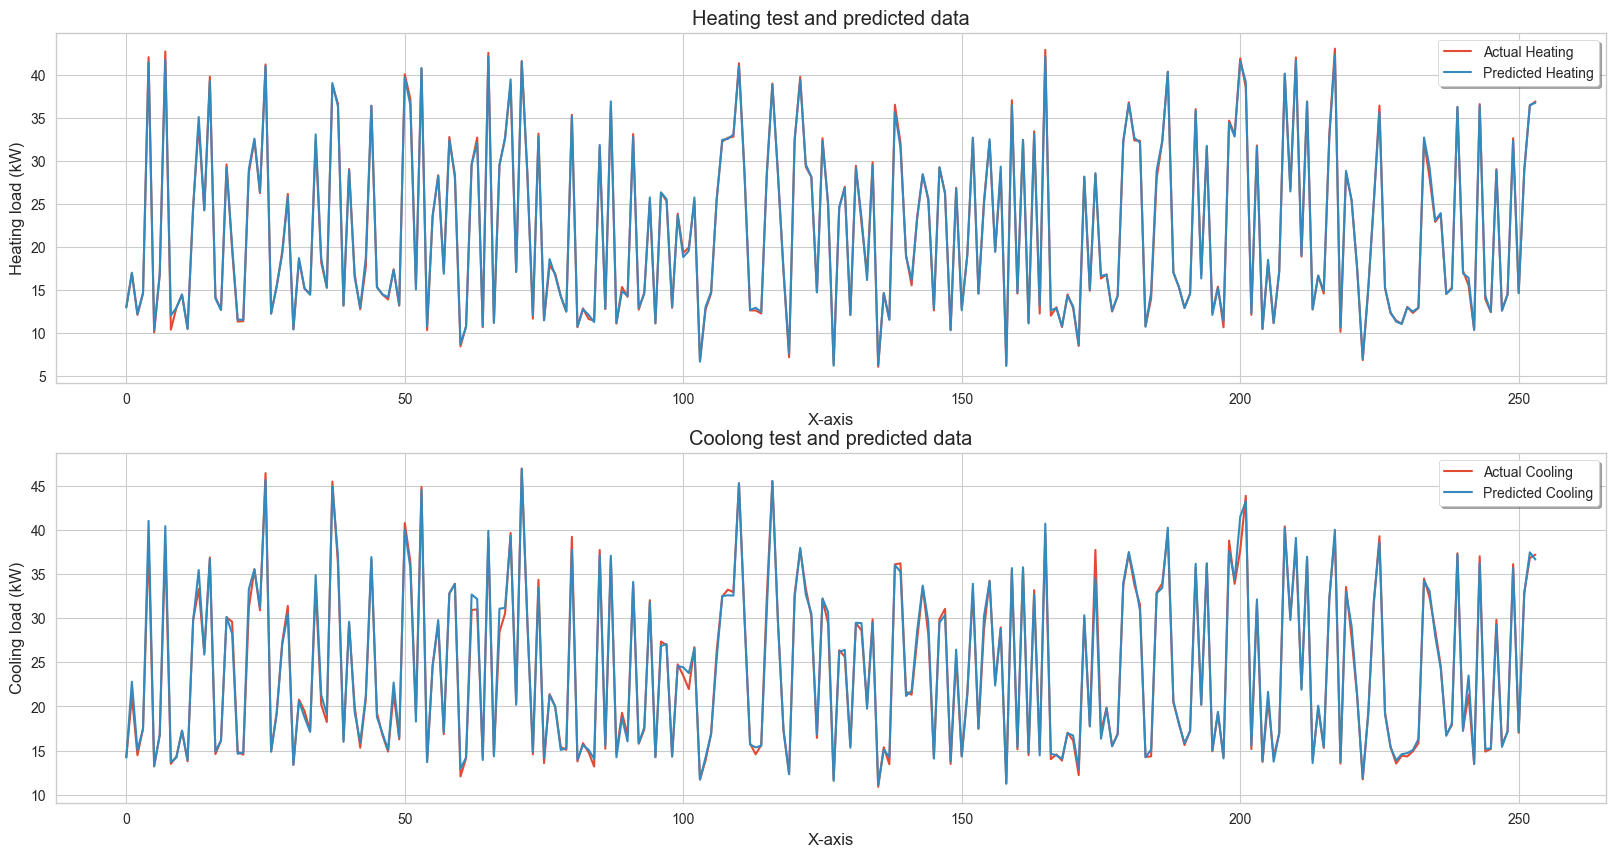

In [68]:
x_ax = range(len(y1_test))
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_ax, y1_test, label="Actual Heating")
plt.plot(x_ax, y1_pred, label="Predicted Heating")
plt.title("Heating test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Heating load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(x_ax, y2_test, label="Actual Cooling")
plt.plot(x_ax, y2_pred, label="Predicted Cooling")
plt.title("Coolong test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Cooling load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.show()

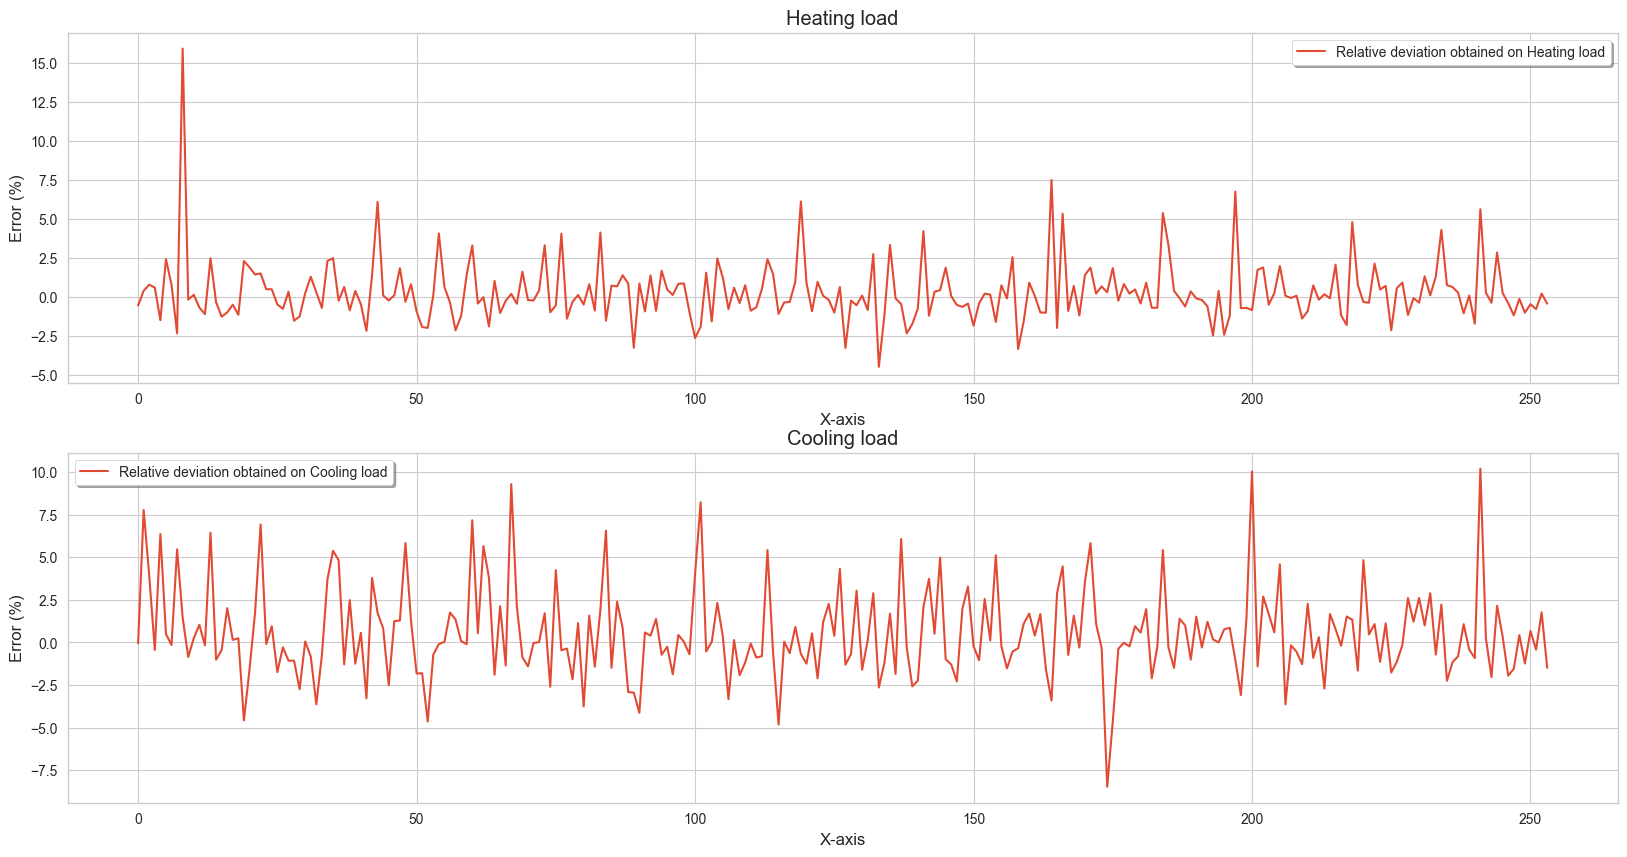

In [69]:
def AAD(y1_test, y1_pred):
    AAD =[]
    for i in range(len(y1_pred)):
        AAD.append((y1_pred[i] - y1_test.values[i])/y1_test.values[i]*100)
    return AAD

x_ax = range(len(y1_test))
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_ax, AAD(y1_test, y1_pred), label="Relative deviation obtained on Heating load")
plt.title("Heating load")
plt.xlabel('X-axis')
plt.ylabel('Error (%)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(x_ax, AAD(y2_test, y2_pred), label="Relative deviation obtained on Cooling load")
plt.title("Cooling load")
plt.xlabel('X-axis')
plt.ylabel('Error (%)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.show()